# Team Information


# Wildfire Dataset Analysis

### Class: 4330 | Team: Infobreakers | Braeden Gutierrez, Antonio Rodriguez, Josue Lozano

- **Contact Information**: arodriguez265@angelo.edu, jlozano18@angelo.edu, bgutierrez14@angelo.edu

- **Dataset**: This dataset contains wildfire occurrence information, including the total acres burned, year of occurrence, and fire size classification.

- **Github**: [Info-Breakers Repository](https://github.com/BMG2-Dev/Info-Breakers/blob/main)

### Introduction

The objective of this project is to analyze US fire occurrence data to identify patterns and correlations that can help predict wildfire risks and understand contributing factors. Wildfires are a growing concern globally, impacting not only natural habitats but also communities and infrastructure. This analysis seeks to provide insights into historical fire events in the United States, including the extent of damage and its distribution across different regions.

The dataset utilized in this project includes information about fire size, year, location, and causes, which we aim to explore to determine the common factors associated with larger fires. We processed geographic and temporal data from national fire records, merged it with census data for geographic boundaries, and created visualizations to facilitate our findings. Through this analysis, our goal is to shed light on the dynamics of wildfires to aid future risk mitigation efforts.

### Team Roles

- **Braeden Gutierrez**: Responsible for all data preprocessing and transformation, which included merging datasets and creating GeoDataFrames. He was also mostly responsible for ensuring that we had accurate data, keeping the team on task, and managing the team for the most part.
- **Josue Lozano**: Partly responsible for data management, focused mainly on logistic regression, and often tackled the most difficult tasks head on.
- **Antonio Rodriguez**: Responsible for creating text cells, developing 3D models, and ensuring that the data was uploaded to GitHub and converted to a PDF file using nbconvert via CMD.

### Data Cleanup and Transformation

The data cleanup and transformation process was an essential part of our project to ensure the quality and usability of the wildfire dataset. The steps involved included:

1. **Data Import and Initial Cleanup**: The dataset was loaded into our environment using Pandas, and any missing values were identified. Columns with missing or incorrect data were handled appropriately—either by filling in plausible values, using interpolation, or removing records that were deemed unusable.

2. **Geographic Data Processing**: We utilized GeoPandas to work with spatial data and create geographic points for each wildfire occurrence. This step involved using latitude and longitude values to map fire locations accurately and generate GeoDataFrames that could be used in our analysis.

3. **Merging Datasets**: We combined the wildfire dataset with geographic boundary data from the US census, which included state and county boundaries. This allowed us to contextualize the wildfire data geographically, making it possible to analyze fire occurrences by region.

4. **Feature Engineering**: We created new features that were relevant for our analysis, such as fire size classifications and geographic indicators. These additional features helped us conduct more detailed analyses and draw better insights into wildfire behavior.

5. **Handling Outliers and Data Transformation**: We identified and addressed outliers within the dataset to minimize their impact on our analysis. We also transformed certain features, such as categorizing fire sizes into different classes, to make the data easier to interpret and visualize.

6. **Data Validation**: Throughout the transformation process, we continuously validated our data to ensure its accuracy. This included cross-checking values, ensuring consistent coordinate systems, and verifying the completeness of merged datasets.

### Relevance of the Analysis

Wildfire analysis is crucial for public safety and environmental conservation. Understanding historical data helps in predicting potential fire risks, improving resource allocation, and aiding emergency preparedness. The insights drawn from this project are intended to support policy-making, enhance response strategies, and contribute to the body of research on wildfire behavior.


# **Data Import, Cleanup, and Transformation Code:**


# **Import Libraries**

## **Explanation:**
##Used to Import furture libraries for future use.

In [ ]:
import geopandas as gp # Geographic data analysis library used for working with spatial data.
import pandas as pd # Library that allows for the processing and analysis of tabular data.
import numpy as np # for numerical operations
import seaborn as sns  # for visualization
import matplotlib.pyplot as plt  # for plotting
import re # regular expression manipulation

from shapely.geometry import Point # Point class allows for the creation geometric points from coordinate data.
from google.colab import drive # Allows for the access of data from the Google drive for use in Google Colab.
from pandas.plotting import scatter_matrix # Scatter Matrix for Selected Features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

##**Interpretation:**
## Throught the file these libraries will help us interpret, convert, and visualize our information.


---



#**Data Use Location**

## **Explanation:**
## The datasets that we have regarding fires and state sizes are in our Google drive. With this code we can grab that information and use it in this coding space.

In [ ]:
# Specifies that we can use data in our Google Drive under '/content/drive'.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Interpretation:**
## Now that we can access our datasets from the share Google we can use it for our data interpretation code.


---



#**National Fire Datasets Manipulation**

##**Explanation:**
##We are extracting the datasets for reported national fires from the USFS national fires occurences dataset and creating exact geographical points for the datasets.

In [ ]:
import sys
import os
import pandas as pd
import geopandas as gp
from shapely.geometry import Point

# Suppress standard output temporarily
#class SuppressOutput:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')

#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
    # Load the National fires occurrences dataset
df = pd.read_csv(
        '/content/drive/MyDrive/CS4330/National_USFS_Fire_Occurrence_Point_(Feature_Layer).csv',
        low_memory=False
    )

    # Create geometric points for fire locations
fires = [Point(long_lad) for long_lad in zip(df['X'], df['Y'])]

    # Create a spatial-enabled GeoDataFrame using the dataset
loc_df = gp.GeoDataFrame(df, geometry=fires, crs="EPSG:4326")

# The `loc_df` GeoDataFrame is now processed and ready for further use

## **Interpretation:**
## As a result, we have added a geographic pinpoint to dataset which allows us to have a proper world location for reported fires on our axes.


---



#**US Boundry Datasets Manipulation**

##**Explanation:**
## We are looking to extact and convert the shapes of the states and counties from the 2024 US census in order to pinpoint the fires reported in the US.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
#class SuppressOutput:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')

#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
    # Load US census data for county and state geometric boundaries
county_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_county/tl_2024_us_county.shp')
state_shapes = gp.read_file('/content/drive/MyDrive/CS4330/tl_2024_us_state/tl_2024_us_state.shp')

    # Convert the coordinate system to EPSG:4326
county_shapes = county_shapes.to_crs("EPSG:4326")
state_shapes = state_shapes.to_crs("EPSG:4326")

# The data is now loaded and transformed; you can inspect the variables `county_shapes` and `state_shapes` outside the block if needed.

##**Interpretation:**
## As a result, we have pinpointed the geograpical shapes of the US states and counties.
---



#**Creation of Counties Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the counties in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
#class SuppressOutput:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')

#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
    # Spatial join of county boundary data and fire locations
counties = gp.sjoin(loc_df, county_shapes, how="left", predicate="intersects")

    # Rename column 'NAME' to 'COUNTY'
counties.rename(columns={'NAME': 'COUNTY'}, inplace=True)

    # Select relevant columns for the counties DataFrame
counties = counties[['Y', 'X', 'COUNTY', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]

# The `counties` DataFrame is now ready for further use without text output

##**Interpretation:**

## Now we have a new dataset with the x, y, and county, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---



#**Creation of States Datasets**

##**Explanation:**
##We are looking to merge the datasets from the US census and the reported national fires to pinpoint the states in the US that these fires were reported. Then we want to create a new smaller dataset with this new merged data for the important information regarding our topic.

In [ ]:
import sys
import os
import geopandas as gp

# Suppress standard output temporarily
#class SuppressOutput:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')

#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
    # Spatial join of state boundary data and fire locations
states = gp.sjoin(loc_df, state_shapes, how="left", predicate="intersects")

    # Rename columns and select relevant fields
states.rename(columns={'NAME': 'STATE'}, inplace=True)
states = states[['Y', 'X', 'STATE', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY']]

# The `states` DataFrame is now processed and ready for further use

##**Interpretation:**

## Now we have a new dataset with the x, y, and states, as well as when the fires happened, why they happened, the reported damage, the fires size, and the fires category.

---

#**Merging of Counties and States Datasets**

##**Explanation:**
## Now that we have our unique datasets for US states and counties, we now want to merge them for a final dataset we can use throught the project.

In [ ]:
#import sys
#import os
#import pandas as pd

# Suppress standard output temporarily
#class SuppressOutput:
#    def __enter__(self):
#        self._original_stdout = sys.stdout
#        sys.stdout = open(os.devnull, 'w')

#    def __exit__(self, exc_type, exc_val, exc_tb):
#        sys.stdout.close()
#        sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
    # Merge the counties and states datasets
us_fires = pd.merge(
        counties,
        states,
        on=['Y', 'X', 'FIREYEAR', 'SIZECLASS', 'TOTALACRES', 'STATCAUSE', 'FIRETYPECATEGORY'],
        how='inner'
    )

    # Rename columns
us_fires = us_fires.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})

# At this point, warnings will still show up, but no text output is displayed
# You can now use `us_fires` as needed

##**Interpretation:**
##We have now merge the two datasets to get a dataset with both US counties and states regarding fire reports and all the details regarding those reports. We have also managed to clarify that the x and y are the longitudes and latitudes.


---



# **Graphs, What we Discovered, and Important Results:**

#**ERRORS and Formating Problems**

##**Explanation:**
##We are now looking to identify all of the errors regarding formating issues, repeating values, data outliers that cannot be intrepreted or corrected, and data with no values. Depending on the circumstance we want to either correct or eliminate this data before we start creating any visual graphs. If not that information will influence the resulting output significantly enough to change our final results.

In [ ]:
import numpy as np

# Suppress standard output temporarily
#class SuppressOutput:
 #   def __enter__(self):
  #      self._original_stdout = sys.stdout
  #      sys.stdout = open(os.devnull, 'w')

   # def __exit__(self, exc_type, exc_val, exc_tb):
    #    sys.stdout.close()
     #   sys.stdout = self._original_stdout

# Your code within the suppress context
#with SuppressOutput():
# Wrong values outside recorded US history
fireyear_print = us_fires['FIREYEAR'].fillna(-1)
fireyear_print = fireyear_print[(fireyear_print < 1900) | (fireyear_print > 2024)].replace(-1, np.nan)
fireyear_print = list(fireyear_print.unique())

# Incorrect number of decimal places for FIREYEAR
fireyear_head = us_fires['FIREYEAR'].head()

# FIRETYPECATEGORY text and missing, unidentifiable or incorrect abbreviation values
abbreviation_symbols = ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
needed_conversions = list(us_fires[us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique())
incorrect_firetype_values = list(us_fires[~us_fires['FIRETYPECATEGORY'].isin(abbreviation_symbols)]['FIRETYPECATEGORY'].unique())

# STATCAUSE category issues
cause_category = ['Camping', 'Lightning', 'Undetermined', 'Smoking', 'Debris/Open Burning', 'Other Human Cause',
                      'Incendiary', 'Equipment', 'Railroad', 'Other Natural Cause', 'Utilities', 'Firearms/Weapons',
                      'Natural', 'Human', 'Miscellaneous', 'Debris Burning', 'Equipment Use', 'Children', 'Campfire', 'Debris burning',
                      'Arson', 'Powgen/trans/distrib', 'Equip/vehicle use', 'Other causes', 'Investigated But Und', 'Cause not Identified']
incorrect_statcause_values = list(us_fires[~us_fires['STATCAUSE'].isin(cause_category)]['STATCAUSE'].unique())

# Missing COUNTY value
nan_county_count = us_fires['COUNTY'].isna().sum()

# Missing STATE value
nan_state_count = us_fires['STATE'].isna().sum()

# Combination of missing COUNTY & STATE values
nan_county_state_rows = us_fires[(us_fires['COUNTY'].isna()) & (us_fires['STATE'].isna())].shape[0]

# TOTALACRES category missing values
nan_totalacres_count = us_fires['TOTALACRES'].isna().sum()

# Missing LONGITUDE or LATITUDE values
nan_longitude_count = us_fires['LONGITUDE'].isna().sum()
nan_latitude_count = us_fires['LATITUDE'].isna().sum()

# SIZECLASS category issues
fire_class_symbol = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
incorrect_sizeclass_values = list(us_fires[~us_fires['SIZECLASS'].isin(fire_class_symbol)]['SIZECLASS'].unique())

# Duplicates of rows
exact_duplicates = us_fires.duplicated(keep=False)
exact_duplicate_rows = us_fires[exact_duplicates]
exact_duplicate_count = exact_duplicate_rows.shape[0]
total_rows = len(us_fires)

print('FIREYEAR row elimination:', fireyear_print)
print('\n')

print('FIREYEAR decimal place correction needed:')
print(fireyear_head)
print('\n')

print('Needed convertions for FIRETYPECATEGORY abbreviated strings:', needed_conversions)
print('Incorrect FIRETYPECATEGORY values:', incorrect_firetype_values)
print('\n')

print('Incorrect values, spelling and strings for STATCAUSE:', incorrect_statcause_values)
print('\n')

print('Number of nan COUNTY value:', nan_county_count)
print('\n')

print('Number of nan STATE value:', nan_state_count)
print('\n')

#print('Number rows with nan COUNTY & STATE values that need to be eliminated:', nan_county_state_rows)
#print('\n')

print('Num of nan TOTALACRES Values:', nan_totalacres_count)
print('\n')

print('Num of rows with missing LONGITUDE Values to be eliminated:', nan_longitude_count)
print('\n')
print('Num of rows with missing LATITUDE Values to be eliminated:', nan_latitude_count)
print('\n')

print('Incorrect, missing, or unidentifiable values in SIZECLASS:', incorrect_sizeclass_values)
print('\n')

print('Number of duplicate rows:', exact_duplicate_count)
print('\n')
print('number of rows:', total_rows)
#SuppressOutput()
# You can now access the variables like `fireyear_print`, `nan_county_count`, etc., outside the suppress block if needed


FIREYEAR row elimination: [9999.0, nan, 1001.0, 0.0, 8.0]


FIREYEAR decimal place correction needed:
0    2016.0
1    2016.0
2    1997.0
3    1993.0
4    2020.0
Name: FIREYEAR, dtype: float64


Needed convertions for FIRETYPECATEGORY abbreviated strings: ['WF', 'FW', 'FA', 'RX', 'PC', 'SU', 'WW', 'RP', 'PP', 'CX']
Incorrect FIRETYPECATEGORY values: [nan, ' ']


Incorrect values, spelling and strings for STATCAUSE: [nan, '3', '1', '2', '5', '4', '9', '6', '7', '8', 'Undertermined', 'Firearms/Weapons ', '0', '9 -  Miscellaneous', '5 -  Debris Burning', 'Camping ', '1 - Lightning', '9 - Miscellaneous', '4 - Campfire', '5 - Debris burning', '7-Arson', '5-Debris burning', ' Undetermined']


Number of nan COUNTY value: 123


Number of nan STATE value: 123


Num of nan TOTALACRES Values: 3740


Num of rows with missing LONGITUDE Values to be eliminated: 43


Num of rows with missing LATITUDE Values to be eliminated: 43


Incorrect, missing, or unidentifiable values in SIZECLASS: [nan, ' ', '

##**Interpretation:**
## We have now identified the all formating, duplicates, data outliers, missing data, and uninterpretable data for correction or elimination.


---



#**Dataset Error and Formating Changes**

##**Explanation:**
##Now that we have identified our data issues we want to start correcting or eliminating them so that our visuals in our graphs are easier to interpret.

In [ ]:
import sys
import os
import numpy as np

# Suppress standard output temporarily
#class SuppressingOutput:
    #def __enter__(self):
     #   self._original_stdout = sys.stdout
    #    sys.stdout = open(os.devnull, 'w')

   # def __exit__(self, exc_type, exc_val, exc_tb):
  #      sys.stdout.close()
 #       sys.stdout = self._original_stdout

# Your full code within the suppress context
#with SuppressingOutput():
# Fill missing data and specify column type
us_fires['FIREYEAR'] = us_fires['FIREYEAR'].fillna(-1).astype(int)

# Replace string abbreviations and fix typos
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace(' ', 'Unknown', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WF', 'WILDFIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FW', 'FIRE WEATHER', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('FA', 'FIRE ACTIVITY', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RX', 'PRESCRIBED FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PC', 'PRESCRIBED FIRE - CONTROLLED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('SU', 'SUSPENDED', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('WW', 'WILDLAND FIRE', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('RP', 'RESEARCH PROJECT', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('PP', 'PROJECT PLAN', case=False)
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].str.replace('CX', 'CONTRACT EXTINGUISHER', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Undertermined', 'Undetermined', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace(' Undetermined', 'Undetermined', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Firearms/Weapons ', 'Firearms/Weapons', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('9 -  Miscellaneous', 'Miscellaneous', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('9 - Miscellaneous', 'Miscellaneous', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5 -  Debris Burning', 'Debris Burning', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('Camping ', 'Camping', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('1 - Lightning', 'Lightning', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('4 - Campfire', 'Campfire', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5 - Debris burning', 'Debris burning', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('7-Arson', 'Arson', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('5-Debris burning', 'Debris burning', case=False)
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].str.replace('[0-9]', 'Unknown', regex=True)

# Fill missing data
us_fires.loc[:, 'COUNTY'] = us_fires['COUNTY'].fillna('Unknown')
us_fires.loc[:, 'STATE'] = us_fires['STATE'].fillna('Unknown')
us_fires.loc[:, 'STATCAUSE'] = us_fires['STATCAUSE'].fillna('Unknown')
us_fires.loc[:, 'FIRETYPECATEGORY'] = us_fires['FIRETYPECATEGORY'].fillna('Unknown')
us_fires.loc[:, 'TOTALACRES'] = us_fires['TOTALACRES'].fillna(-1)
us_fires.loc[:, 'LATITUDE'] = us_fires['LATITUDE'].fillna(-999)
us_fires.loc[:, 'LONGITUDE'] = us_fires['LONGITUDE'].fillna(-999)

# Define fire size categories and assign size classes
fire_sizes = [
(us_fires['TOTALACRES'] >= 0.00) & (us_fires['TOTALACRES'] <= 0.25),
(us_fires['TOTALACRES'] >= 0.26) & (us_fires['TOTALACRES'] <= 9.99),
(us_fires['TOTALACRES'] >= 10.00) & (us_fires['TOTALACRES'] <= 99.99),
(us_fires['TOTALACRES'] >= 100.00) & (us_fires['TOTALACRES'] <= 299.99),
(us_fires['TOTALACRES'] >= 300.00) & (us_fires['TOTALACRES'] <= 999.99),
(us_fires['TOTALACRES'] >= 1000.00) & (us_fires['TOTALACRES'] <= 4999.99),
(us_fires['TOTALACRES'] >= 5000.00) & (us_fires['TOTALACRES'] <= 9999.99),
(us_fires['TOTALACRES'] >= 10000.00) & (us_fires['TOTALACRES'] <= 49999.99),
(us_fires['TOTALACRES'] >= 50000.00) & (us_fires['TOTALACRES'] <= 99999.99),
(us_fires['TOTALACRES'] >= 100000.00) & (us_fires['TOTALACRES'] <= 499999.99),
(us_fires['TOTALACRES'] >= 500000.00) & (us_fires['TOTALACRES'] <= 999999.99),
(us_fires['TOTALACRES'] >= 1000000.00)
    ]

fire_size_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
us_fires['SIZECLASS'] = np.select(fire_sizes, fire_size_class, default='Unknown')

us_fires = us_fires.drop_duplicates()
# Example filtering operation (adjusted)
#us_fires['FIRETYPECATEGORY'] = us_fires[(us_fires['FIRETYPECATEGORY'] != 'WILDFIRE') & (us_fires['FIRETYPECATEGORY'] != ' ')]

# Outside the suppress block, warnings are still active
# Use filtered_data or inspect any variable as needed

##**Interpretation:**
## The resulting data filled any missing data with identifiable values (i.e '-1' add 'Unknown'). Next, 'FIREYEAR' has now been correct to an int column removing the decimal place. All abbreviations have been given their repective full names. Incorrect string values have been corrected. Finally, we have corrected all the repective letter values in the 'SIZECLASS' feature using it reflective data base on the sizes listed out in the 'TOTALACRES' feature.


---



#**EXPLORATION**

#**Numerical and Categorical Features With Their Ranges and Category Values**

##**Explanation:**
## With all our data properly filtered we now are going to categorize the numeric and categoric features. We are also looking to get our ranges for our numerical features and listed unique string values in our catagorcal feature. Overall, we are looking use this data to check for any errors we have missed in our previos error fixing section as well as use the resulting data to visualize what our resulting graphs should look like.

In [ ]:
# creates a catgory and creates a list of min and max values for that list
numeric_range = {"LATITUDE" : (us_fires['LATITUDE'].min(), us_fires['LATITUDE'].max()),
                    "LONGITUDE" : (us_fires['LONGITUDE'].min(), us_fires['LONGITUDE'].max()),
                    "FIREYEAR" : (us_fires['FIREYEAR'].min(), us_fires['FIREYEAR'].max()),
                    "TOTALACRES" : (us_fires['TOTALACRES'].min(), us_fires['TOTALACRES'].max())}

# creates a catgory and creates a list that searches for and adds to with unique catigory values
categoric_value = {"COUNTY" : us_fires['COUNTY'].unique().tolist(),
                      "SIZECLASS" : us_fires['SIZECLASS'].unique().tolist(),
                      "STATCAUSE" : us_fires['STATCAUSE'].unique().tolist(),
                      "FIRETYPECATEGORY" : us_fires['FIRETYPECATEGORY'].unique().tolist(),
                      "STATE": us_fires['STATE'].unique().tolist()}

# prints numerical features and their min and max values to show their range
print("Numerical features and their numeric range:")
for feature, (min_v, max_v) in numeric_range.items():
    if feature in ['LATITUDE', 'LONGITUDE']:
        print(f"{feature}: {min_v:.9f} to {max_v:.9f}")
    elif feature in ['TOTALACRES']:
        print(f"{feature}: {min_v:.2f} to {max_v:.2f}")
    elif feature in ['FIREYEAR']:
        print(f"{feature}: {min_v} to {max_v}")
print("\n")

# prints categorical features and their categoric values
print("Categorical features and their categoric values:")
for feature, value in categoric_value.items():
    print(f"{feature}: {value}")

Numerical features and their numeric range:
LATITUDE: -999.000000000 to 90.000000000
LONGITUDE: -999.000000000 to 100.742879090
FIREYEAR: -1 to 9999
TOTALACRES: -1.00 to 963309.00


Categorical features and their categoric values:
COUNTY: ['Eagle', 'Garfield', 'Pitkin', 'Rio Blanco', 'Summit', 'Chaffee', 'Saguache', 'Mineral', 'Rio Grande', 'Conejos', 'Mesa', 'Gunnison', 'Hinsdale', 'Alamosa', 'Routt', 'Archuleta', 'Delta', 'Montrose', 'San Miguel', 'Ouray', 'Costilla', 'San Juan', 'La Plata', 'Montezuma', 'Dolores', 'Park', 'Sheridan', 'Washakie', 'Johnson', 'Big Horn', 'Fremont', 'Hot Springs', 'Converse', 'Campbell', 'Albany', 'Grand', 'Jackson', 'Weston', 'Carbon', 'Moffat', 'Thomas', 'Cherry', 'Lyman', 'Platte', 'Stanley', 'Blaine', 'Hooker', 'Sioux', 'Niobrara', 'Sweetwater', 'Pennington', 'Dawes', 'Fall River', 'Jones', 'Custer', 'Sublette', 'Teton', 'Crook', 'Laramie', 'McCone', 'Oglala Lakota', 'Rio Arriba', 'Taos', 'Colfax', 'Santa Fe', 'Pueblo', 'Las Animas', 'El Paso', 'Hue

##**Interpretation:**
##We have now gotten the minimums and maximums for our numerical features (Numeric Features: 'LATITUDE', 'LONGITUDE', 'FIREYEAR', 'TOTALACRES') giving us a range for each neumeric feature. Also, we have now gotten a reulting list of all the unique strings within our categorical features (Categoric Features: 'COUNTY', 'SIZECLASS', 'STATCAUSE', 'FIRETYPECATEGORY', 'STATE').


---



#**Dataset Single Feature Plots (Histogram Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates histogram plot to visualize single features of the dataset:

*   ## Histogram of number of reported fires in each US state (1900-2024).
*   ## For later listing we will also be getting the top 10 states with fire reports.

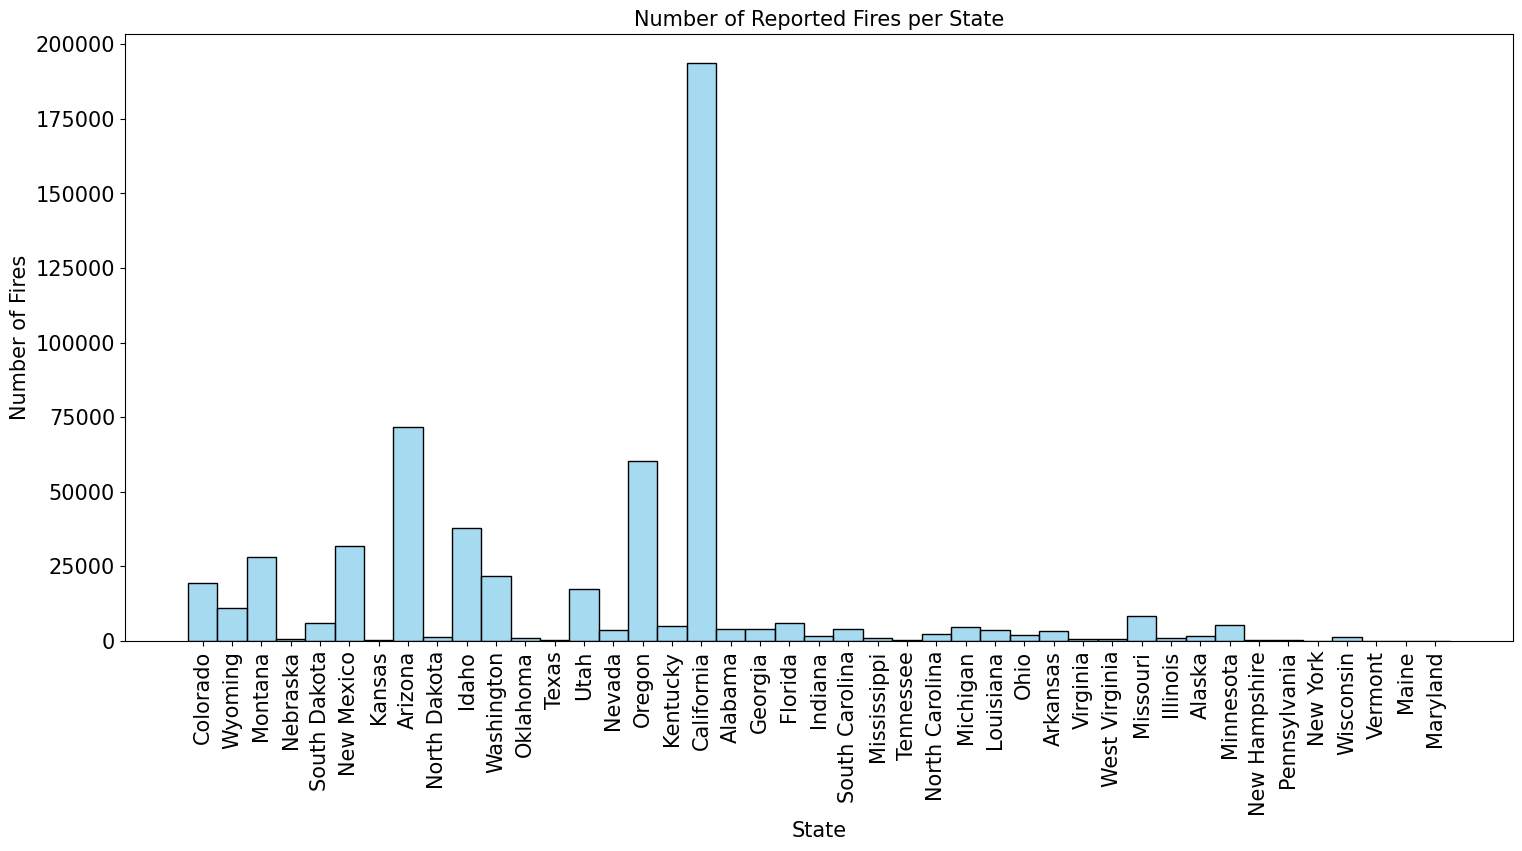

Top 10 reported fire states: ['California', 'Arizona', 'Oregon', 'Idaho', 'New Mexico', 'Montana', 'Washington', 'Colorado', 'Utah', 'Wyoming']


In [ ]:
def create_single_feature_plots(us_fires):
  us_fires_copy = us_fires.copy()
  us_fires_copy = us_fires_copy[(us_fires_copy['STATE'] != 'Unknown')]
  # Histogram with limited axes
  plt.figure(figsize=(15, 8))
  sns.histplot(us_fires_copy['STATE'], color='skyblue')
  plt.title('Number of Reported Fires per State', fontsize = 15)
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.title('Number of Reported Fires per State', fontsize = 15)
  plt.ylabel('Number of Fires', fontsize = 15)
  plt.xlabel('State', fontsize = 15)
  plt.show()

create_single_feature_plots(us_fires)
us_fires_copy = us_fires.copy()
tops = us_fires_copy['STATE'].value_counts().head(10).index
us_fires_copy = us_fires_copy[us_fires_copy['STATE'].isin(tops)]
state_order = us_fires_copy['STATE'].value_counts().index.tolist()
print('Top 10 reported fire states:', state_order)

##**Interpretation of Single Feature Plots:**

###**Histogram of Total Acres Burned:**

###This plot shows the distribution of reported fire per state.
###The x-axis represents the US states, and the y-axis represents the frequency or count of fires within each state.
###The distribution might be skewed right, with a higher frequency of fires and a long tail in calfifornia.
###Below the graph we were also able to get the top 10 states with fire reports from 1900-2024.
---



#**Dataset Single Feature Plots (Density Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates density plot to visualize single features of the dataset:

*   ## Density Plot of Fire Reports Per Year.
*   ## Here we are looking to identify which years had the most reported fires in the US.



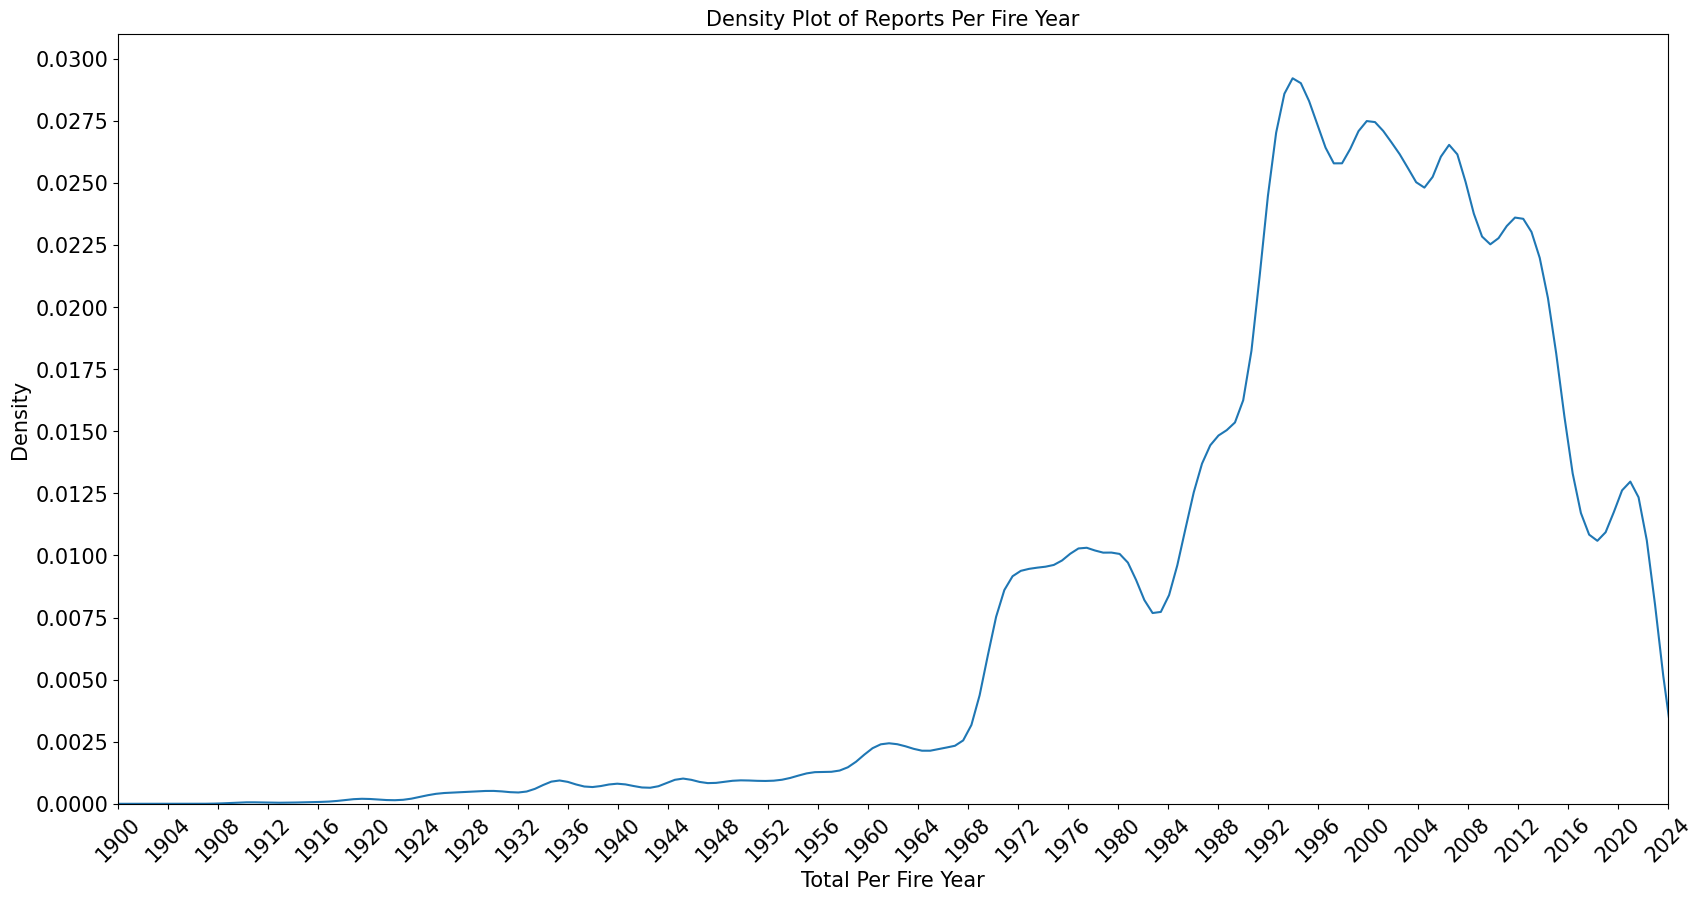

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()
    us_fires_copy = us_fires_copy[(us_fires_copy['FIREYEAR'] >= 1900) & (us_fires_copy['FIREYEAR'] <= 2024)]
    # Density Plot
    plt.figure(figsize=(20, 10))
    sns.kdeplot(us_fires_copy, x='FIREYEAR')
    #plt.xticks(fontsize = 15)
    #plt.yticks(fontsize = 15)
    plt.title('Density Plot of Reports Per Fire Year', fontsize = 15)
    plt.ylabel('Density', fontsize = 15)
    plt.xlabel('Total Per Fire Year', fontsize = 15)
    plt.ylim(0.000, 0.031)  # Set y-axis limit to 0.030
    plt.xlim(1900, 2024)  # Set x-axis limit to 2024
    ticks_X = np.arange(1900, 2025, 4)
    plt.xticks(ticks_X, rotation=45, fontsize = 15)
    ticks_y = np.arange(0.000, 0.031, .0025)
    plt.yticks(ticks_y, fontsize = 15)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Density Plot of Fire Reports Per Year:**

###This plot provides a smoothed representation of a left skewed reported fire occurence from 1900 to 2024.
###The x-axis represents the years of reported fires, and the y-axis represents the density of reported fires.
###The biggest cluster of years with fire reports is between 1984 and 2024.

---



#**Dataset Single Feature Plots (Count Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates 7 count plot (in decending order) to visualize single features of the dataset:
* ## We will be getting the top 10 counties with the most reported fires into a list for later use.
* ## Count Plot of US counties with reported fires.
* ## We are trying to highlight the huge difference between differnet counties to better inform people about the huge difference between different counties and their region that the fires are reported in. As a way to learn more about reported US fires.

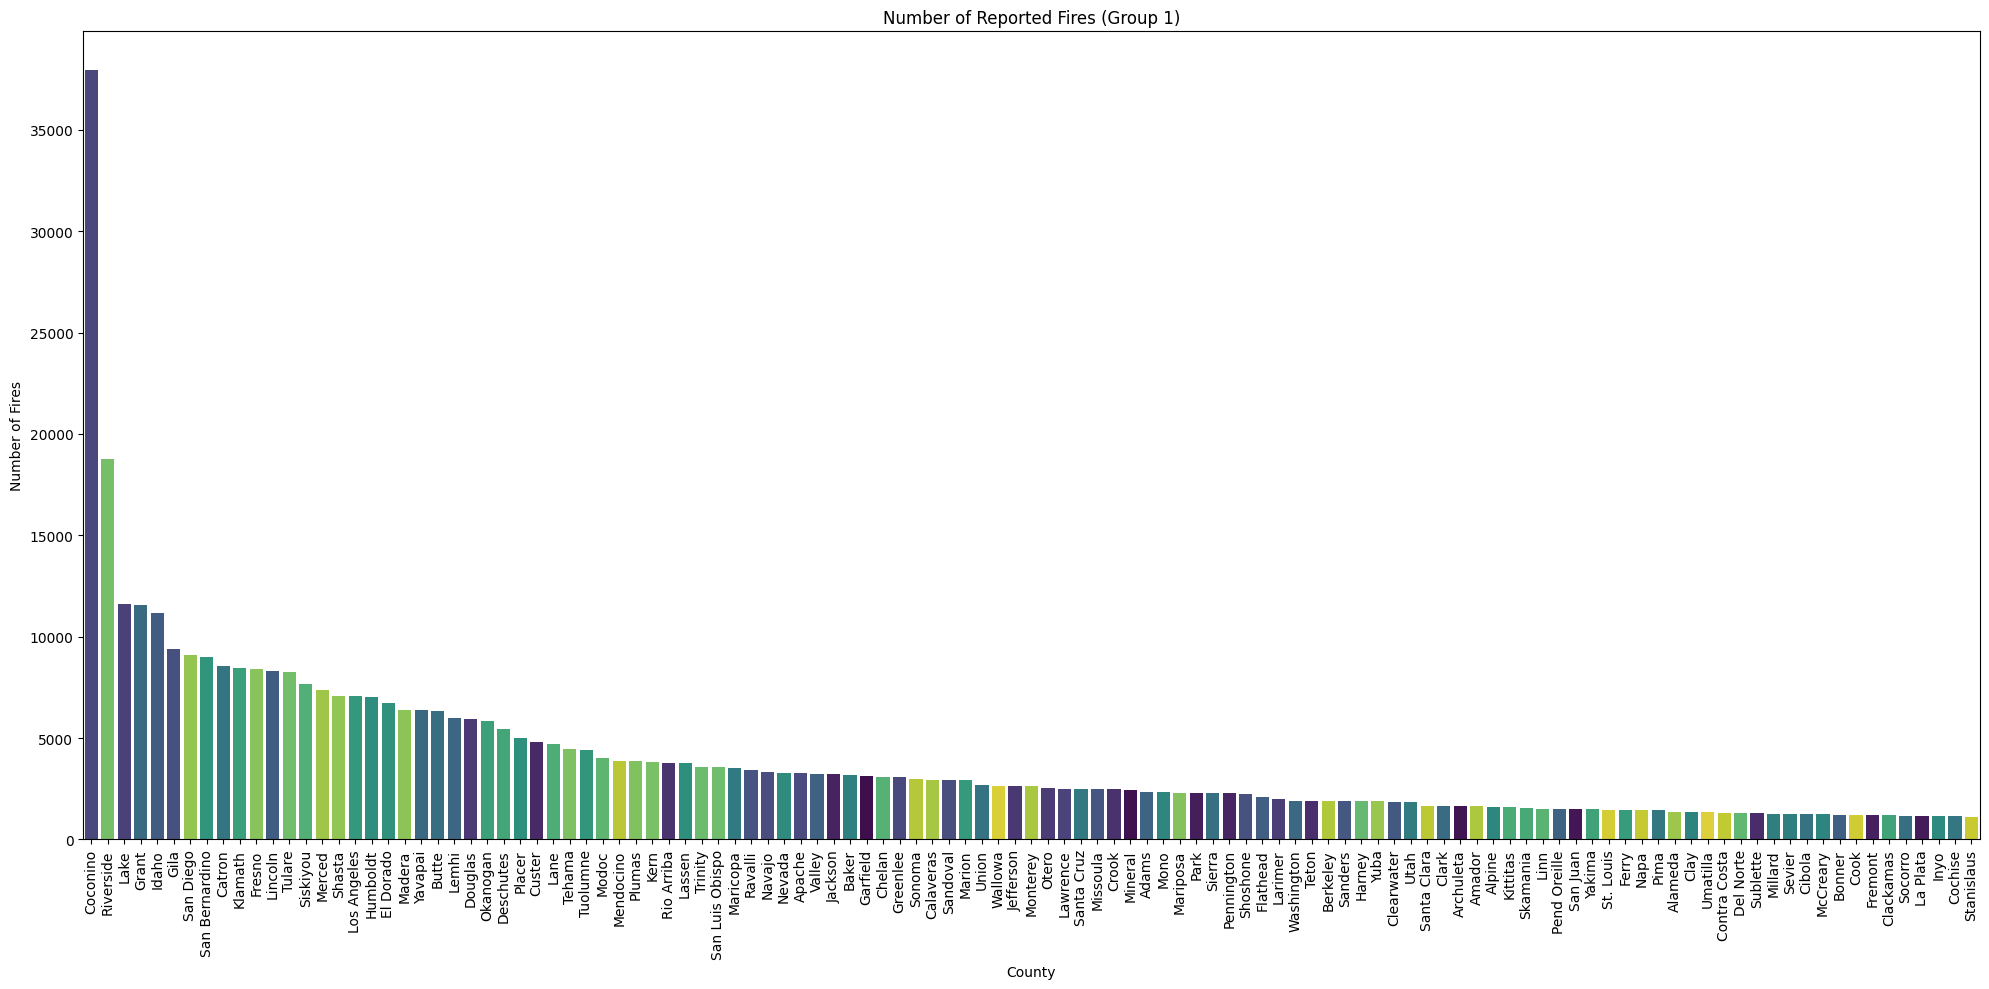

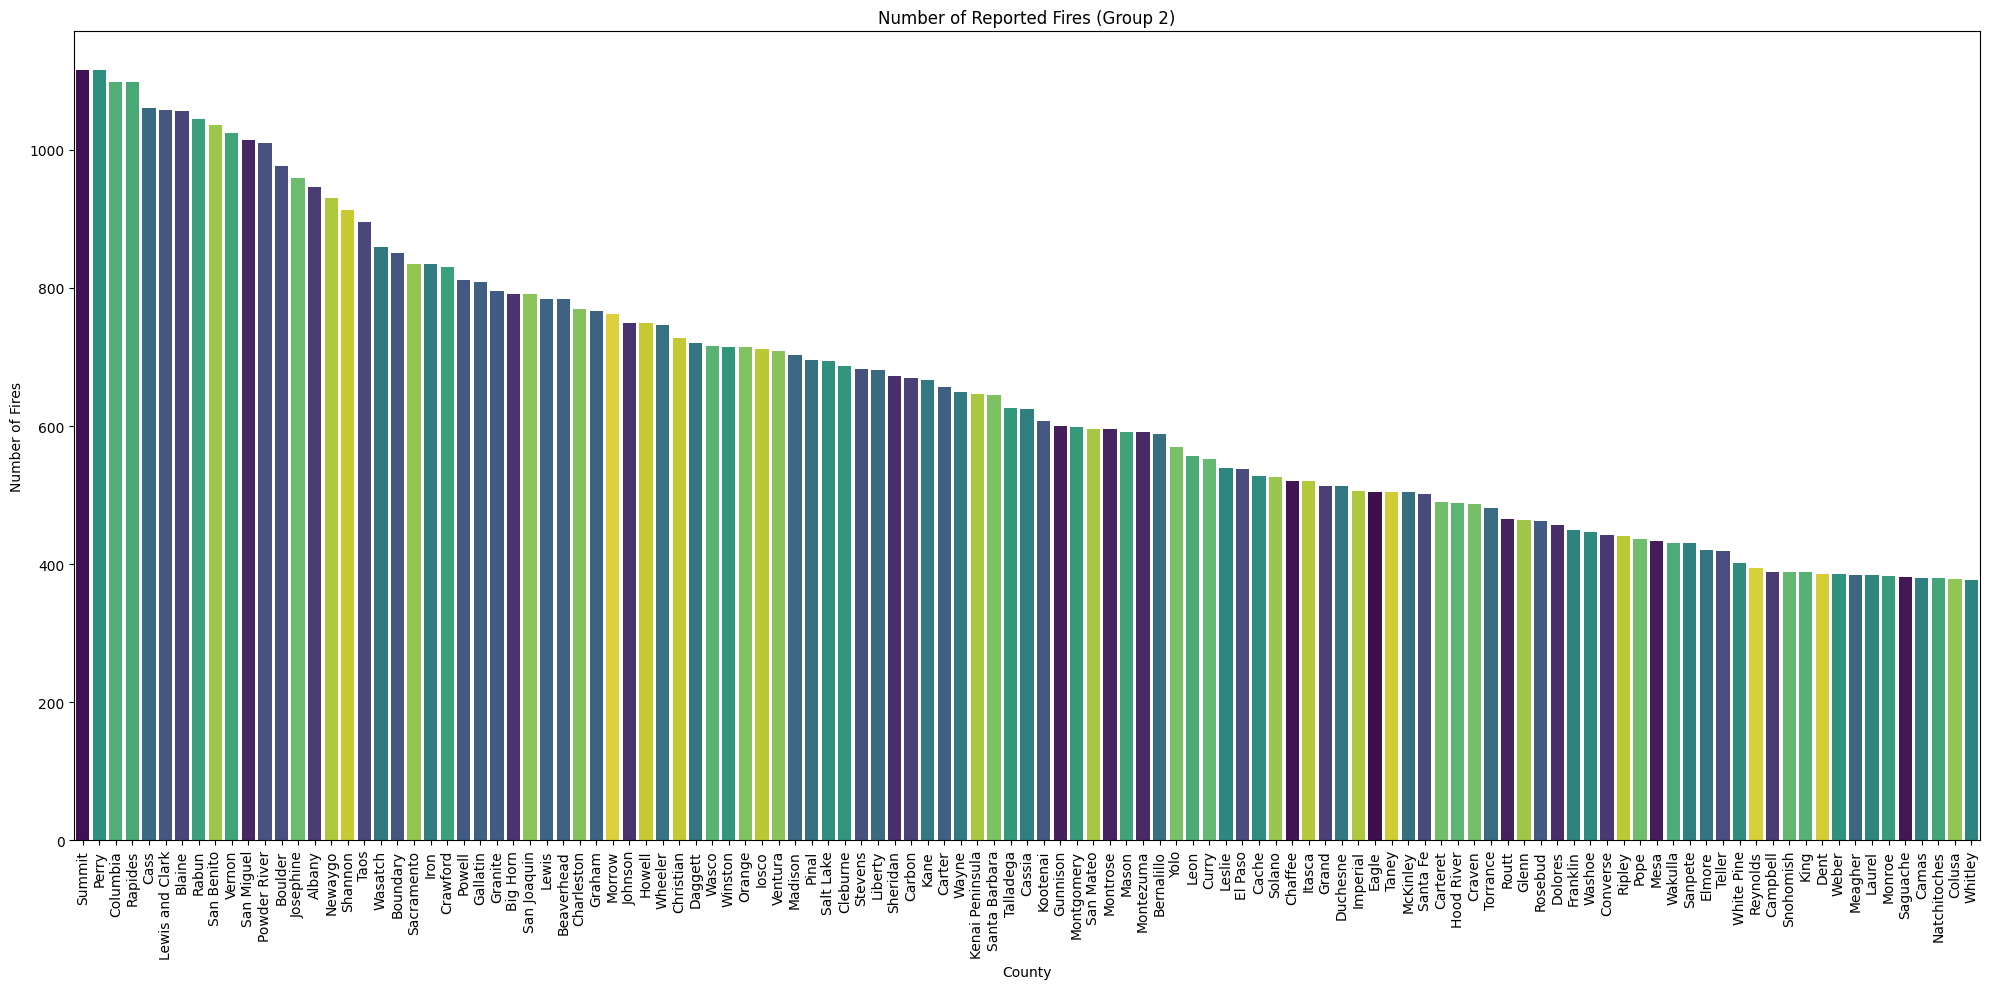

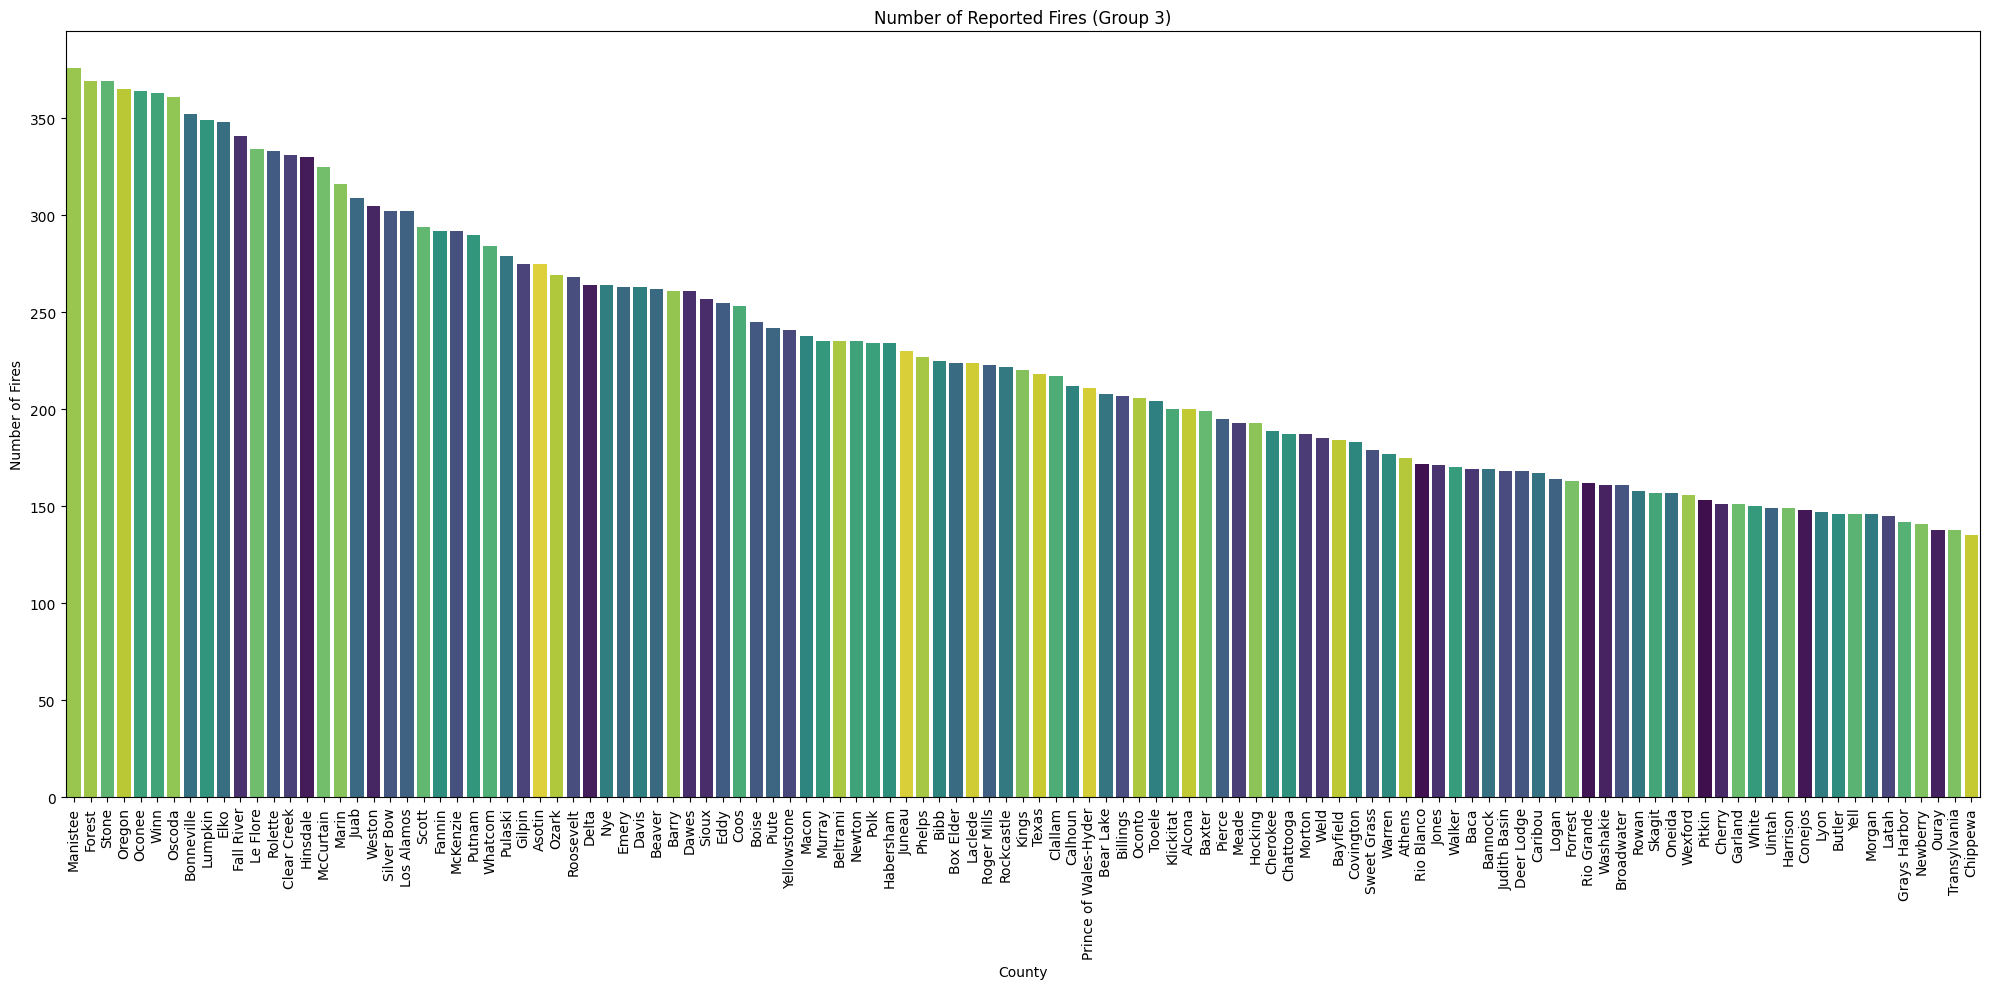

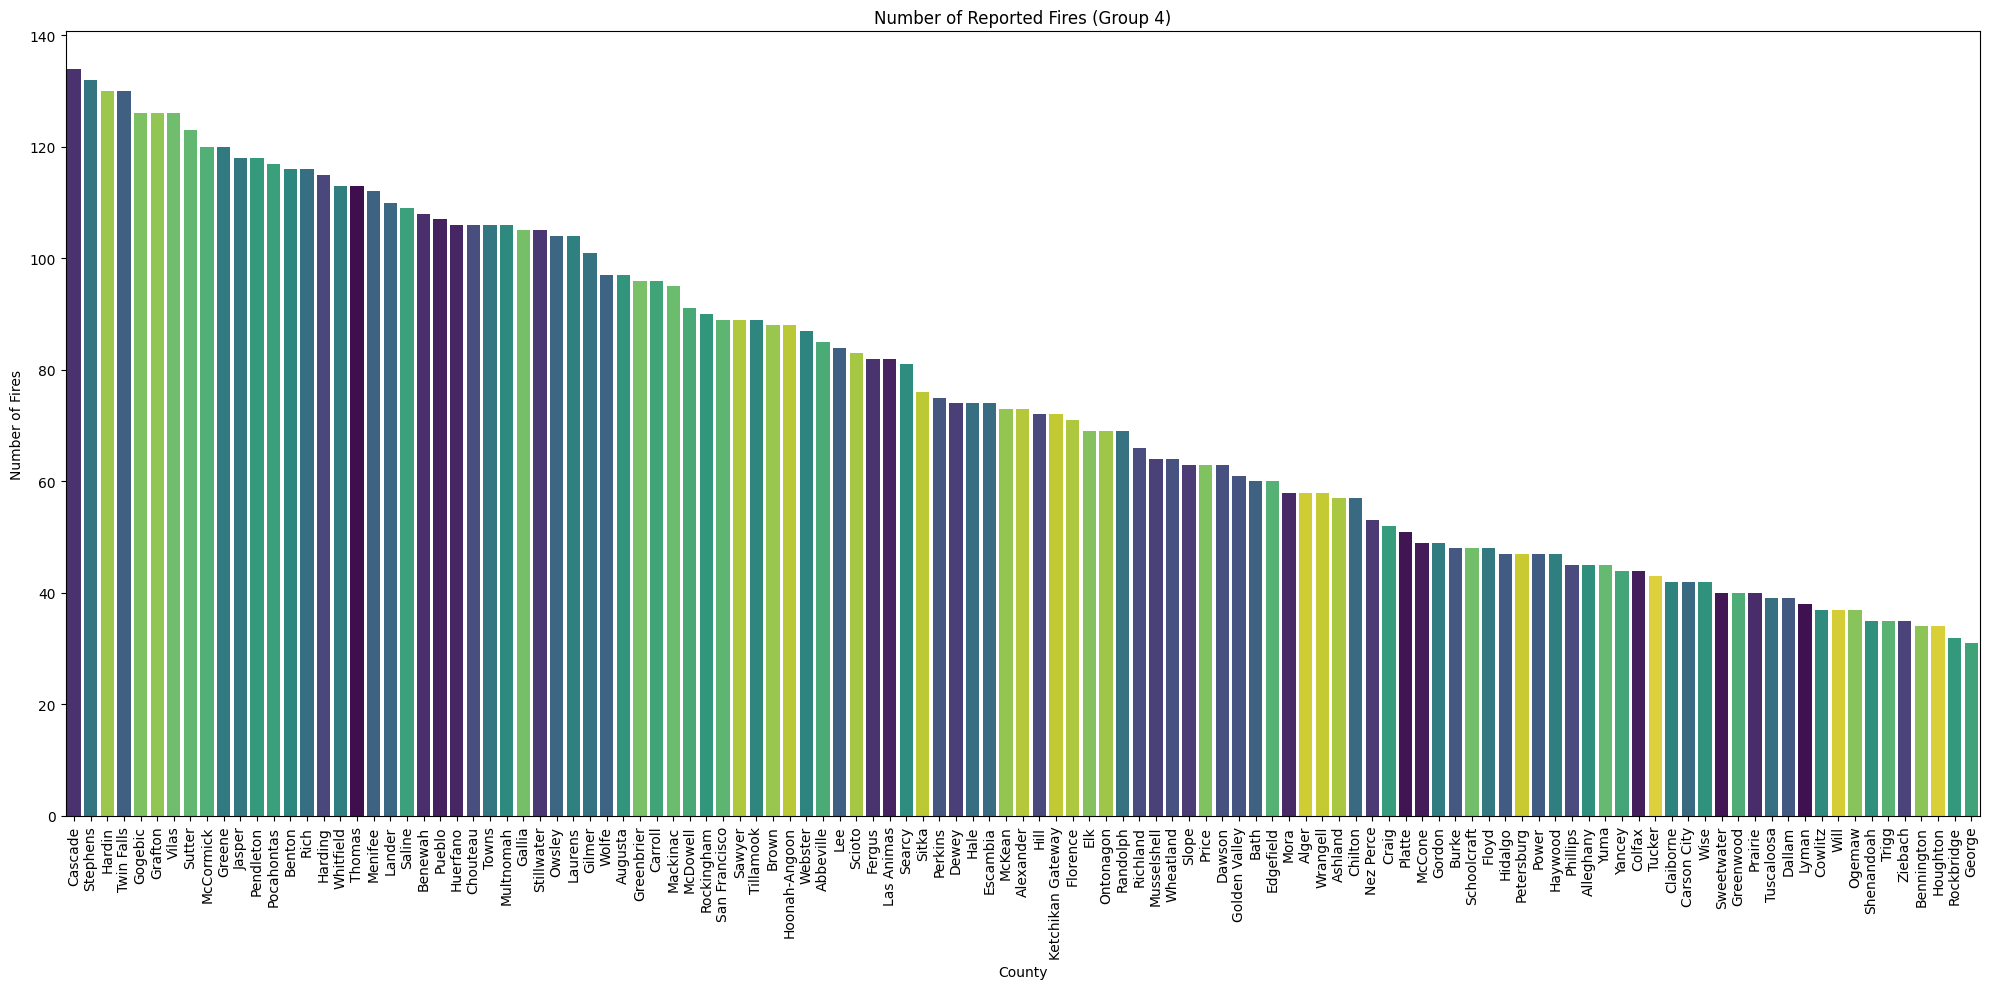

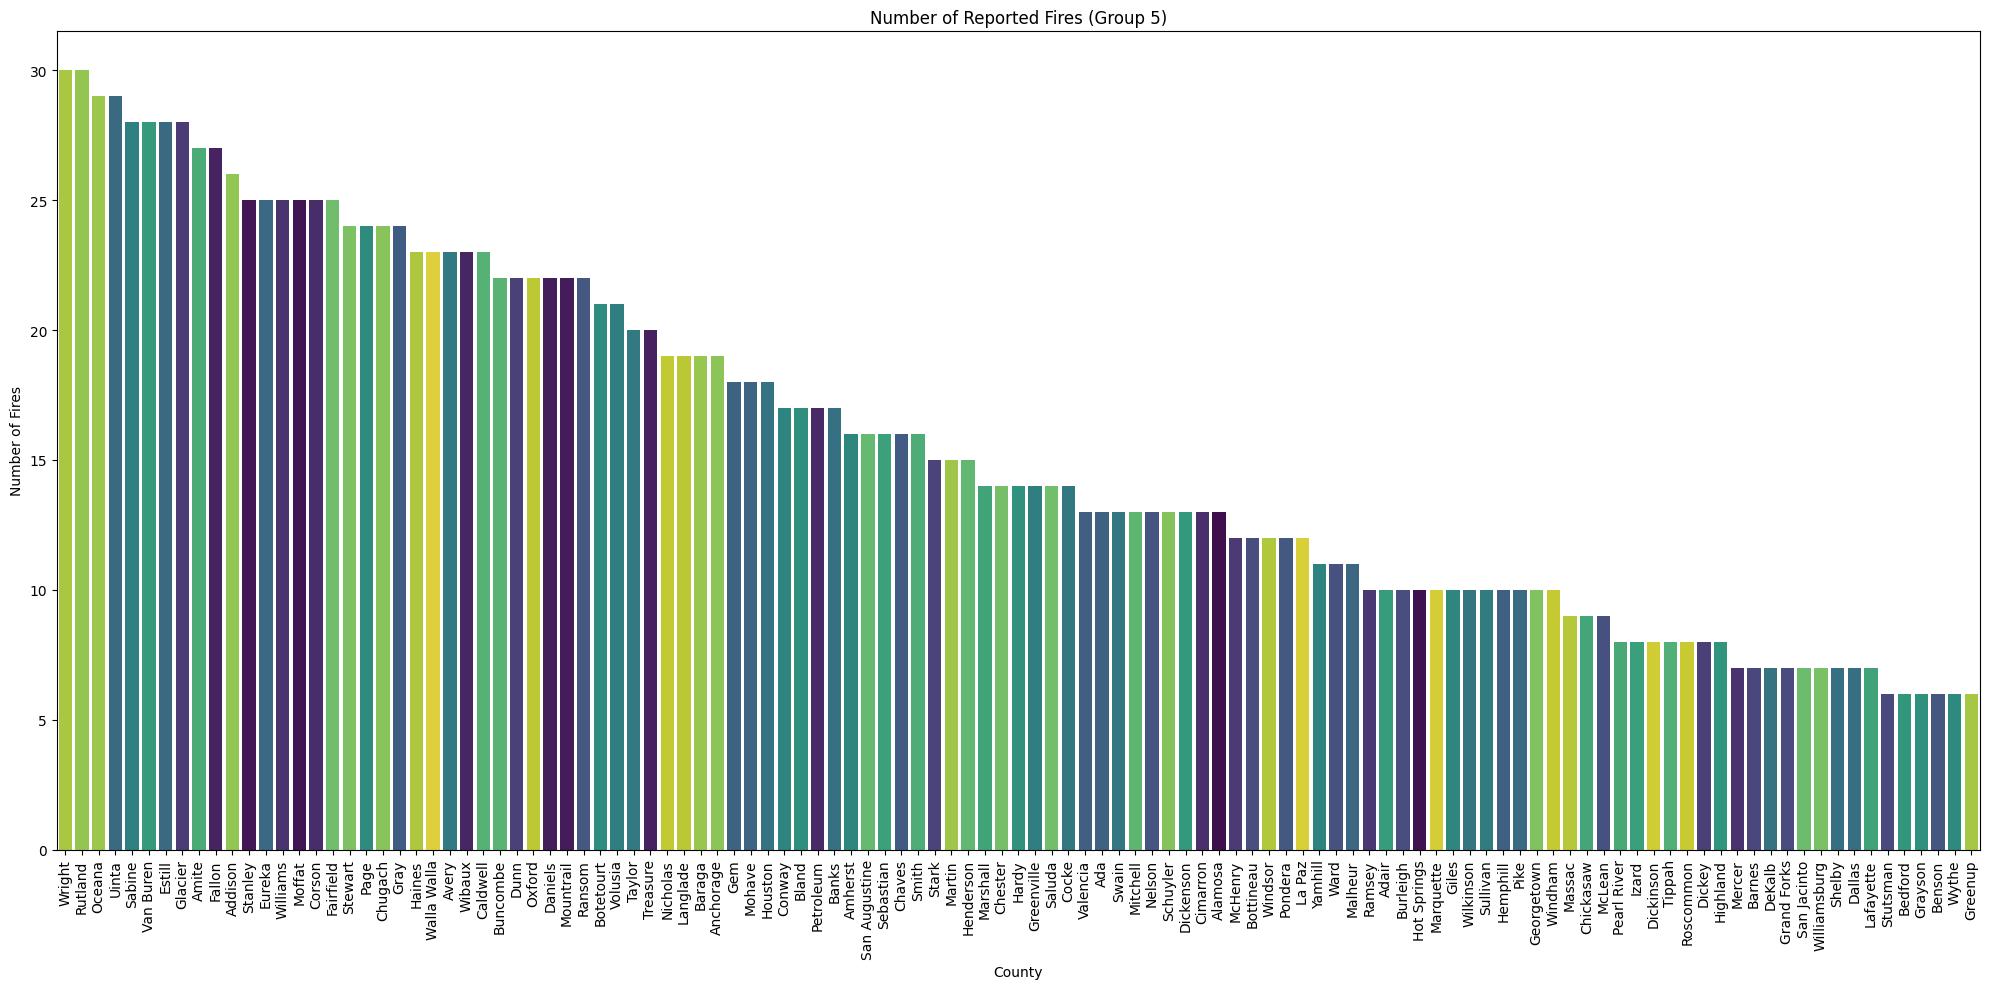

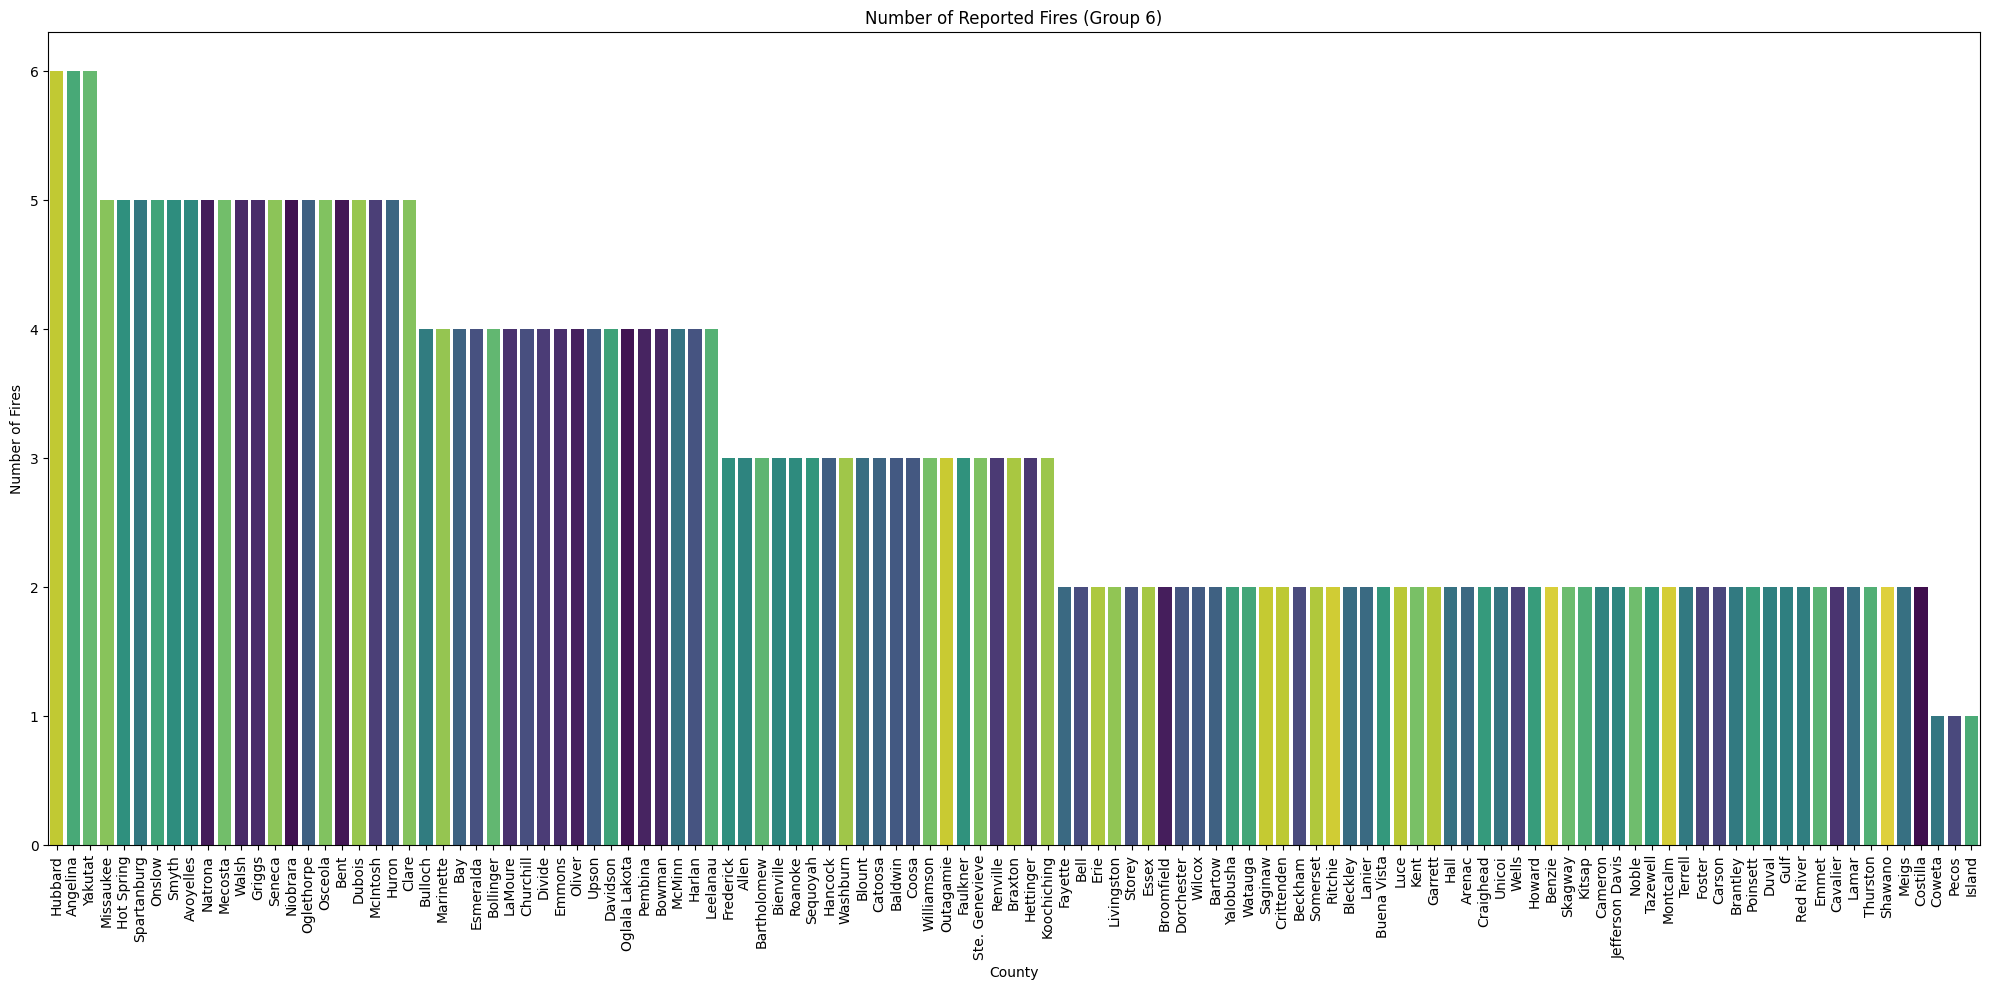

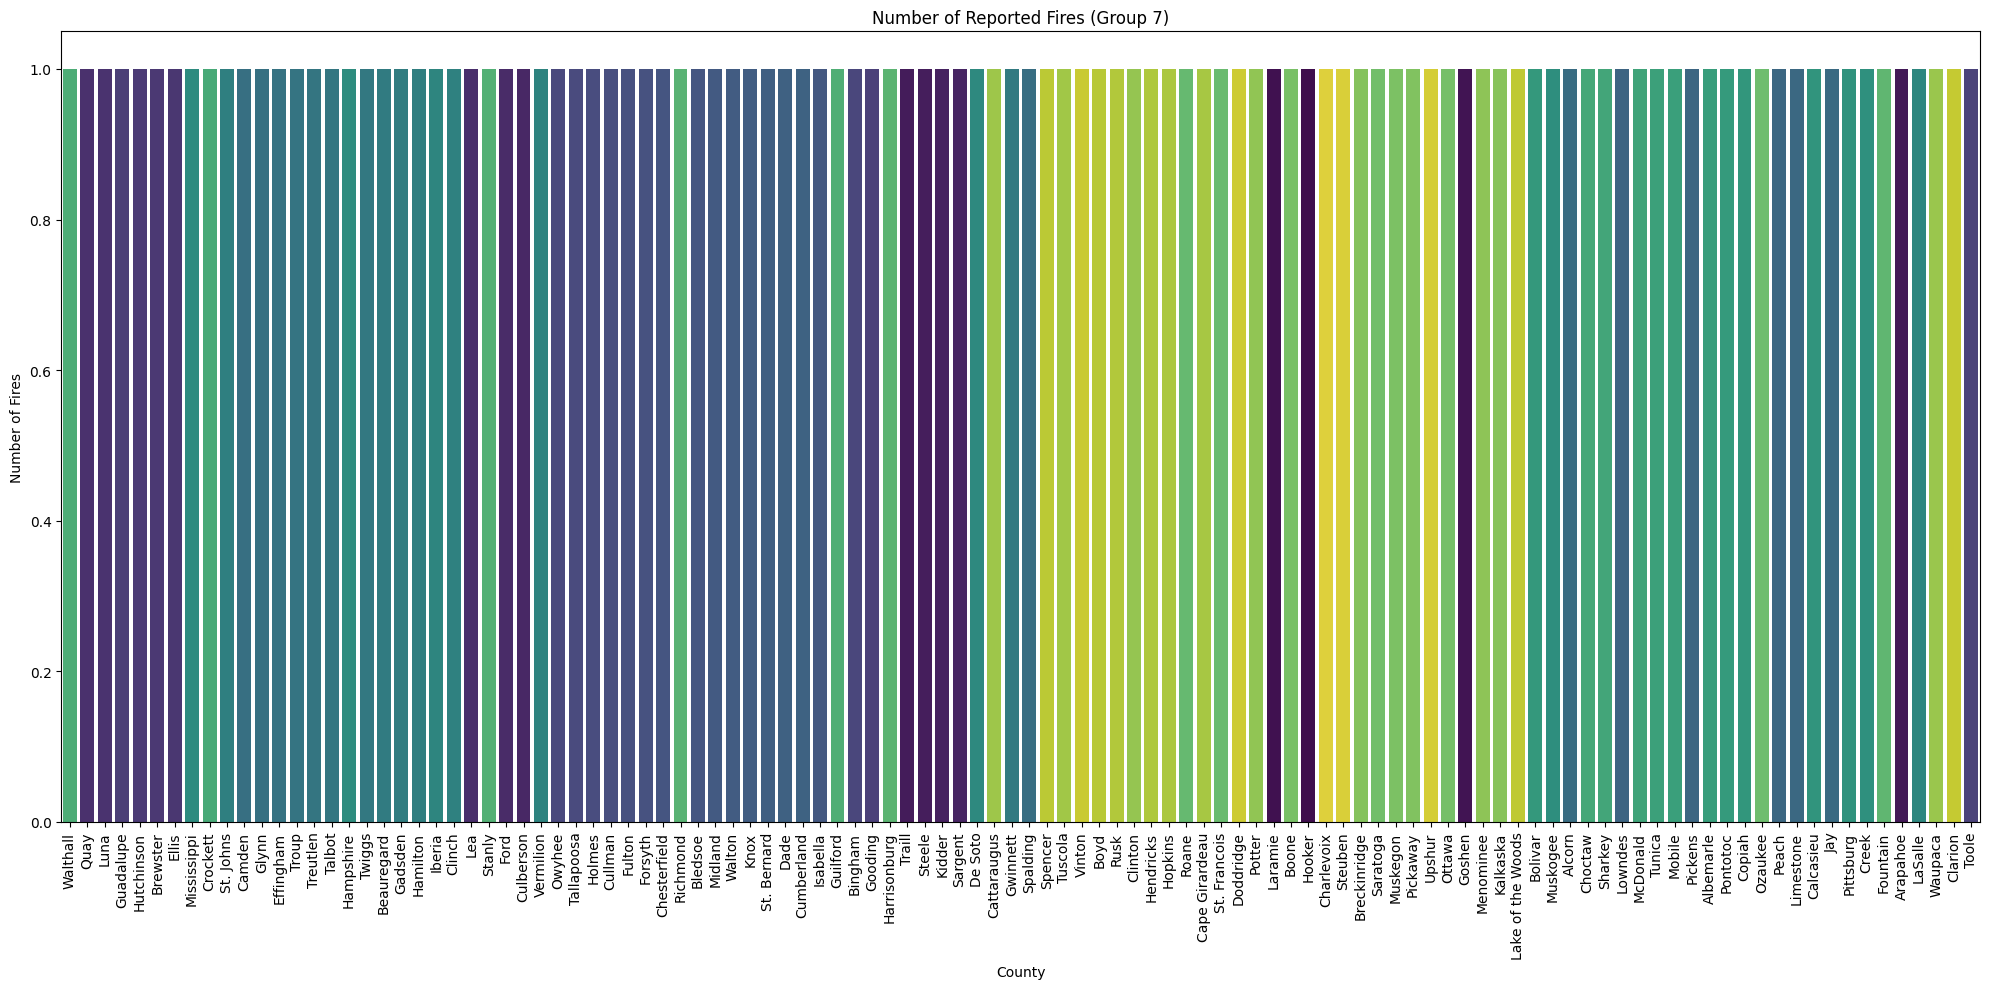

Top 15 reported fire counties: ['Coconino', 'Riverside', 'Lake', 'Grant', 'Idaho', 'Gila', 'San Diego', 'San Bernardino', 'Catron', 'Klamath', 'Fresno', 'Lincoln', 'Tulare', 'Siskiyou', 'Merced']


In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()
    us_fires_copy = us_fires_copy[(us_fires_copy['COUNTY'] != 'Unknown')]
    county_counts = us_fires_copy['COUNTY'].value_counts()
    valid_counties = county_counts[county_counts >= 0].index
    us_fires_filtered = us_fires_copy[us_fires_copy['COUNTY'].isin(valid_counties)]
    sorted_counties = county_counts[county_counts >= 0].sort_values(ascending=False).index.tolist()
    county_groups = county_groups = [sorted_counties[i:i+115] for i in range(0, len(sorted_counties), 115)]
    for i, group in enumerate(county_groups):
        subset = us_fires_filtered[us_fires_filtered['COUNTY'].isin(group)]
        plt.figure(figsize=(20, 10))
        sns.countplot(data=subset, x='COUNTY', hue='COUNTY', order=group, palette='viridis', dodge=False)
        plt.title(f'Number of Reported Fires (Group {i + 1})')
        plt.xlabel('County')
        plt.ylabel('Number of Fires')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

create_single_feature_plots(us_fires)
filtered_us = us_fires.copy()

# Get the top 15 counties by the number of fire reports
tops = filtered_us['COUNTY'].value_counts().head(15).index
filtered_us = filtered_us[filtered_us['COUNTY'].isin(tops)]
county_order = filtered_us['COUNTY'].value_counts().index.tolist()
print('Top 15 reported fire counties:', county_order)

##**Interpretation of Single Feature Plots:**

###**Count Plot of fire reports from different counties:**

###This plot shows the frequency of different counts of fire reports per diffent county.
###The x-axis represents the counties in decending order (e.g., Coconino, Riverside, Lake, Grant, Idaho, Gila, etc.), and the y-axis represents the count of teported fires.
###It helps identify the most common and least common places fires are reported in the dataset.
###We also included the counties with only one report of a fire in a list and the top 15 counties with the largest number of fires.
###Overall, the top 15 counties with the most reported fires are from 'Coconino', 'Riverside', 'Lake', 'Grant', 'Idaho', 'Gila', 'San Diego', 'San Bernardino', 'Catron', 'Klamath', 'Fresno', 'Lincoln', 'Tulare', 'Siskiyou', 'Merced'. These are counties in California, Arizona, Washington, New Mexico, Idaho, and Oregon. Which are western regions in the US called the Mountain and Pacific regions.
* ### (West) Pacific <- California = Riverside, lake, San Diego, San Bernardino, Fresno, Tulare, Siskiyou, and Merced.
* ### (West) Mountain <- Arizona = Coconino and Gila.
* ### (West) Pacific <- Washington = Grant.
* ### (West) Mountain <- New Mexico = Catron.
* ### (West) Mountain <- Idaho = Idaho and Lincoln.
* ### (West) Pacific <- Oregon = Klamath.
---



#**Dataset Single Feature Plots (Box Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates box plot to visualize single features of the dataset:
* ## Box Plot of Latitude Range Values.
* ## Here we are trying to identify which latitude has the most frequent amounts of fire reports.
* ## This box plot would help with identifying what latitudes range is mos prevalent in our dataset.

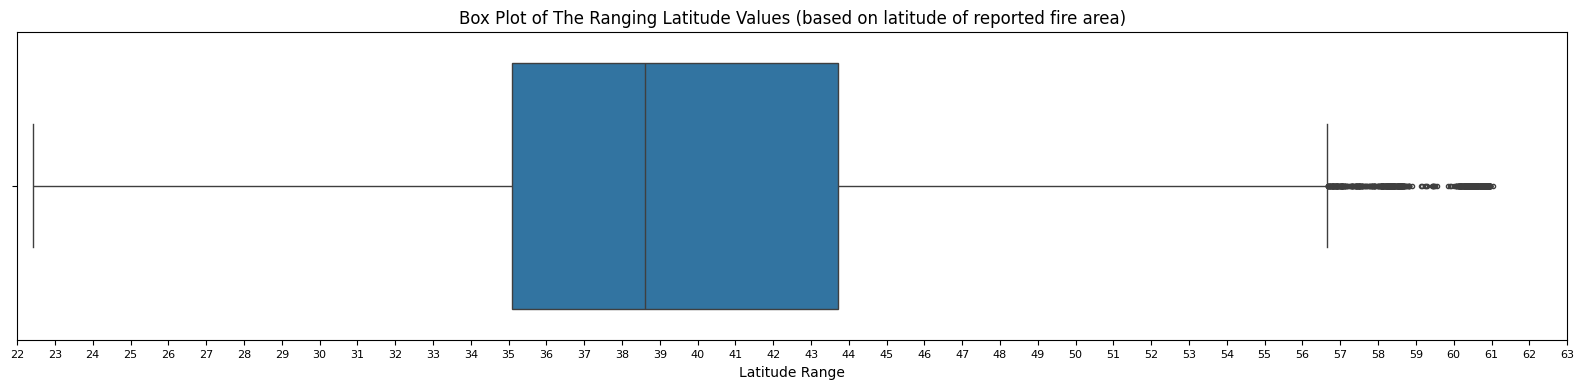

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()
    us_fires_copy = us_fires_copy[(us_fires_copy['LATITUDE'] != -999)]
    # Box Plot
    plt.figure(figsize=(20, 4))
    marker_size = dict(markersize=3)
    sns.boxplot(us_fires_copy, x='LATITUDE', flierprops=marker_size)
    plt.title('Box Plot of The Ranging Latitude Values (based on latitude of reported fire area)')
    plt.xlabel('Latitude Range')
    plt.xlim(22, 63)
    ticks_x = np.arange(22, 64, 1)
    plt.xticks(ticks_x, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**Box Plot of The Ranging Latitude Values:**

###This plot displays the distribution of latitude locations of reported US fires using a box-and-whisker representation.
###The box represents the interquartile range (IQR), which contains the middle 50% of the data lies between the 38 and 39 latitude values.
###The first quartile (25%) is about a 35 latitude value and the third quartile (75%) is about a 44 latitude value.
###The whiskers extend to the minimum between 22 and 23 latitude values and maximum of between 56 and 57 latitude values.
###Outliers are plotted as individual points beyond the whiskers right of the maximum value.
###The first quartile starts a bit after the 35 latitude value and the 3rd quartile is just before the 44 latitude value.

---



#**Dataset Single Feature Plots (Violin Plot)**

## **Explanation:**
## This cell defines a function called `create_single_feature_plots` that takes a DataFrame as input.
## It generates violin plot to visualize single features of the dataset, including:
* ## Violin Plot of Longitude Range Values
* ## Here we are trying to identify which longitude has the most frequent amounts of fire reports.
* ## This violin plot would help with identifying what longitude range is most prevalent in our dataset.

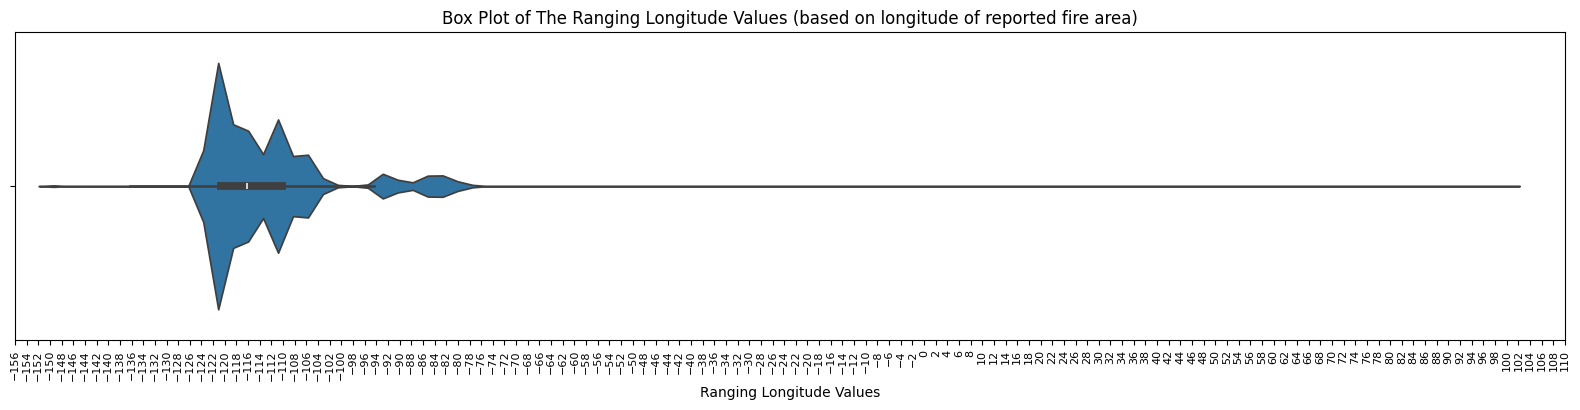

In [ ]:
def create_single_feature_plots(us_fires):
    us_fires_copy = us_fires.copy()
    us_fires_copy = us_fires_copy[(us_fires_copy['LONGITUDE'] != -999)]
    # Violin Plot
    plt.figure(figsize=(20, 4))
    sns.violinplot(us_fires_copy, x='LONGITUDE')
    plt.title('Box Plot of The Ranging Longitude Values (based on longitude of reported fire area)')
    plt.xlabel('Ranging Longitude Values')
    plt.xlim(-156, 110)
    ticks_x = np.arange(-156, 111, 2)
    plt.xticks(ticks_x, rotation=90, fontsize = 8)
    plt.show()

create_single_feature_plots(us_fires)

##**Interpretation of Single Feature Plots:**

###**violen Plot of The Ranging Longitude Values:**

###This plots median is at about a -116 longitude value.
###The highest Density is between -126 and -101 longitudes with it's largest peak being at -121 longitude.
###It's maximum is about -93 longitude and its minimum is about -137 longitude.
###The first quartile is located between -121 and -120 longitude and the third quartile is locateded at -110 longitude.

---



#**Dataset Two Feature Plots (Scatter Plot)**

## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between total destroyed fires per year from 1900 to 2024 for each us region.
## The function uses a scatter plot to showcase these relationships.
## This visualization is to help represent the highest years reported US fires as well as identify the regions with the most fire damage land over the years.
## We are looking to visualize the regions with the highest acres of damage do to fires between 1900-2024.

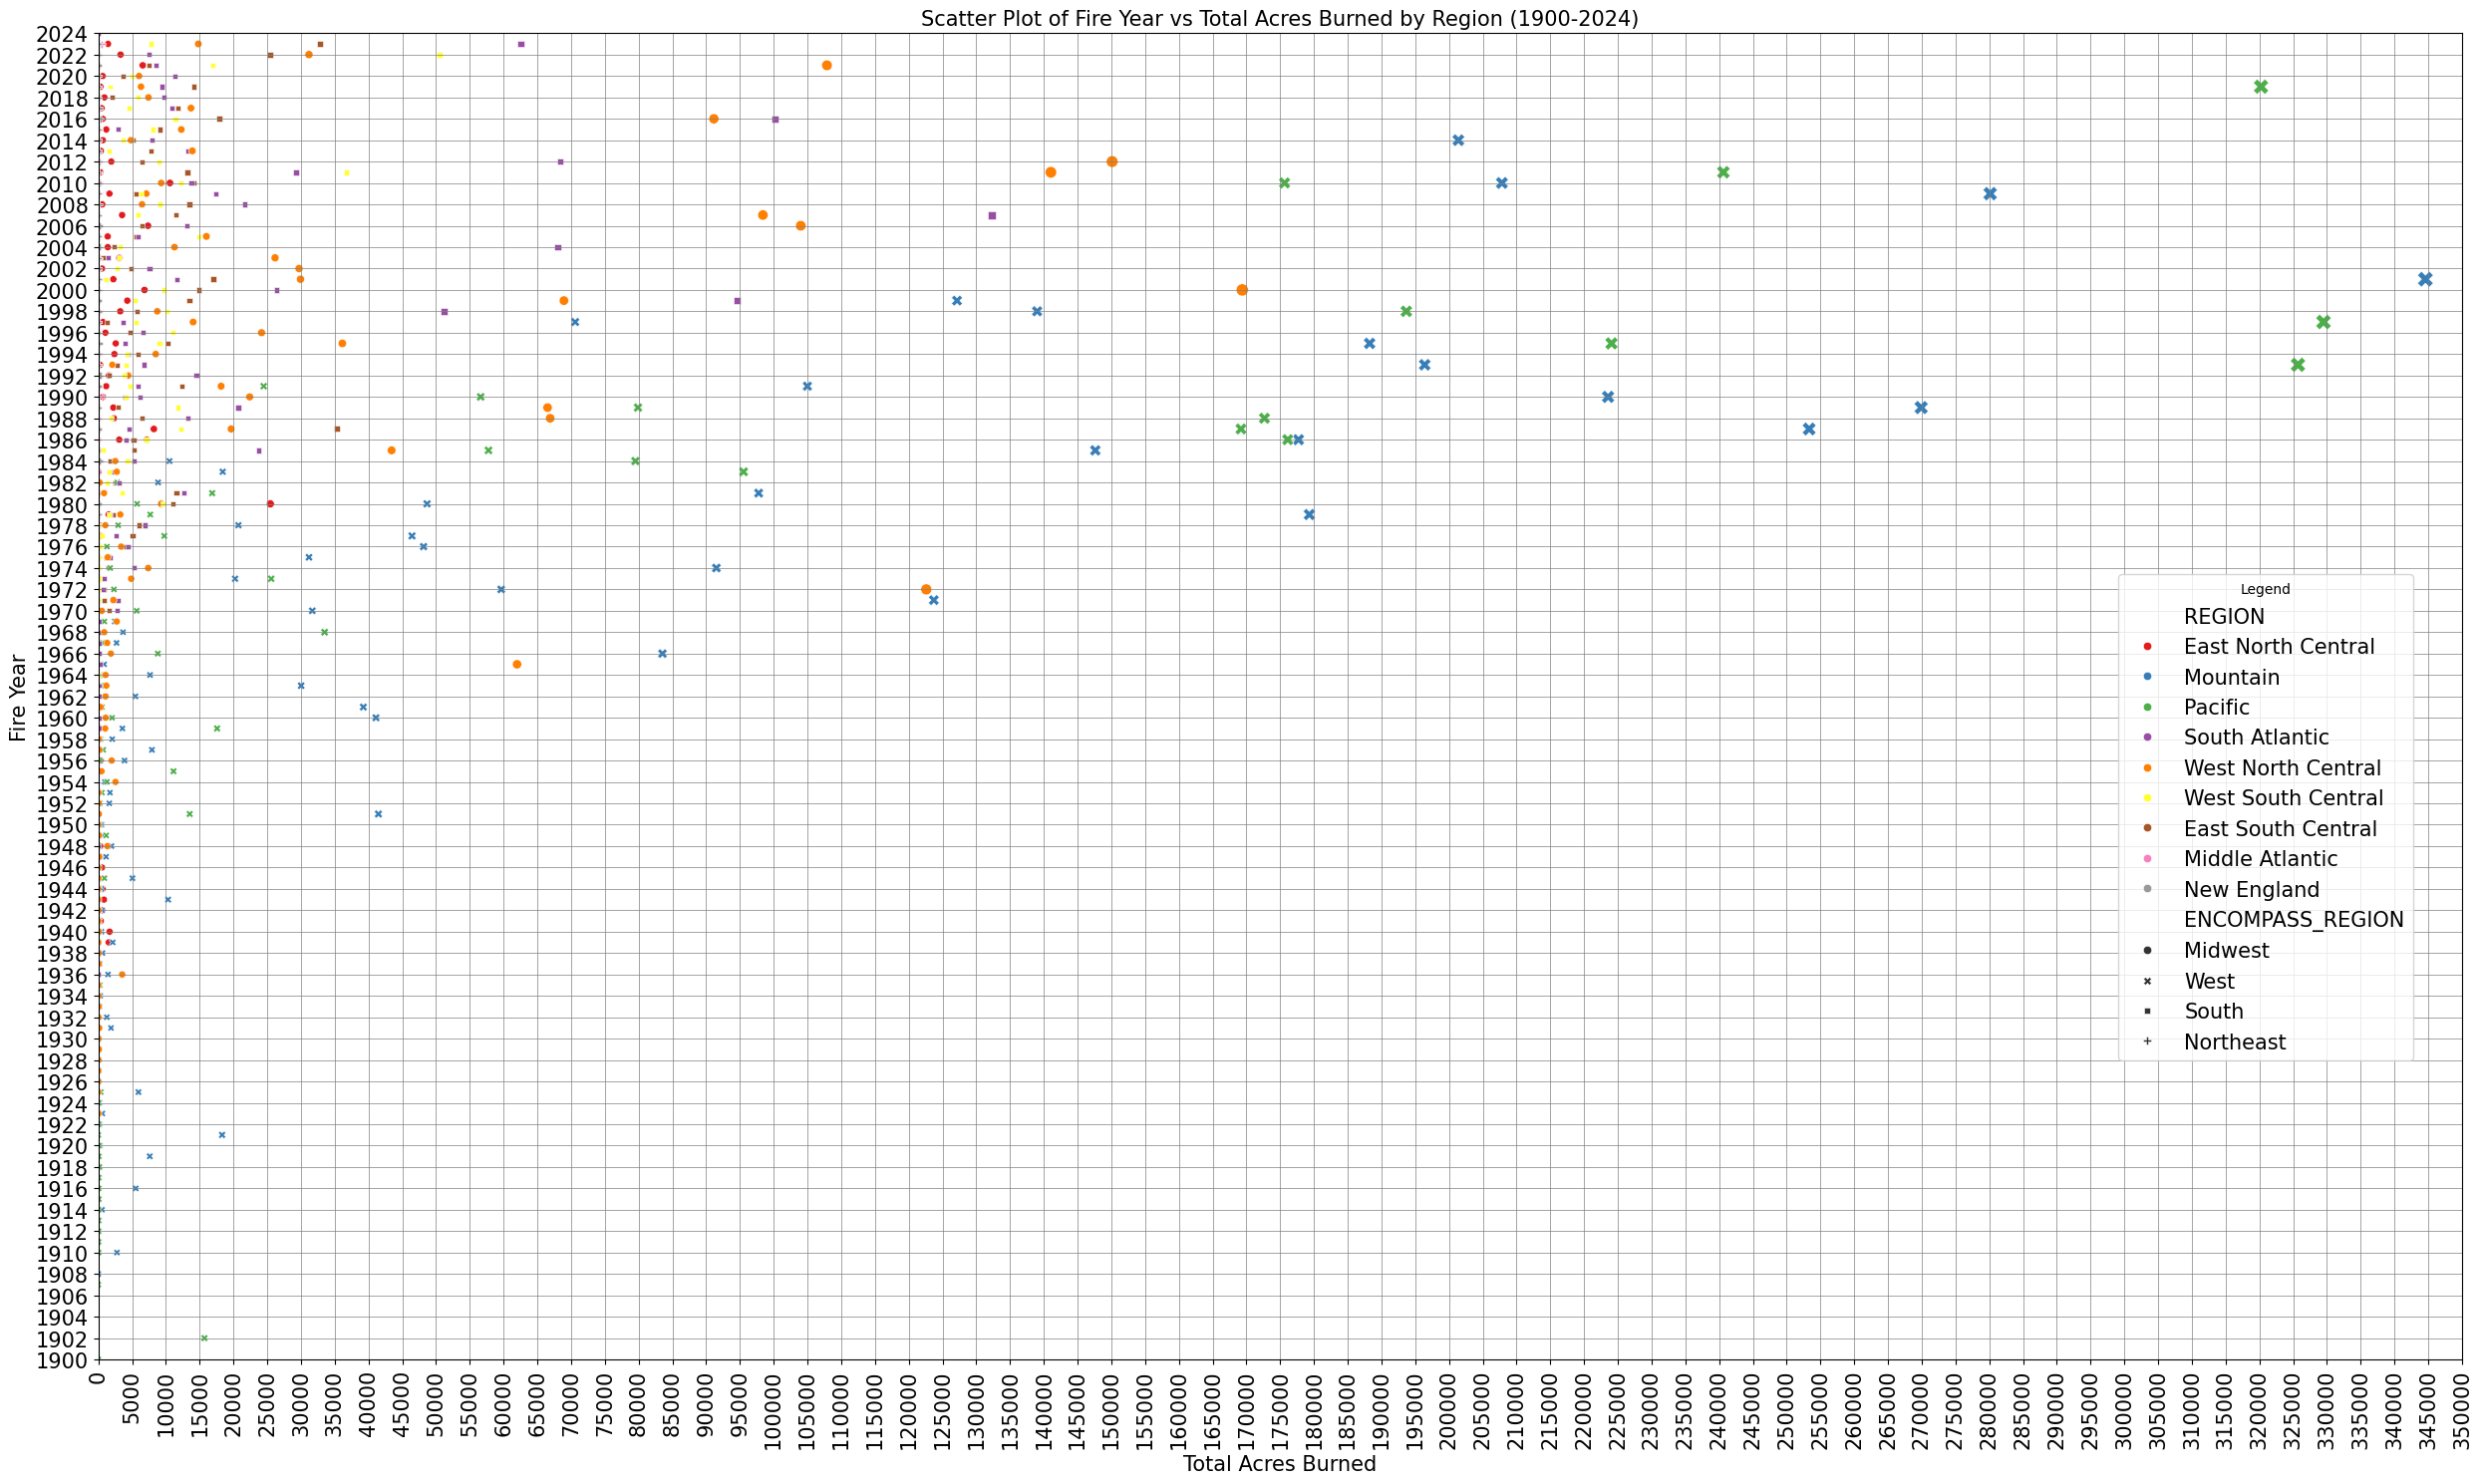

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):
  filtered_us_fires = us_fires.copy()

  state_to_region = {
        # Northeast
        'Maine': 'New England', 'New Hampshire': 'New England', 'Vermont': 'New England',
        'Massachusetts': 'New England', 'Rhode Island': 'New England', 'Connecticut': 'New England',
        'New York': 'Middle Atlantic', 'New Jersey': 'Middle Atlantic', 'Pennsylvania': 'Middle Atlantic',

        # Midwest
        'Ohio': 'East North Central', 'Indiana': 'East North Central', 'Illinois': 'East North Central',
        'Michigan': 'East North Central', 'Wisconsin': 'East North Central',
        'Minnesota': 'West North Central', 'Iowa': 'West North Central', 'Missouri': 'West North Central',
        'North Dakota': 'West North Central', 'South Dakota': 'West North Central', 'Nebraska': 'West North Central',
        'Kansas': 'West North Central',

        # South
        'Delaware': 'South Atlantic', 'Maryland': 'South Atlantic', 'District of Columbia': 'South Atlantic',
        'Virginia': 'South Atlantic', 'West Virginia': 'South Atlantic', 'North Carolina': 'South Atlantic',
        'South Carolina': 'South Atlantic', 'Georgia': 'South Atlantic', 'Florida': 'South Atlantic',
        'Kentucky': 'East South Central', 'Tennessee': 'East South Central', 'Alabama': 'East South Central',
        'Mississippi': 'East South Central',
        'Arkansas': 'West South Central', 'Louisiana': 'West South Central', 'Oklahoma': 'West South Central',
        'Texas': 'West South Central',

        # West
        'Montana': 'Mountain', 'Idaho': 'Mountain', 'Wyoming': 'Mountain', 'Colorado': 'Mountain',
        'New Mexico': 'Mountain', 'Arizona': 'Mountain', 'Utah': 'Mountain', 'Nevada': 'Mountain',
        'Washington': 'Pacific', 'Oregon': 'Pacific', 'California': 'Pacific', 'Alaska': 'Pacific',
        'Hawaii': 'Pacific'
  }

  region_to_usregion = {
        'New England': 'Northeast', 'Middle Atlantic': 'Northeast',
        'East North Central': 'Midwest', 'West North Central': 'Midwest',
        'South Atlantic': 'South', 'East South Central': 'South', 'West South Central': 'South',
        'Mountain': 'West', 'Pacific': 'West'
  }

  filtered_us_fires['REGION'] = us_fires['STATE'].map(state_to_region)
  filtered_us_fires['ENCOMPASS_REGION'] = filtered_us_fires['REGION'].map(region_to_usregion)
  aggregated_data = (filtered_us_fires.groupby(['FIREYEAR', 'REGION', 'ENCOMPASS_REGION'])['TOTALACRES'].sum().reset_index())
  # Create the scatter plot with the filtered DataFrame
  plt.figure(figsize=(25, 15))
  scatter_plot=sns.scatterplot(data=aggregated_data, x='TOTALACRES', y='FIREYEAR', hue='REGION', style='ENCOMPASS_REGION', size='TOTALACRES', sizes=(25, 1000), palette='Set1')
  plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
  plt.title('Scatter Plot of Fire Year vs Total Acres Burned by Region (1900-2024)', fontsize=15)
  plt.xlabel('Total Acres Burned', fontsize=15)
  plt.ylabel('Fire Year', fontsize=15)
  plt.ylim(1900, 2024)
  plt.xlim(0, 350000)
  ticks_X = np.arange(0, 350001, 5000)
  plt.xticks(ticks_X, rotation=90, fontsize = 15)
  ticks_y = np.arange(1900, 2025, 2)
  plt.yticks(ticks_y, fontsize = 15)
  plt.tight_layout()
  handles, labels = scatter_plot.get_legend_handles_labels()
  exclusion={'TOTALACRES', '0', '600000', '1200000', '1800000', '2400000', '3000000'}
  filtered_handles_labels = [(h, l) for h, l in zip(handles, labels) if l not in exclusion]
  plt.legend(*zip(*filtered_handles_labels), bbox_to_anchor=(0.85, 0.6), loc='upper left', title='Legend', fontsize=15)
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Scatter Plot of Fire Year vs Total Acres Burned by Region (1900-2024):**

###This plot shows the relationship between the year of the fire (FIREYEAR) and the total acres burned (TOTALACRES), with different colors represting the regions in the us (REGION) and marker styles representing their encompassing regions (ENCOMPASS_REGION).
###**Potential Interpretations**:
###Trends over time: You can observe that the significance of fire size has been increasing with the fire years in the 21st century having more frequent higher counts of fires.
###Impact of fire cause: Different colors and marker styles can reveal if certain causes tend to result in larger or smaller fires with with the Mountain and Pacific in the west regions having the most acres detroyed frequency over the years. Then New England and the Mid Atlantic in the northeast regions having the smallest number of acres detroyed frequency over the years. Finally everything else kind of falls in the middle.
###Clusters and outliers: Our clusters are between the years of 1994 to 2020 with reports of 1000 to 15000 acres damaged due to fires with our outliers being between reports of <350000 between the years of 1984 and 2020.

---



#**Dataset Two Feature Plots (Swarm Plot)**



## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between 'TOTALACRES' (total acres burned >= 1000) and 'COUNTY' (Top 15 US counties with the most fires).
## The time frame is also limited to 1984-2024 since that is when fires start increasing in rates reported.
## The function uses a swarm plot and to showcase these relationships.
## This visualization helps identify the the top 15 counties with the most reported fires. This will help interpret the risk for the top 15 counties to be indanger of serious fires that are greater than 1000 acres.

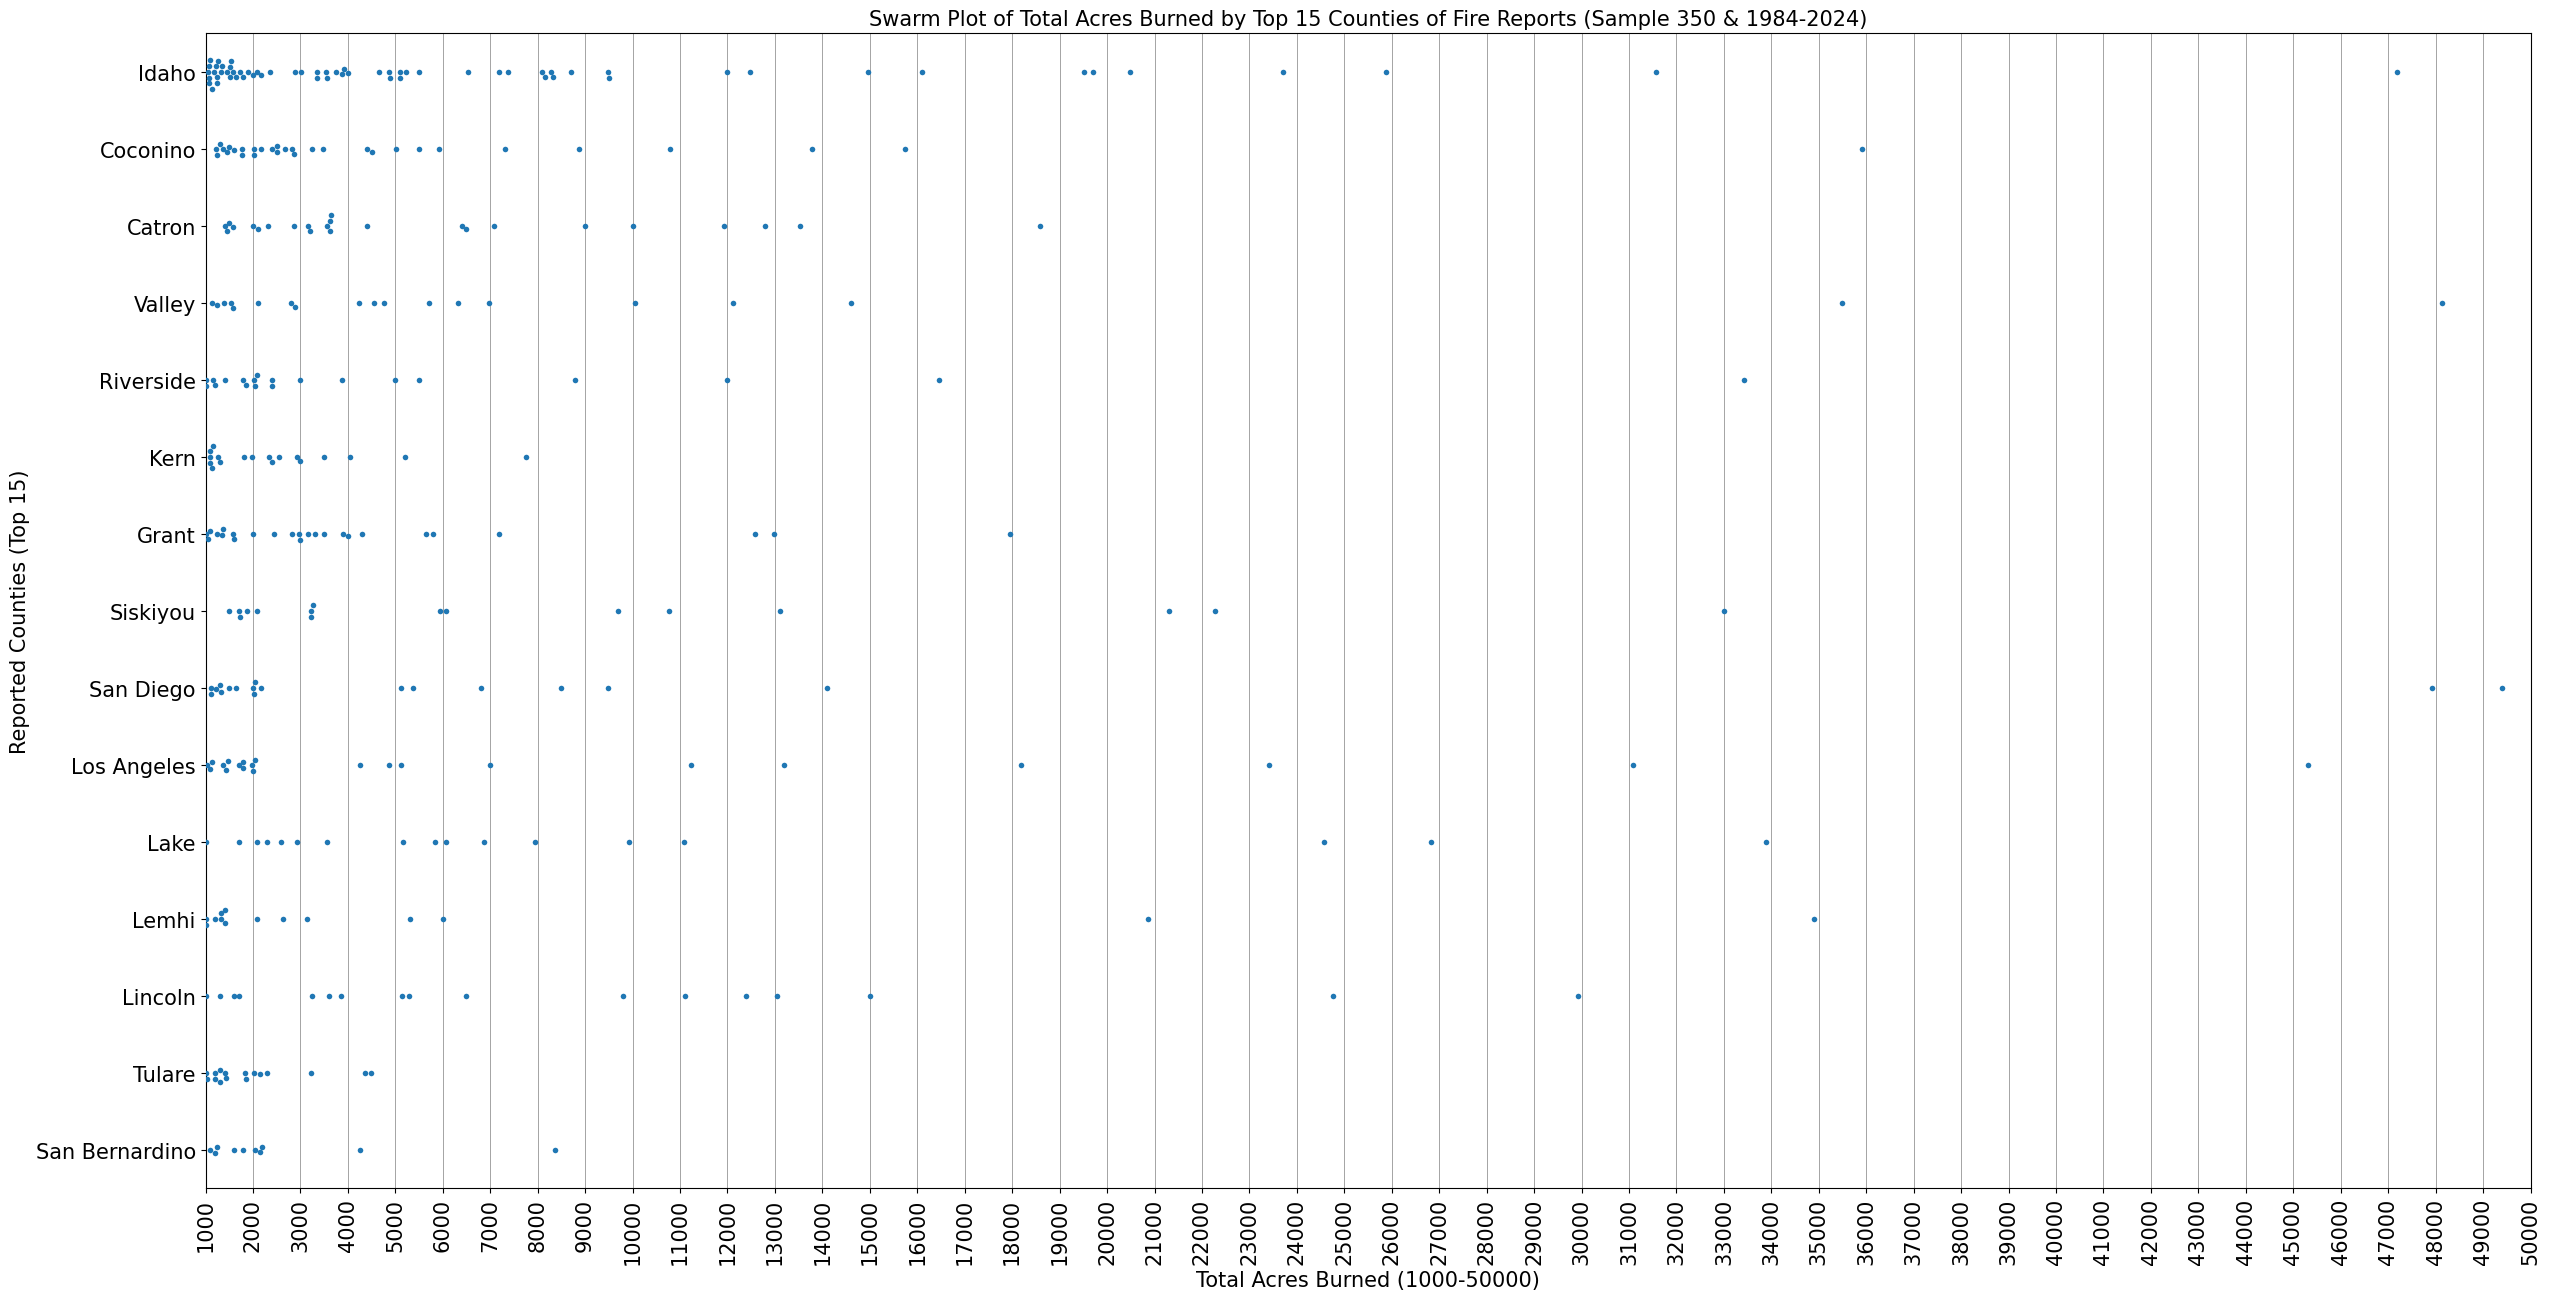

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):
  # Filter the DataFrame for years 1984 to 2024
  filtered_us_fires2 = us_fires.copy()
  filtered_us_fires2 = filtered_us_fires2[(filtered_us_fires2['FIREYEAR'] >= 1984) & (filtered_us_fires2['FIREYEAR'] <= 2024)]
  filtered_us_fires2 = filtered_us_fires2[(filtered_us_fires2['COUNTY'] != 'Unknown')]
  filtered_us_fires2 = filtered_us_fires2[(filtered_us_fires2['TOTALACRES'] >= 1000)]
  county_counts = filtered_us_fires2['COUNTY'].value_counts()
  # Identify the top 25 counties by fire report count
  top_counties = filtered_us_fires2['COUNTY'].value_counts().head(15).index
  filtered_us_fires2 = filtered_us_fires2[filtered_us_fires2['COUNTY'].isin(top_counties)]
  # Take a random sample of 250 data points
  sample_us_fires2 = filtered_us_fires2.sample(n=350, random_state=42)

  # Create the swarm plot with the sampled data
  plt.figure(figsize=(30, 15))
  plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
  sns.swarmplot(data=sample_us_fires2, x='TOTALACRES', y='COUNTY', order=top_counties, size=4)
  plt.xlim(1000, 50000)
  ticks_X = np.arange(1000, 50001, 1000)
  plt.xticks(ticks_X, rotation=90, fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.title('Swarm Plot of Total Acres Burned by Top 15 Counties of Fire Reports (Sample 350 & 1984-2024)', fontsize = 15)
  plt.xlabel('Total Acres Burned (1000-50000)', fontsize = 15)
  plt.ylabel('Reported Counties (Top 15)', fontsize = 15)
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Swarm Plot of Total Acres Burned by Cause of Fire (Sample)**:

###This plot displays the distribution of total acres >= 1000 burned for the top 15 counties in the US, using a categorical scatter plot.

###**Potential Interpretations:**

###Comparison of State: Idaho, Coconino, and Canton tend to have the highest number of reported fires but do not seem to have the highest damages a fire has beem reported of causing.
###The highest fires that have destoryed the most acres is in San Diego and Lake counties within California.
###Identification of differences: Idaho tends to have the highest total acres destoyed do to fires.
###Clusters and outliers: Our clusters fall between 1000 and 5000 acres damaged due to fires. Outliers tend to fall between 40000 to <50000 reported acres burned.

---



#**Dataset Two Feature PlotS (Strip Plot)**

## **Explanation:**
## This cell defines a function called `create_two_feature_plots` that aims to visualize the relationships between two features in the dataset.
## It generates a plot to explore the interactions between 'TOTALACRES' (total acres burned) and 'STATE' (US States with reported fires) in order from smallest to largest amounts of fires reported.
## The function uses a strip plot to showcase these relationships.
## This visualization helps identify the states with the highest frequency of fires. This will help interpret the high risk of fires for certain states (1984-2024).

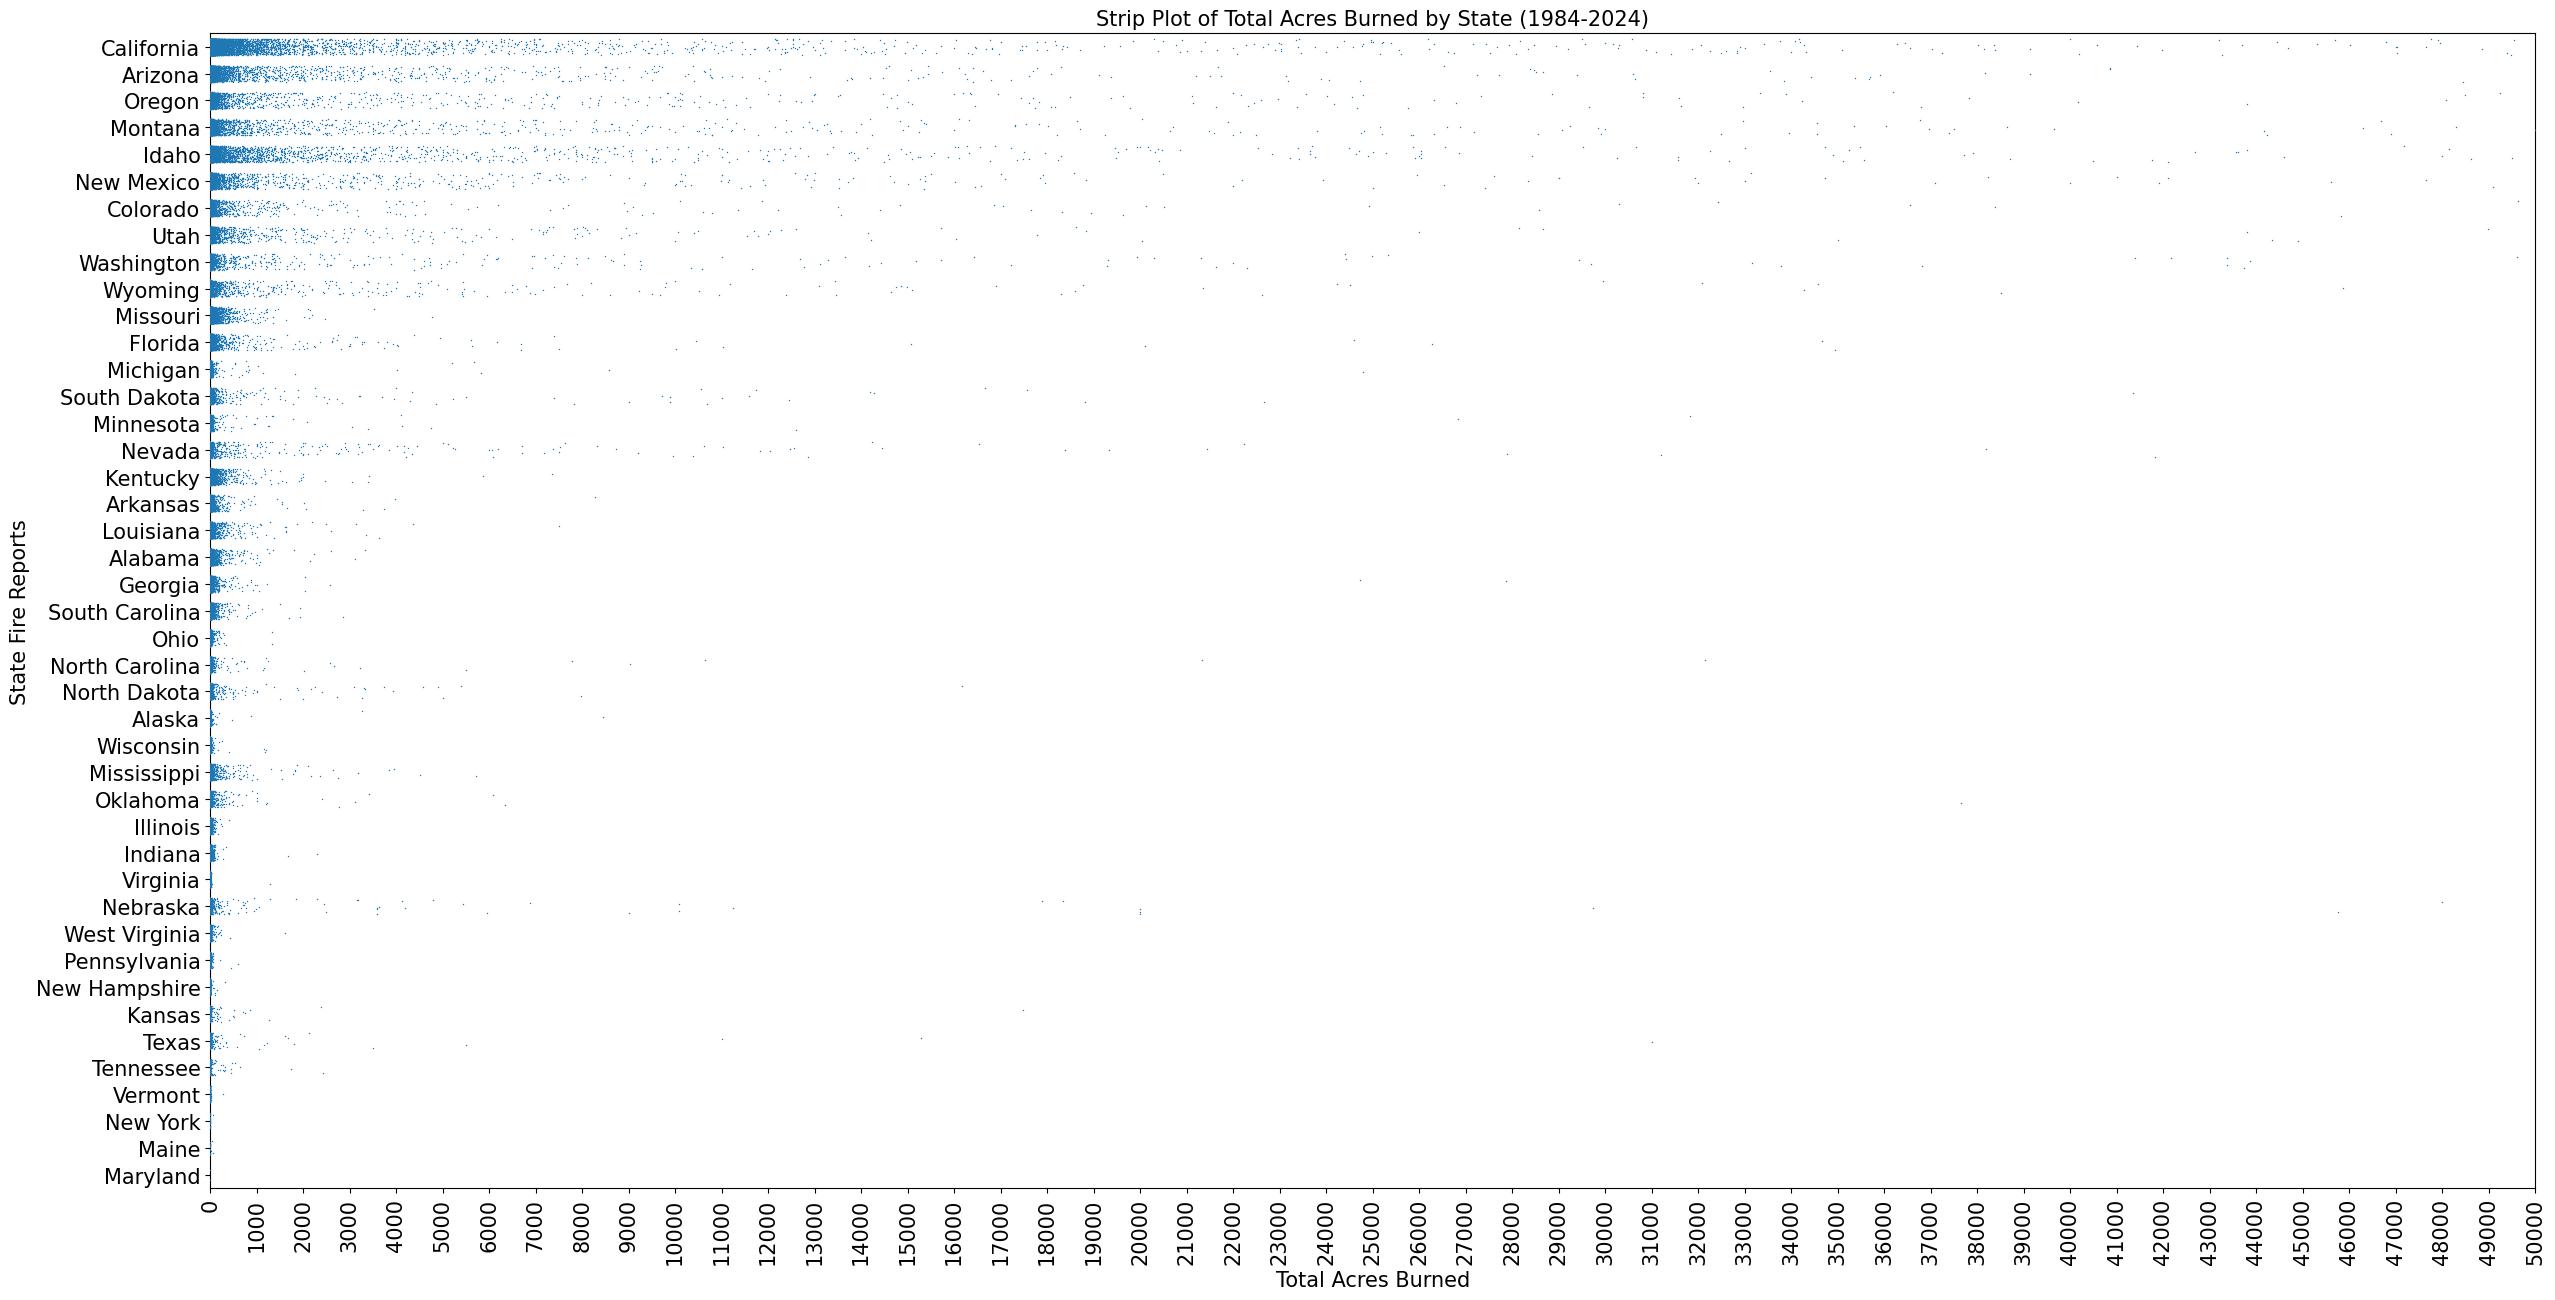

In [ ]:
# Function to create two-feature plots
def create_two_feature_plots(us_fires):
  filtered_us_fires3 = us_fires.copy()
  filtered_us_fires3 = filtered_us_fires3[(filtered_us_fires3['FIREYEAR'] >= 1984) & (filtered_us_fires3['FIREYEAR'] <= 2024)]
  filtered_us_fires3 = filtered_us_fires3[(filtered_us_fires3['STATE'] != 'Unknown')]
  ordered_states = filtered_us_fires3['STATE'].value_counts().index
  # Strip Plot of TOTALACRES grouped by STATCAUSE
  plt.figure(figsize=(30, 15))
  sns.stripplot(data=us_fires, x='TOTALACRES', y='STATE', order=ordered_states, jitter=0.3, size=1)
  plt.xlim(0, 50000)  # Set x-axis limit to 5
  ticks_X = np.arange(0, 50001, 1000)
  plt.xticks(ticks_X, rotation=90, fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.title('Strip Plot of Total Acres Burned by State (1984-2024)', fontsize = 15)
  plt.xlabel('Total Acres Burned', fontsize = 15)
  plt.ylabel('State Fire Reports', fontsize = 15)
  plt.show()

create_two_feature_plots(us_fires)

##**Interpretation of Two-Feature Plots**:

###**Strip Plot of Total Acres Burned by State:**

###This plot is similar to the swarm plot but presents the data points along a single axis (x-axis in this case).

###**Potential Interpretations:**

###The states with the highest freuence of reported fires are California, Idaho, Arizona, Oregan, and Montana with each of these states having the lowest and largest acres of fire damage.
###Cluster and Outlier detection: The cluster are between 0 and 2000 with outliers being above <40000 acres of damage.

---



#**Overall Interpretation:**

###By analyzing these two-feature plots together, you can gain a deeper understanding of the relationships between fire year, total acres burned, states, counties.

###Patterns and Trends: California seems to be a big place effected by a tone of wild fires.

###Correlations: Correlations include the fact that all the clusters are at the beginning of the graph with the outliers being about 40000.
###Influencing Factors: The most effect place seem to be mostly on the west coast or the center of the US.

---



#**Dataset summary (Dataframe Dimensions)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the dataset's shape.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

##With this Dataframe Dimension we can get the overal shape of our dataset.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    print("Dataset Shape:", us_fires.shape)

display_dataset_summary(us_fires)

Dataset Shape: (566779, 9)


##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Shape:**

###This indicates the number of rows (observations) and columns (features) in the dataset.
###**Interpretation:**
###We have a large dataset with only 9 unique colums but over 564191 rows of information.

---



#**Dataset summary (Dataframe Info)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the data types.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

##With this Dataframe info we can get a more indepth understanding of the mechanics that each row works with.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    print("\nDataset Info:")
    print(us_fires.info())

display_dataset_summary(us_fires)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 566779 entries, 0 to 672027
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LATITUDE          566779 non-null  float64
 1   LONGITUDE         566779 non-null  float64
 2   COUNTY            566779 non-null  object 
 3   FIREYEAR          566779 non-null  int64  
 4   SIZECLASS         566779 non-null  object 
 5   TOTALACRES        566779 non-null  float64
 6   STATCAUSE         566779 non-null  object 
 7   FIRETYPECATEGORY  566779 non-null  object 
 8   STATE             566779 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 43.2+ MB
None


##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Info:**

###This shows the data types of each column and the number of non-null values.
###**Interpretation:**
###Data types: Our data type include 3 float64 values, 1 int64 value, and 5 object values.
###Non-null values: The number of Non-Null's is equal to the total entries.

---



#**Dataset summary (Statistics Summary)**

## **Explanation:**
## This cell defines a function called `display_dataset_summary` that aims to provide a comprehensive overview of the dataset.

## It displays information about the descriptive statistics for numerical features, and frequency counts for categorical features.

## The summary helps to understand the overall structure and characteristics of the dataset, including the number of rows and columns, data types of each column, and basic statistical measures.

## With this information we can now interpret the highest and lowest values from each column.

In [ ]:
# Task 4: Dataset Summary
def display_dataset_summary(us_fires):
    for col in us_fires.select_dtypes(include=['object']).columns:
        print(f'\n{us_fires[col].value_counts()}')  # Frequency of each category

display_dataset_summary(us_fires)


COUNTY
Coconino      37960
Riverside     18781
Lake          11611
Grant         11553
Idaho         11182
              ...  
Cullman           1
Holmes            1
Tallapoosa        1
Owyhee            1
Toole             1
Name: count, Length: 801, dtype: int64

SIZECLASS
A          339018
B          174149
C           34109
D            6758
E            4172
Unknown      3595
F            3021
H             899
G             799
I             156
J             101
K               2
Name: count, dtype: int64

STATCAUSE
Lightning               218099
Undetermined             94613
Camping                  53433
Equipment                47314
Incendiary               38968
Unknown                  37312
Debris/Open Burning      27303
Other Human Cause        25908
Smoking                  16765
Other Natural Cause       2753
Railroad                  2737
Human                      698
Miscellaneous              306
Utilities                  147
Firearms/Weapons           129
Debr

##**Interpretation of Dataset Summary:**

###The display_dataset_summary function provides several pieces of information about the dataset:

###**Dataset Description (Numeric Columns):**

###This provides descriptive statistics for numerical features, including measures like mean, standard deviation, minimum, maximum, and quartiles.
###Interpretation:
###Central tendency: Mean and median provide insights into the typical or average values of a feature.
###Spread: Standard deviation and quartiles indicate the variability or dispersion of the data around the central tendency.
###Range: Minimum and maximum values show the extent of the data's range.
###**Dataset Description (Categorical Columns):**

###This shows frequency counts for categorical features, providing the count of each unique category within categorical columns.

###**Interpretation:**
###Category prevalence: Frequency counts reveal the most and least common categories within a feature.
###Distribution: You can assess the overall distribution of categories and identify potential imbalances or skewness.


---



#**Dataset Relationship Visualization (Histograms)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates various histogram plots to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
## With these histograms we hope to find a relationship between these clusterd together graphs.

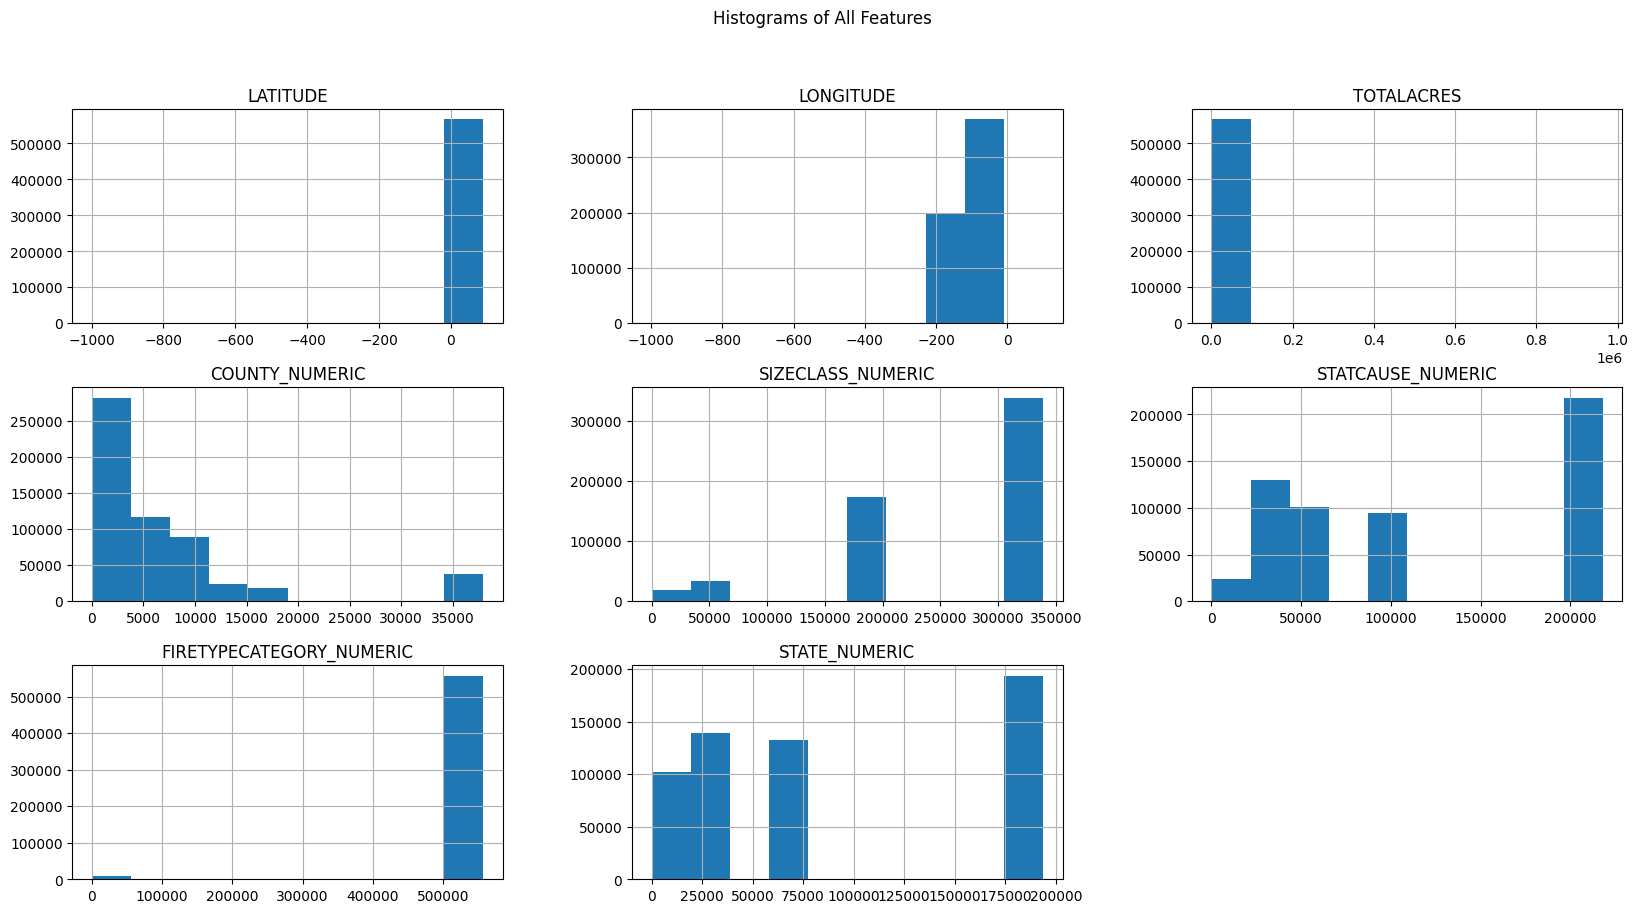

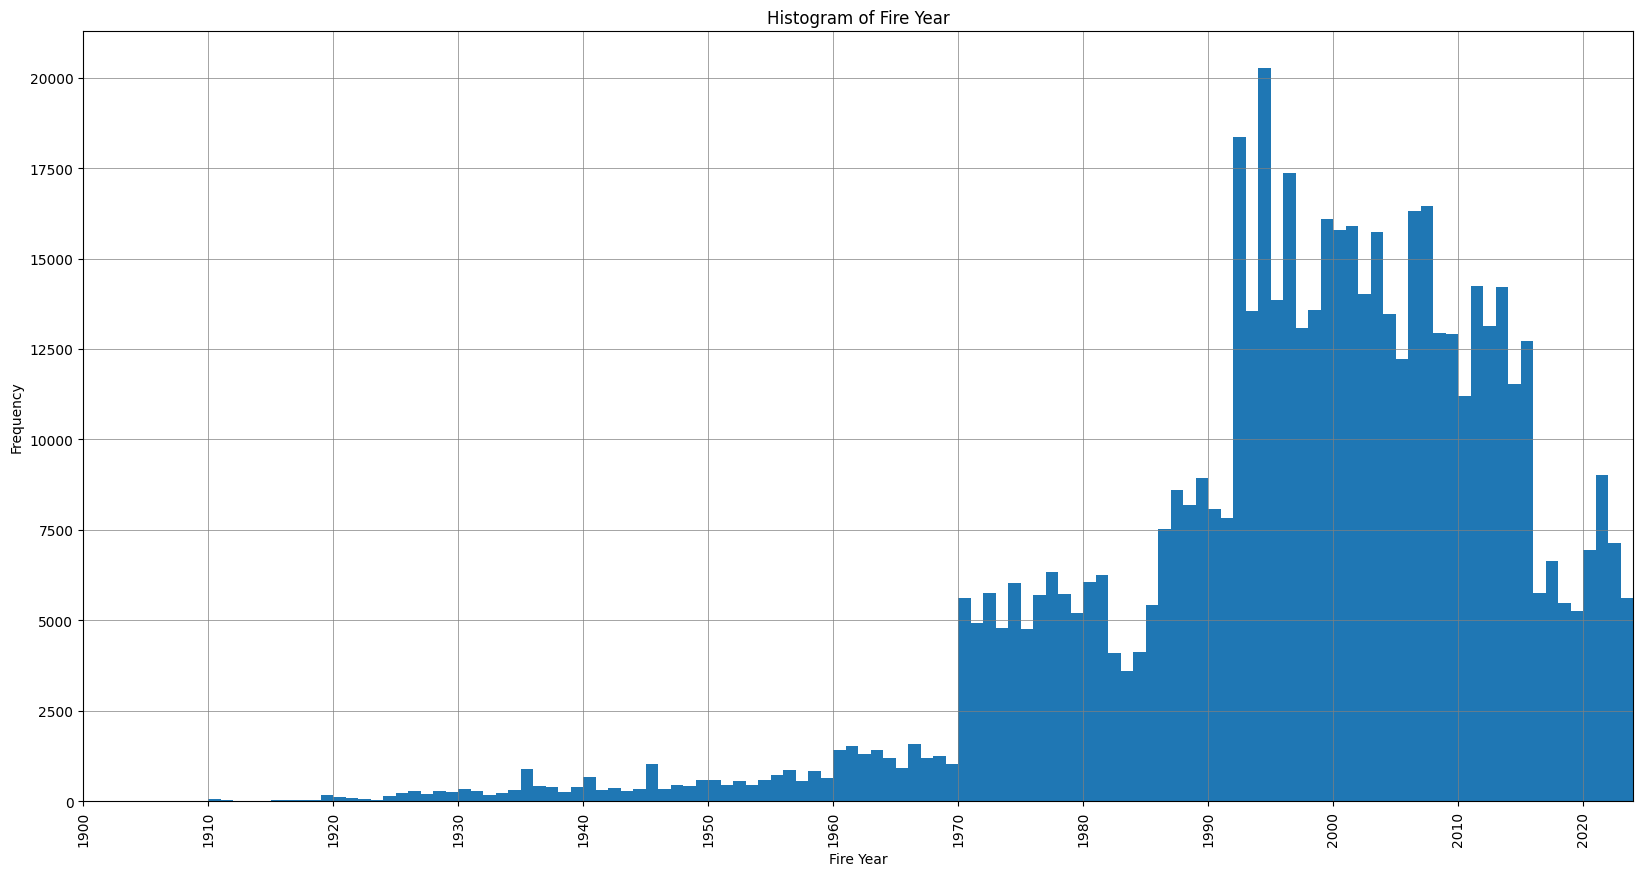

In [ ]:
def relationship_visualization(sample_us_fires):

    converted_us_fires2 = us_fires.copy()

    # Histograms for Each Feature (modified for FIREYEAR)
    numerical_cols = converted_us_fires2.select_dtypes(include=np.number).columns.tolist()

    # Remove FIREYEAR from the list of numerical columns to treat it separately
    numerical_cols.remove('FIREYEAR')

    for col in converted_us_fires2.select_dtypes(include='object').columns:
      converted_us_fires2[f'{col}_NUMERIC'] = converted_us_fires2[col].map(converted_us_fires2[col].value_counts())

    numerical_cols.extend([f'{col}_NUMERIC' for col in converted_us_fires2.select_dtypes(include='object').columns])

    # Create histograms for numerical features (excluding FIREYEAR)
    converted_us_fires2[numerical_cols].hist(figsize=(20, 10))
    plt.suptitle('Histograms of All Features')
    plt.show()

    # Create a separate histogram for FIREYEAR with appropriate bins
    plt.figure(figsize=(20, 10))
    plt.xlim(1900, 2024)
    plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
    plt.hist(us_fires['FIREYEAR'], bins=range(int(us_fires['FIREYEAR'].min()), int(us_fires['FIREYEAR'].max()) + 2, 1))  # Bins for each year
    plt.title('Histogram of Fire Year')
    plt.xlabel('Fire Year')
    plt.ylabel('Frequency')
    ticks_X = np.arange(1900, 2025, 10)
    plt.xticks(ticks_X, rotation=90)
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Histograms**:

###Distribution of Features: Histograms show the frequency distribution of each numerical feature. You can observe the shape of the distribution (e.g., normal, skewed), identify potential outliers, and gain insights into the central tendency and spread of the data.
###Example: A histogram of TOTALACRES might reveal a skewed distribution with a long tail, indicating that most fires are relatively small, but there are a few very large fires.

---



#**Dataset Relationship Visualization (Box Plots)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates various box plots to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
##With these graphs we are able to find a more descriptive version of our data types through their min, max, medium, 1st, and 3rd quartiles

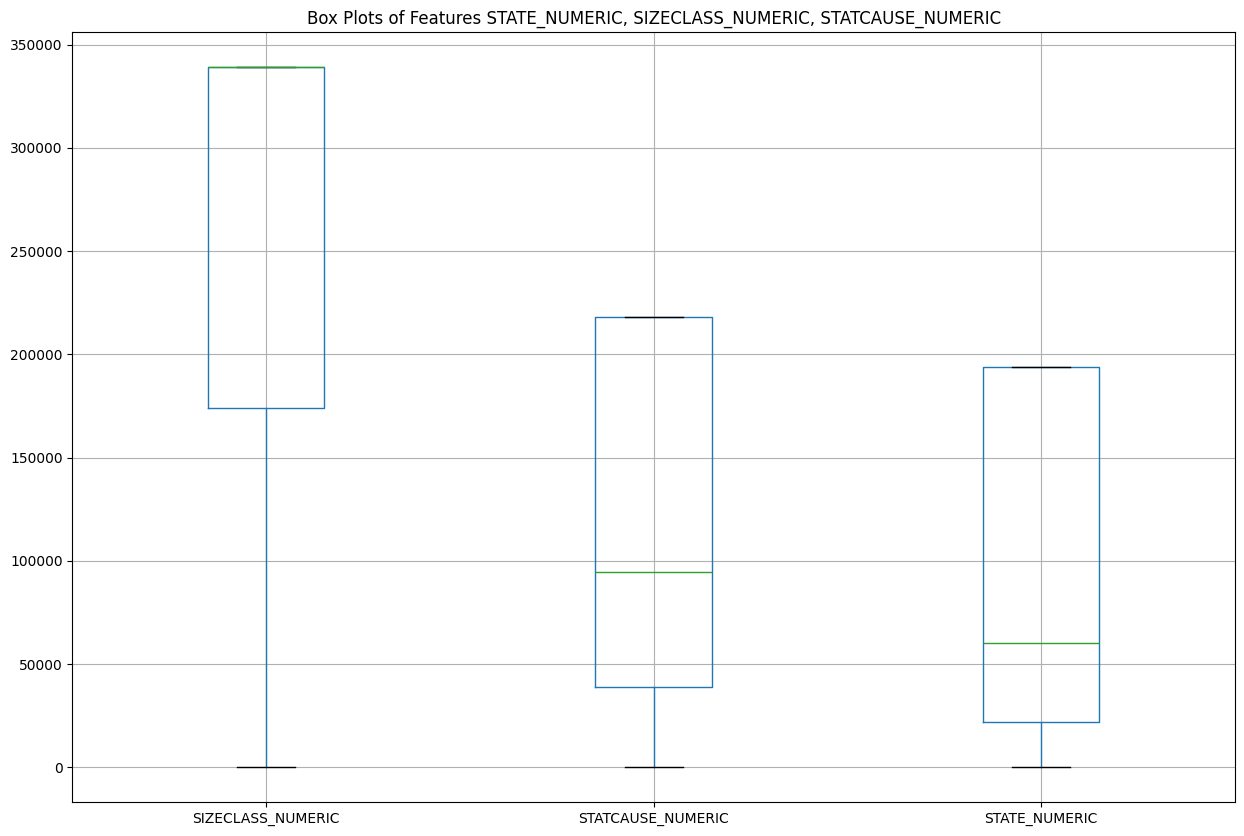

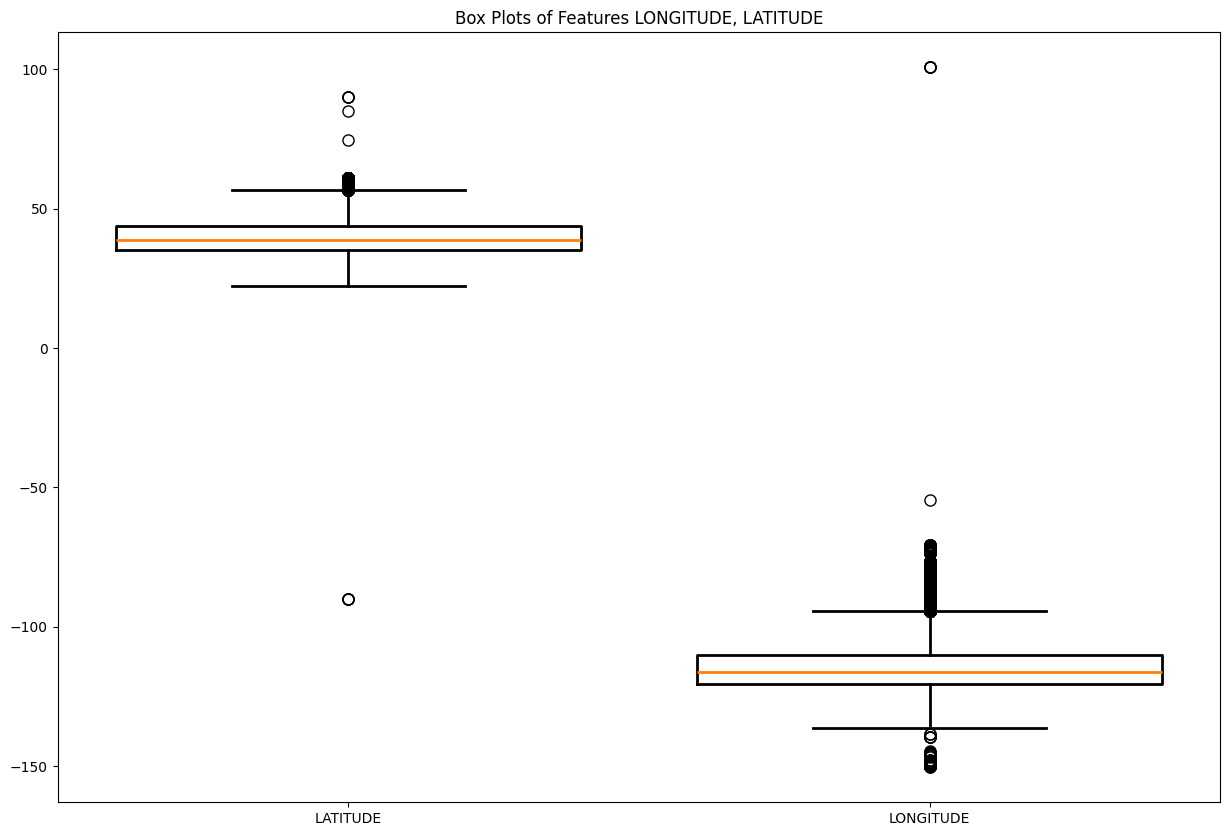

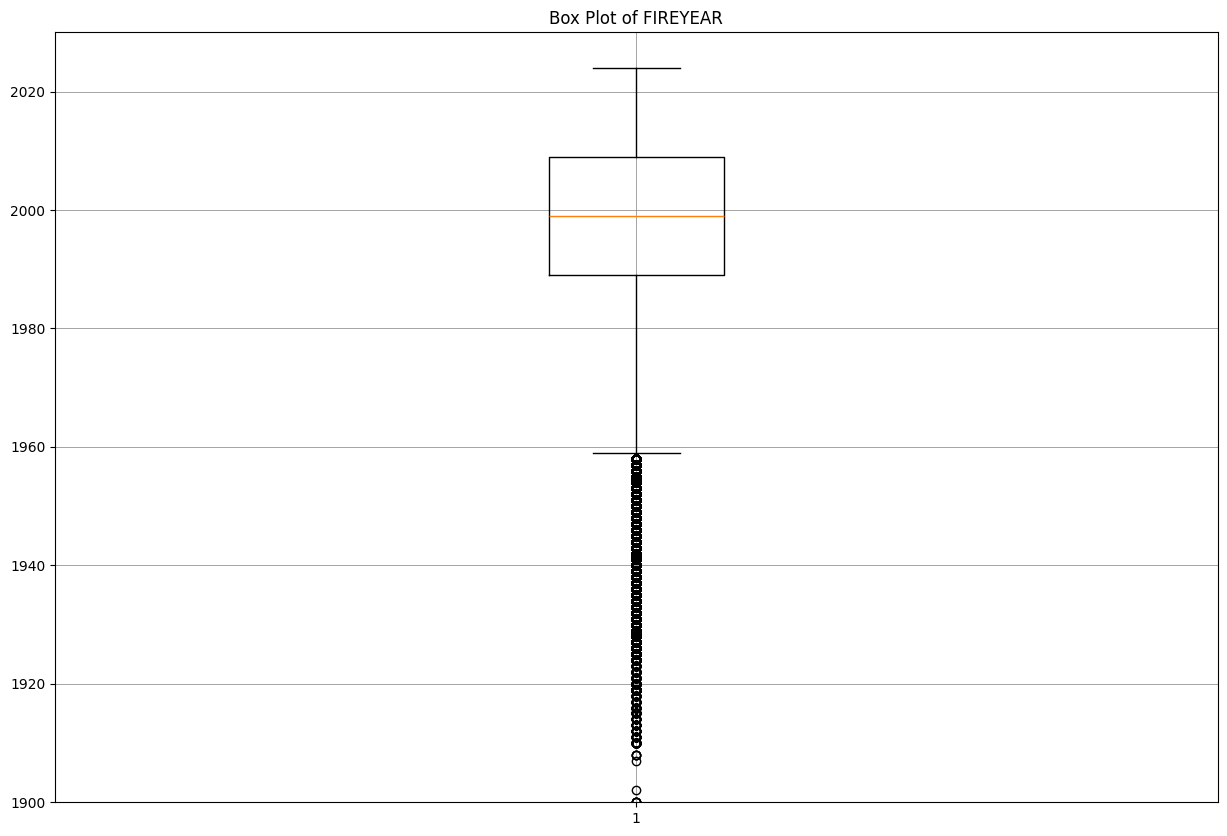

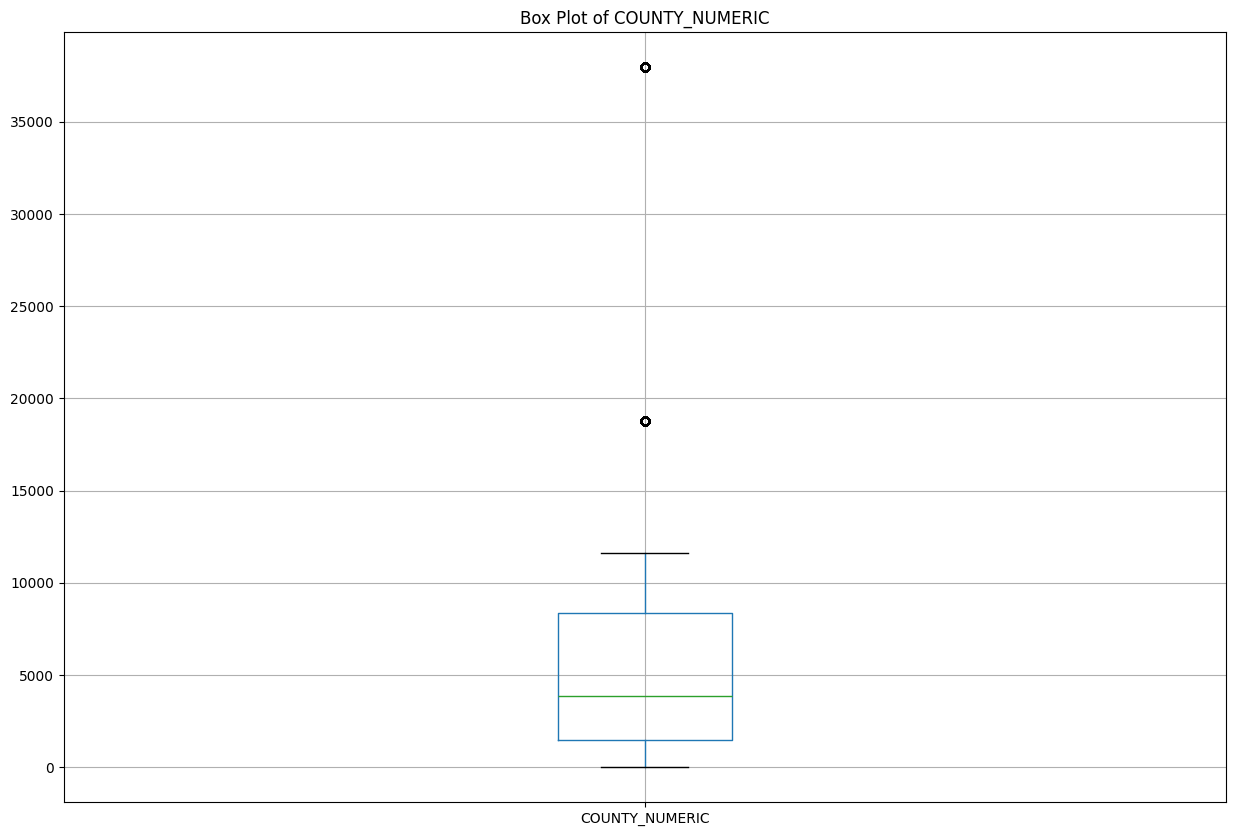

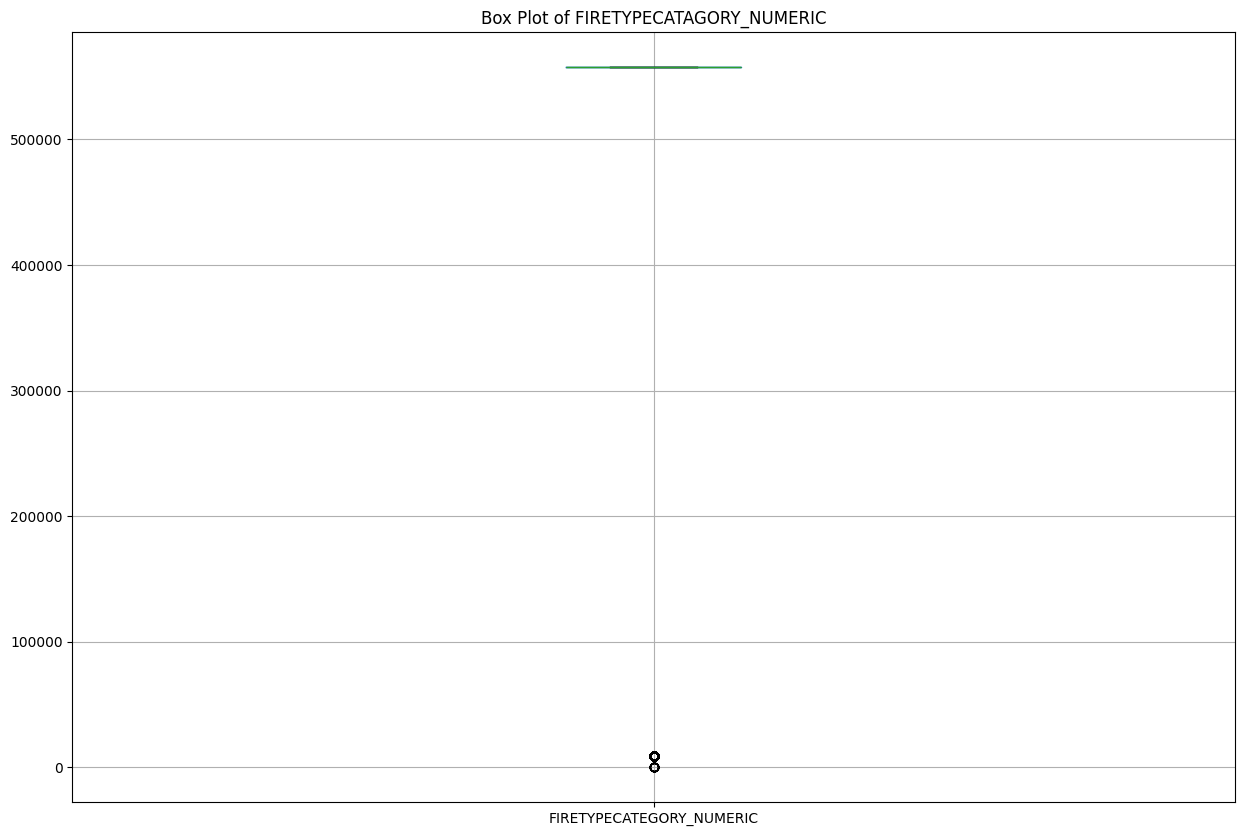

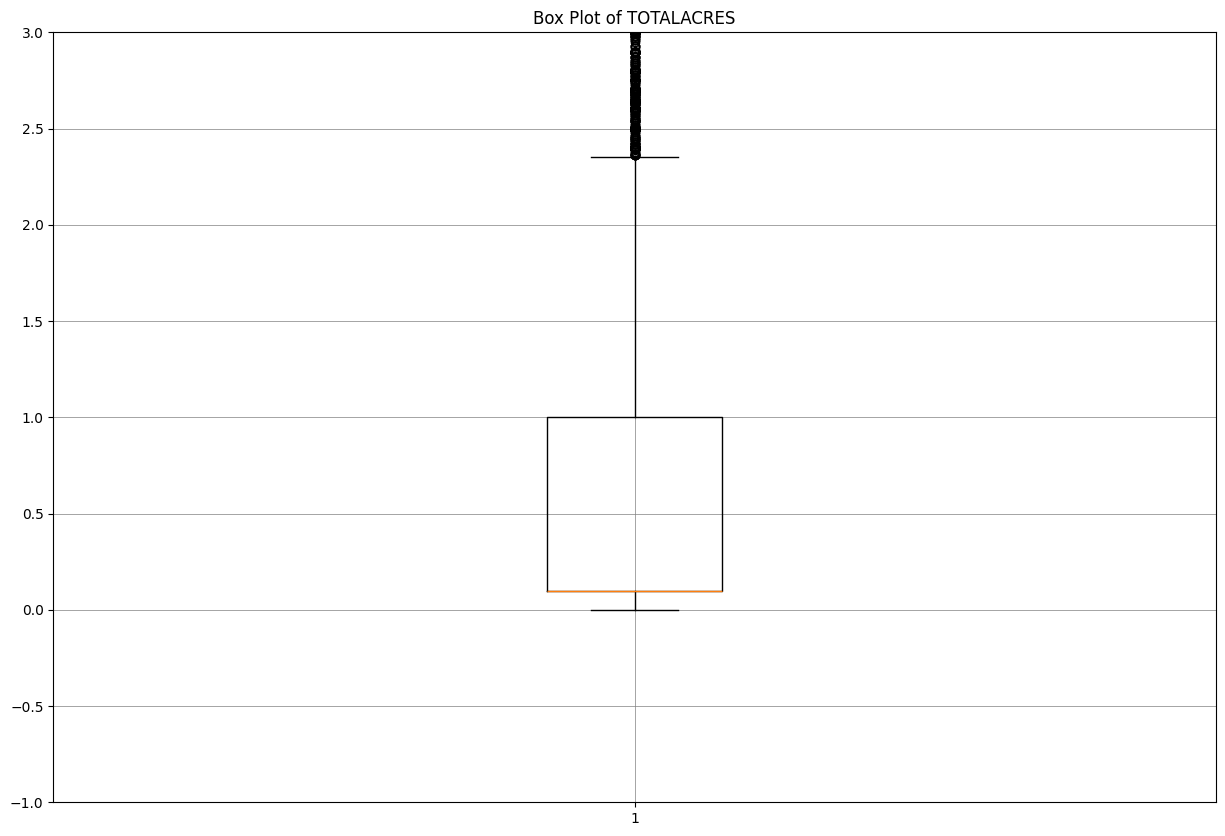

In [ ]:
def relationship_visualization(sample_us_fires):

    converted_us_fires3 = us_fires.copy()

    # Histograms for Each Feature (modified for FIREYEAR)
    numerical_cols1 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols2 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols3 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()
    numerical_cols4 = converted_us_fires3.select_dtypes(include=np.number).columns.tolist()

    for col in converted_us_fires3.select_dtypes(include='object').columns:
      converted_us_fires3[f'{col}_NUMERIC'] = converted_us_fires3[col].map(converted_us_fires3[col].value_counts())

    numerical_cols1.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols2.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols3.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])
    numerical_cols4.extend([f'{col}_NUMERIC' for col in converted_us_fires3.select_dtypes(include='object').columns])

    boxplot1 = numerical_cols1
    boxplot2 = numerical_cols2
    boxplot3 = numerical_cols3
    boxplot4 = numerical_cols4

    boxprops = dict(linewidth=2)
    whiskerprops = dict(linewidth=2)
    capprops = dict(linewidth=2)
    medianprops = dict(linewidth=2)
    flierprops = dict(markersize=8)

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC' from the list of numerical columns to treat it separately
    boxplot1.remove('TOTALACRES')
    boxplot1.remove('LATITUDE')
    boxplot1.remove('LONGITUDE')
    boxplot1.remove('FIREYEAR')
    boxplot1.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot1.remove('COUNTY_NUMERIC')

    # Box Plots forFeatures STATE_NUMERIC, SIZECLASS_NUMERIC, STATCAUSE_NUMERIC
    converted_us_fires3[boxplot1].boxplot(figsize=(15, 10))
    plt.title('Box Plots of Features STATE_NUMERIC, SIZECLASS_NUMERIC, STATCAUSE_NUMERIC')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', 'FIREYEAR'
    boxplot2.remove('TOTALACRES')
    boxplot2.remove('COUNTY_NUMERIC')
    boxplot2.remove('STATE_NUMERIC')
    boxplot2.remove('STATCAUSE_NUMERIC')
    boxplot2.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot2.remove('SIZECLASS_NUMERIC')
    boxplot2.remove('FIREYEAR')

    # Box Plots forFeatures LONGITUDE, LATITUDE
    converted_us_firesl = converted_us_fires3.copy()
    converted_us_firesl = converted_us_firesl[(converted_us_firesl['LONGITUDE'] != -999) & (converted_us_firesl['LATITUDE'] != -999)]
    plt.figure(figsize=(15, 10))
    plt.boxplot([converted_us_firesl[col] for col in boxplot2],
    labels=boxplot2,
    widths=0.8,
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=medianprops,
    flierprops=flierprops)
    plt.title('Box Plots of Features LONGITUDE, LATITUDE')
    plt.show()

    # Create a separate box plot for FIREYEARS
    plt.figure(figsize=(15, 10))
    plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
    us_fires_copy8 = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)]
    plt.ylim(1900, 2030)
    plt.boxplot(us_fires_copy8['FIREYEAR'])
    plt.title('Box Plot of FIREYEAR')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', etc.
    boxplot3.remove('TOTALACRES')
    boxplot3.remove('LATITUDE')
    boxplot3.remove('LONGITUDE')
    boxplot3.remove('FIREYEAR')
    boxplot3.remove('FIRETYPECATEGORY_NUMERIC')
    boxplot3.remove('STATE_NUMERIC')
    boxplot3.remove('STATCAUSE_NUMERIC')
    boxplot3.remove('SIZECLASS_NUMERIC')

    # Box Plot for Feature COUNTY_NUMERIC
    converted_us_fires3[boxplot3].boxplot(figsize=(15, 10))
    plt.title('Box Plot of COUNTY_NUMERIC')
    plt.show()

    # Remove 'TOTALACRES', 'LATITUDE', 'LONGITUDE', 'FIREYEARS', 'FIRETYPECATAGORY_NUMERIC', 'COUNTY_NUMERIC', etc.
    boxplot4.remove('TOTALACRES')
    boxplot4.remove('LATITUDE')
    boxplot4.remove('LONGITUDE')
    boxplot4.remove('FIREYEAR')
    boxplot4.remove('COUNTY_NUMERIC')
    boxplot4.remove('STATE_NUMERIC')
    boxplot4.remove('STATCAUSE_NUMERIC')
    boxplot4.remove('SIZECLASS_NUMERIC')

    # Box Plot for Feature FIRETYPECATAGORY_NUMERIC
    converted_us_fires3[boxplot4].boxplot(figsize=(15, 10))
    plt.title('Box Plot of FIRETYPECATAGORY_NUMERIC')
    plt.show()

    # Create a separate box plot for TOTALACRES
    filtered_us_fires3 = us_fires.copy()
    filtered_us_fires3 = filtered_us_fires3[(filtered_us_fires3['TOTALACRES'] >= 0)]
    plt.figure(figsize=(15, 10))
    plt.ylim(-1, 3)
    plt.boxplot(filtered_us_fires3['TOTALACRES'])
    plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
    plt.title('Box Plot of TOTALACRES')
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Box Plots**:

###Comparison of Distributions: Box plots provide a visual summary of the distribution of each feature, including the median, quartiles, and potential outliers. You can compare the distributions of different features and identify potential differences in their central tendencies, spreads, and the presence of outliers.

###Example: A box plot comparing TOTALACRES for different fire causes (STATCAUSE) might show that fires caused by lightning tend to be larger than those caused by human activities.

---



#**Dataset Relationship Visualization (Scatter Matrix)**

## **Explanation:**
## This cell defines a function called `relationship_visualization` that aims to explore and visualize relationships between different features in the dataset.
## It generates a scatter matrix of various sources to understand the interactions and dependencies between features.
## This visualization helps to identify potential correlations, patterns, and outliers in the data, providing insights into how features relate to each other.
##With a Scatter Matrix we are able to see a correlation like we have never seen before as the jointing graphs begin to merge there values physically together.

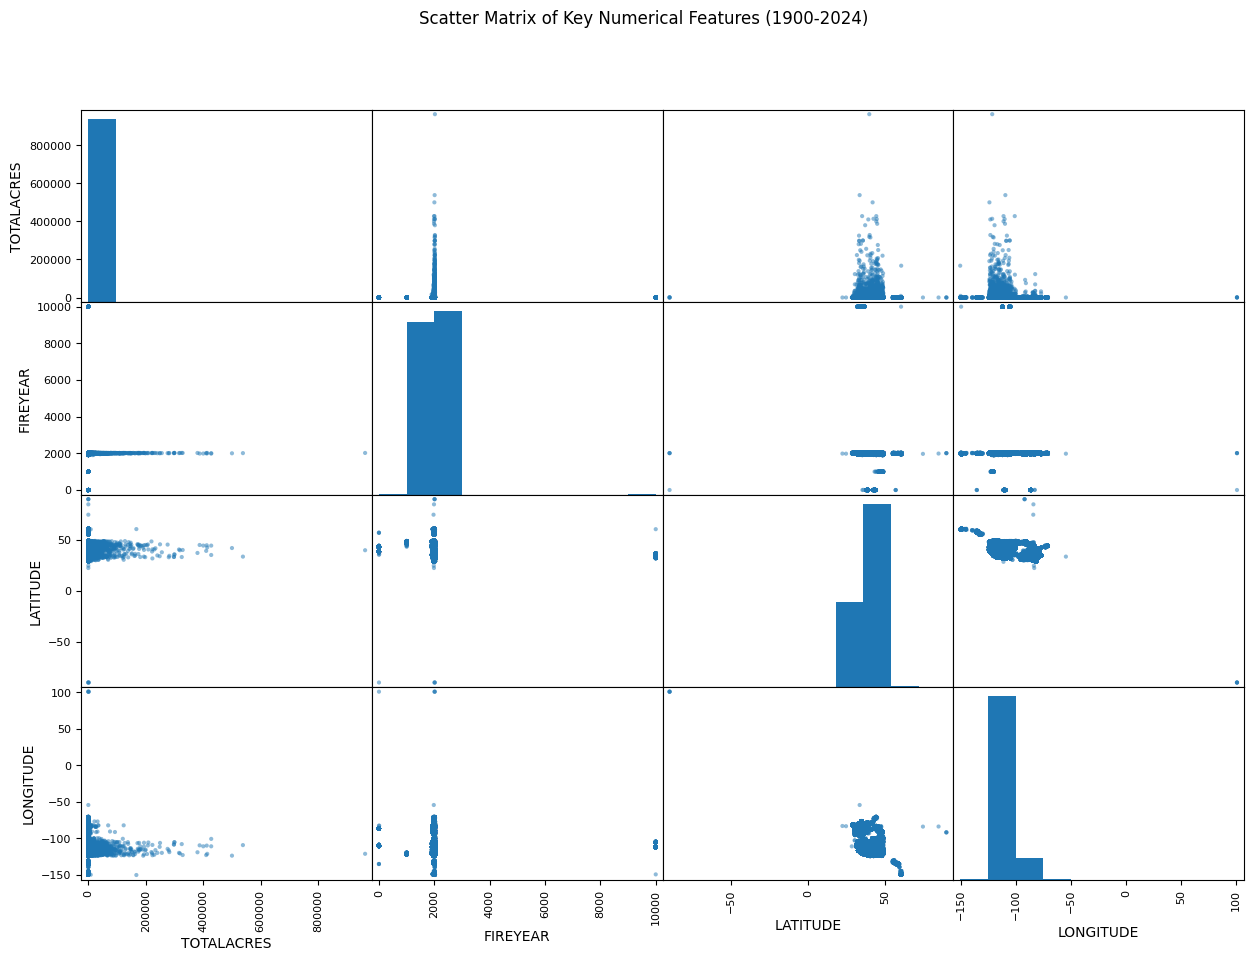

In [ ]:
def relationship_visualization(sample_us_fires):

    # Check if the columns exist before selecting them
    selected_columns = ['TOTALACRES', 'FIREYEAR', 'LATITUDE', 'LONGITUDE']

    # Filter the DataFrame for years 1900 to 2024
    filtered_us_fires = us_fires[(us_fires['FIREYEAR'] >= 1900) & (us_fires['FIREYEAR'] <= 2024)]
    filtered_us_fires = us_fires[(us_fires['LONGITUDE'] != -999) & (us_fires['LATITUDE'] != -999)]

    filtered_us_fires = filtered_us_fires.reset_index()  # Resetting the index of the filtered DataFrame
    axes = scatter_matrix(filtered_us_fires[selected_columns], figsize=(15, 10))  # Use selected_columns and filtered_us_fires
    plt.suptitle('Scatter Matrix of Key Numerical Features (1900-2024)')
    plt.show()

# Create a smaller sample
sample_size = 1000  # Adjust the sample size as needed
sample_us_fires = us_fires.sample(n=sample_size, random_state=42)  # Use random_state for reproducibility

relationship_visualization(sample_us_fires)

##**Interpretation of Relationship Visualization**:

###The relationship_visualization function generates various plots to explore relationships between features in the dataset. Here's an interpretation of the potential insights you can derive from these visualizations:

###**Scatter Matrix**:

###Relationships between Features: The scatter matrix visualizes the relationships between pairs of numerical features. Each scatter plot in the matrix shows the relationship between two features, allowing you to identify potential correlations, patterns, or clusters in the data.
###Example: A scatter plot of TOTALACRES versus FIREYEAR might reveal a trend of increasing fire sizes over time, suggesting a potential impact of climate change.

##**Overall Interpretation**:

###By analyzing these visualizations together, you can gain a deeper understanding of the relationships between different features in the dataset.

###Correlations: Identify potential correlations between features, such as a positive correlation between TOTALACRES and FIREYEAR, indicating that larger fires tend to occur in more recent years.
###Patterns and Trends: Observe patterns or trends in the data, such as increasing fire sizes over time or differences in fire size distributions across different causes.
###Outliers: Identify potential outliers that might require further investigation or special handling during analysis.
###Data Understanding: Gain a comprehensive understanding of the data's structure and the relationships between its features.

#**REGRESSION**

#**Linear Regression Plot**

## Explanation of the Code

The provided code performs the following steps:

1. **Filter the Dataset**:
   - The dataset (`us_fires`) is filtered to include only records between the years 1900 and 2024 and where `TOTALACRES` burned is non-negative.

2. **Group by Year**:
   - The maximum acres burned (`TOTALACRES`) for each year (`FIREYEAR`) are calculated using `.groupby()` and `.max()`.

3. **Create Decades Column**:
   - A new column `FIREDECADE` is added to categorize each year into its respective decade using integer division (`// 10`) multiplied by 10.

4. **Calculate Averages per Decade**:
   - For each decade, the average maximum acres burned is computed using `.groupby()` and `.mean()`. This results in a summarized dataset with two columns: `FIREDECADE` and `TOTALACRES`.

5. **Prepare Data for Linear Regression**:
   - The decades (`FIREDECADE`) are used as the independent variable `X`.
   - The average maximum acres burned (`TOTALACRES`) are used as the dependent variable `y`.

6. **Train Linear Regression Model**:
   - A `LinearRegression` model is initialized and trained using `linear_model.fit(X, y)`.

7. **Make Predictions**:
   - Predictions for the average maximum acres burned (`y_predict`) are generated based on the decades (`X`).

8. **Evaluate Model Performance**:
   - R-squared (`r2_score`) is calculated to measure how well the model explains variability in the target variable.
   - Mean Absolute Error (MAE) is computed to quantify the average error between observed and predicted values.

9. **Plot Observed vs Predicted**:
   - A scatter plot of observed values (`X` vs. `y`) is created.
   - The linear regression line (`X` vs. `y_predict`) is plotted to visualize the model's fit.

Performance: 70.94%
Mean Absolute Error: 55139.19478
High model performance.


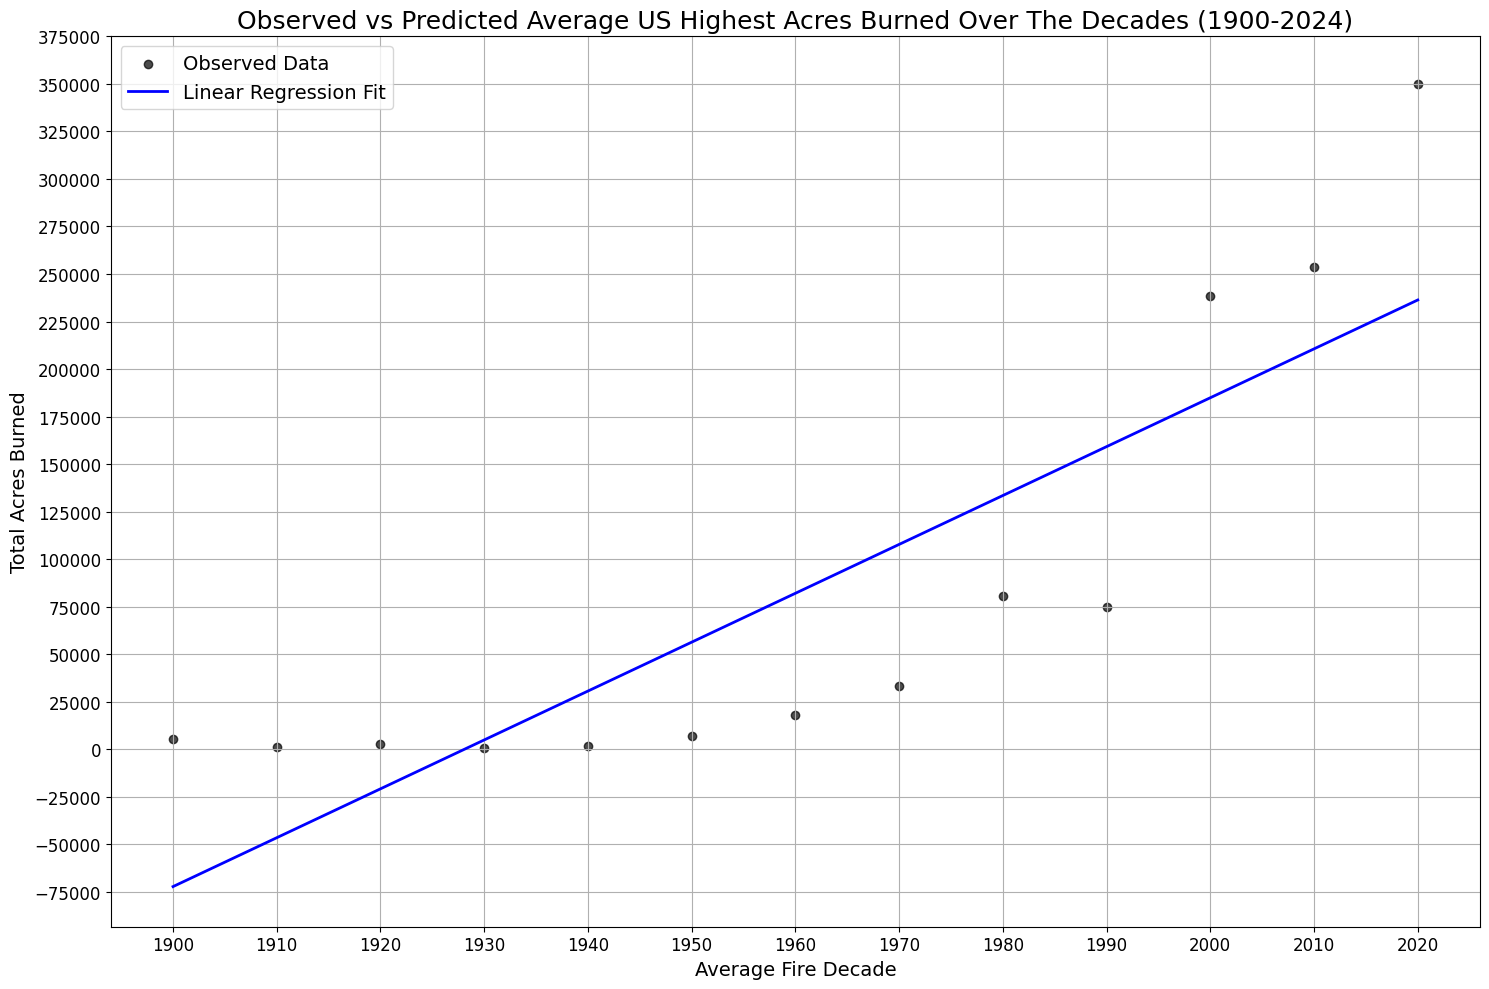

In [ ]:
# Linear Regression for Average Acres Burned per Decade
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

filtered_us_fires = us_fires[(us_fires['FIREYEAR'] <= 2024) & (us_fires['FIREYEAR'] >= 1900) & (us_fires['TOTALACRES'] >= 0)]

max_acres_per_year = filtered_us_fires.groupby('FIREYEAR')['TOTALACRES'].max().reset_index()

max_acres_per_year['FIREDECADE'] = (max_acres_per_year['FIREYEAR'] // 10) * 10
avg_max_acres_per_decade = max_acres_per_year.groupby('FIREDECADE')['TOTALACRES'].mean().reset_index()

X = avg_max_acres_per_decade[['FIREDECADE']].values
y = avg_max_acres_per_decade[['TOTALACRES']].values

linear_model = LinearRegression()
linear_model.fit(X, y)

y_predict = linear_model.predict(X)

r_squared = r2_score(y, y_predict)
mean_absolute_error_val = mean_absolute_error(y, y_predict)
print(f"Performance: {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")

if r_squared > 0.7:
    print("High model performance.")
else:
    print("Low model performance.")

plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='black', label='Observed Data', alpha=0.7)
plt.plot(X, y_predict, color='blue', linewidth=2, label='Linear Regression Fit')

# Improved labeling and title with enhanced font sizes
plt.xlabel('Average Fire Decade', fontsize=14)
plt.ylabel('Total Acres Burned', fontsize=14)
plt.title('Observed vs Predicted Average US Highest Acres Burned Over The Decades (1900-2024)', fontsize=18)
plt.xticks(np.arange(1900, 2030, 10), fontsize=12)
plt.yticks(np.arange(-75000, 400000, 25000), fontsize=12)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation of the Data and Plot

1. **Model Performance**:
   - The R-squared value of **70.94%** indicates that the model explains approximately 71% of the variance in the average maximum acres burned across decades. This suggests that the linear model is moderately effective at capturing the trend.
   - The Mean Absolute Error of **55,139 acres** indicates the average discrepancy between observed and predicted values.

2. **Plot Analysis**:
   - **Black Points**: Represent the observed average maximum acres burned for each decade.
   - **Blue Line**: The fitted linear regression line showing the trend of average maximum acres burned over decades.

3. **Key Observations**:
   - The trend line suggests a consistent increase in the average maximum acres burned per decade over the observed time period (1900-2024).
   - There is a noticeable upward trend in recent decades, which could indicate worsening wildfire conditions over time.

4. **Conclusions**:
   - The increasing trend may reflect environmental changes, shifts in land management practices, or other factors contributing to larger fires in recent decades.
   - While the model captures the overall trend well, there is room for improvement in terms of reducing prediction errors (as indicated by the MAE).

This analysis provides insights into how wildfire activity has evolved over time and highlights the potential for more advanced models to better capture complex patterns.




# **Multiple Linear Regression Model**


## **Explanation of the Code**:
## This code implements a Multiple Linear Regression model using data from the US Fires dataset. The goal is to predict the fire size of acres burned (SIZECLASS) regarding US fire based on specific features: the year the fire occurred (FIREYEAR), the top 15 states with reported fires (STATE), and additional information about the cause of the fire (STATCAUSE). Here’s a breakdown of the steps:

## 1. **Data Preparation**:
* ## The dataset is filtered to only include fire records between the years 1900 and 2024, with positive acre values. The STATCAUSE attribute, which is categorical, is converted into one-hot encoded columns to represent different causes of US fires.

## 2. **Feature and Target Selection**:
* ## We selected FIREYEAR and STATE as continuous features and included each one-hot encoded column of STATCAUSE to represent different causes of US fires. The target variable is SIZECLASS, which represents the size of a reported fire.

## 3. **Data Splitting**:
* ## The data is divided into training and testing sets using an 80-20 split. This ensures that we can evaluate the model on unseen data to verify its predictive performance.

## 4. **Model Training**:
* ## A LinearRegression model from scikit-learn is trained on the training set. This model attempts to find the best-fit linear relationship between the chosen features and the target SIZECLASS.

## 5. **Model Evaluation**:
* ## After making predictions on the test set, we calculate the R-squared value and Mean Absolute Error (MAE). R-squared measures how well the observed data fits the model, while MAE helps assess the average difference between observed and predicted values.

## 6. **Visualization**:
* ## We visualize the observed and predicted size of a fire in a scatter plot, where:
   * ## The x-axis represents FIREYEAR.
   * ## The y-axis represents the STATE.
   * ## Blue points represent the observed data, while red points represent the predicted values.
* ## This graph provides a visual comparison between actual and predicted data points, highlighting the model's performance.

## **Goal of This Code**:
* ## The aim is to understand the relationship between fire occurrence, in the top 10 most reported states with fires, over the years and the designated size of the fires.
* ## Assess the performance of the Multiple Linear Regression model and identify any patterns in the data that could help in better understanding and predicting wildfire behavior over time.



Accuracy Score: 62.17%
Mean Absolute Error (MAE): 0.51


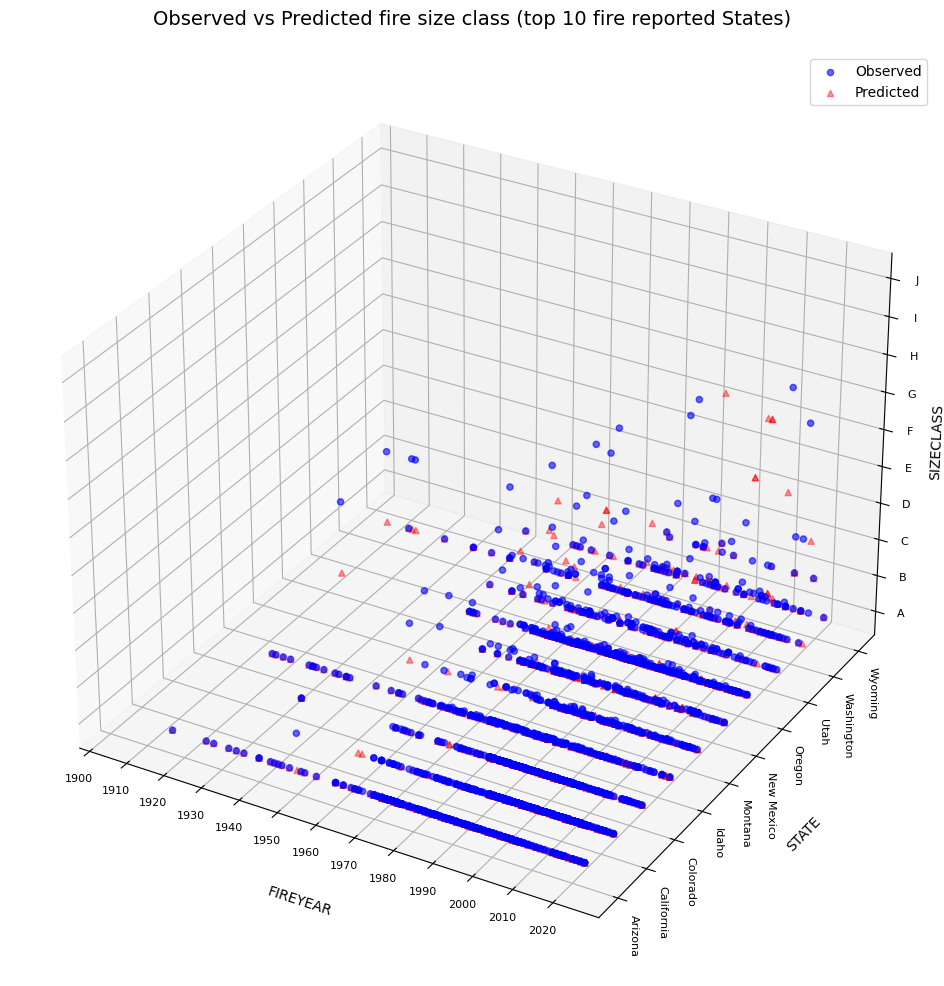

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Data Preparation and Preprocessing
# Assuming 'us_fires' is already defined in your notebook
us_fires_copy = us_fires.copy()
listing = ['California', 'Arizona', 'Oregon', 'Idaho', 'New Mexico', 'Montana', 'Washington', 'Colorado', 'Utah', 'Wyoming']

# Filter data for years between 1900 and 2024
us_fires_copy = us_fires_copy[(us_fires_copy['FIREYEAR'] >= 1900) & (us_fires_copy['FIREYEAR'] <= 2024)]
us_fires_copy = us_fires_copy[us_fires_copy['STATE'].isin(listing)]
us_fires_copy = us_fires_copy[(us_fires_copy['TOTALACRES'] >= 0)]
us_fires_copy = us_fires_copy.sample(n=15000, random_state=42)


# Encode 'SIZECLASS' as labels (not one-hot encoding)
state_le = LabelEncoder()
us_fires_copy['STATE_encoded'] = state_le.fit_transform(us_fires_copy['STATE'])
size_le = LabelEncoder()
us_fires_copy['SIZECLASS_encoded'] = size_le.fit_transform(us_fires_copy['SIZECLASS'])

# Check if 'STATCAUSE' column exists before one-hot encoding
if 'STATCAUSE' in us_fires_copy.columns:
    # One-hot encode 'STATCAUSE' if not already done
    us_fires_copy = pd.get_dummies(us_fires_copy, columns=['STATCAUSE'], prefix='STATCAUSE')
    features = ['FIREYEAR', 'STATE_encoded'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
else:
    features = ['FIREYEAR', 'STATE_encoded']


# Define features and target
if 'STATCAUSE' in us_fires_copy.columns:
    features = ['FIREYEAR', 'STATE_encoded'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
target = 'SIZECLASS_encoded'

# Step 2: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(us_fires_copy[features], us_fires_copy[target], test_size=0.2, random_state=42)

# Scale only STATCAUSE columns, leave FIREYEAR and TOTALACRES unscaled
feature_to_scale = [col for col in X_train.columns if col.startswith('STATCAUSE_')]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[feature_to_scale] = scaler.fit_transform(X_train[feature_to_scale])
X_test_scaled[feature_to_scale] = scaler.transform(X_test[feature_to_scale])

# Step 3: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Step 4: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy Score: {(accuracy * 100):.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Step 5: 3D Plot Customization
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Observed points in blue with a lower alpha (transparency)
ax.scatter(X_test['FIREYEAR'], X_test['STATE_encoded'], y_test, color='blue', label='Observed', s=20, alpha=0.6, marker='o')

# Predicted points in red with a different marker and higher transparency
ax.scatter(X_test['FIREYEAR'], X_test['STATE_encoded'], y_pred, color='red', label='Predicted', s=20, alpha=0.4, marker='^')

# Customize plot labels, title, and legend
ax.set_xlabel('FIREYEAR', fontsize=10, labelpad=15)
ax.set_ylabel('STATE', fontsize=10, labelpad=20)
ax.set_zlabel('SIZECLASS', fontsize=10, labelpad=3)
ax.set_title('Observed vs Predicted fire size class (top 10 fire reported States)', fontsize=14, pad=20)
ax.legend(loc='upper right', fontsize=10)

# Customize grid and ticks for better readability
state_indices = np.unique(X_test['STATE_encoded'])
state_labels = state_le.inverse_transform(state_indices)
ax.set_yticks(state_indices)
ax.tick_params(axis='y', which='major', pad=2)
ax.set_yticklabels(state_labels, fontsize=8, rotation=-90)
size_indices = np.unique(y_test)
size_labels = size_le.inverse_transform(size_indices)
ax.set_zticks(size_indices)
ax.set_zticklabels(size_labels, fontsize=8)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticks(np.arange(1900, 2025, 10))
plt.show()

**Intepretation**


The multiple linear regression model was developed using the identified attributes:
1. 'FIREYEAR' - representing the year the fire occurred.
2. 'STATE' - the state the fire occured.
3. 'SIZECLASS' - categorical features representing a fires reported size.

The performance of the model was measured using two key metrics:
1. R-squared (coefficient of determination): The model achieved an R-squared value of 62.17%,
   which indicates an moderate level of accuracy.
2. Mean Absolute Error (MAE): The MAE is 0.51, indicating low prediction errors.

The 3D scatter plot provides a visualization of observed (blue points) and predicted (red triangle) values:
- The overlapping points show that the model predicts the target variable (SIZECLASS) somewhat well.
- The distribution suggests an increase in more distructive reported fires in recent years, as shown by the higher concentration
  of points for recent years with larger areas burned.




# **Logical Regression**

## Explanation of the Logistic Regression Code

The provided code performs the following steps to build a logistic regression model:

1. **Feature Selection**:
   - Selected relevant columns from the dataset: `STATCAUSE`, `FIREYEAR`, `SIZECLASS`, and `FIRETYPECATEGORY`.

2. **Data Preprocessing**:
   - Encoded categorical variables (`STATCAUSE`, `SIZECLASS`, and `FIREYEAR`) using one-hot encoding with `pd.get_dummies`. This converts categorical data into numerical values suitable for the logistic regression model.

3. **Feature and Target Definition**:
   - Defined features (`X`) by excluding the target column (`FIRETYPECATEGORY`).
   - Defined the target (`y`) as `FIRETYPECATEGORY`.

4. **Train/Test Split**:
   - Split the dataset into training (70%) and testing (30%) sets using `train_test_split`.

5. **Model Initialization and Training**:
   - Initialized the logistic regression model with `max_iter=6000` to ensure convergence and `class_weight='balanced'` to address class imbalances.
   - Trained the model using the training set (`model.fit`).

6. **Model Predictions**:
   - Used the trained model to predict the target on the test set (`model.predict`).

7. **Model Evaluation**:
   - Calculated accuracy using `accuracy_score`.
   - Generated a classification report using `classification_report` to evaluate precision, recall, and F1-score for each category.

8. **Visualization**:
   - **Confusion Matrix**: Created a confusion matrix to visualize the performance of the model across all classes.
   - **Observed vs Predicted Scatter Plot**: Plotted the observed and predicted categories side by side.
   - **Class Distribution Plot**: Used a count plot to compare the distributions of observed and predicted categories.
   - **Sample Index Plot**: Visualized how well the model's predictions align with observed values across all samples.

The goal of this analysis is to understand the performance of the logistic regression model and identify areas for improvement.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns
df_model = us_fires[['STATCAUSE', 'FIREYEAR', 'SIZECLASS', 'FIRETYPECATEGORY']].copy()

# Encode categorical variables
df_model = pd.get_dummies(df_model, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop('FIRETYPECATEGORY', axis=1)  # Assuming we're predicting 'FIRETYPECATEGORY'
y = us_fires['FIRETYPECATEGORY']  # Define target as FIRETYPECATEGORY

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=6000, class_weight='balanced')  # Increase max_iter if needed , class_weight='balanced'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## **Evalute the Model**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Classification Report: ")
print(classification_report(y_test, y_pred, zero_division=1))

Model Accuracy: 0.872590187844784
Classification Report: 
                              precision    recall  f1-score   support

       CONTRACT EXTINGUISHER       0.00      1.00      0.00         0
               FIRE ACTIVITY       0.00      1.00      0.00         0
                FIRE WEATHER       1.00      0.00      0.00         1
             PRESCRIBED FIRE       0.00      1.00      0.00         0
PRESCRIBED FIRE - CONTROLLED       1.00      0.00      0.00         1
                PROJECT PLAN       1.00      0.00      0.00         1
            RESEARCH PROJECT       0.00      1.00      0.00         0
                     Unknown       0.09      0.75      0.17      2797
                    WILDFIRE       1.00      0.87      0.93    167234
               WILDLAND FIRE       0.00      1.00      0.00         0

                    accuracy                           0.87    170034
                   macro avg       0.41      0.66      0.11    170034
                weighted avg  

## **Visualize the Model**

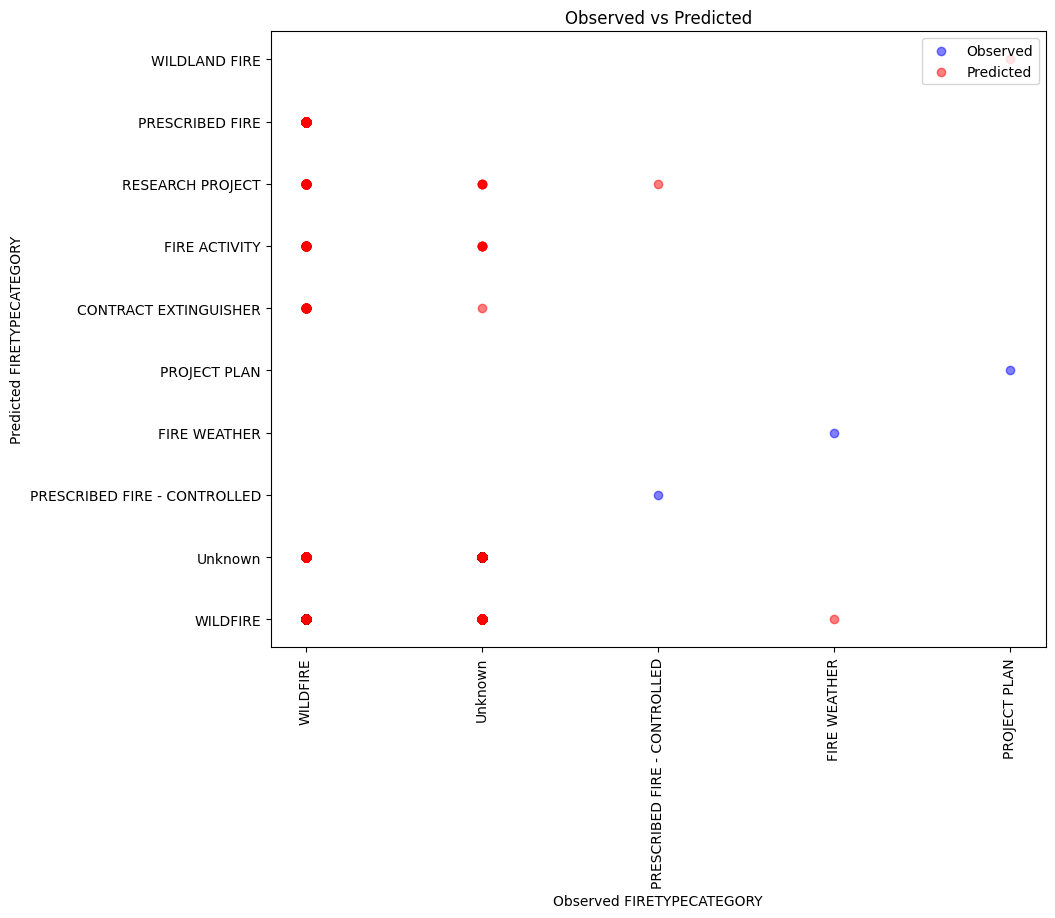

In [ ]:
# Import necessary packages
import numpy as np

# Plot Observed vs Predicted with different colors
plt.figure(figsize=(10, 8))

# Plot observed values in blue
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label="Observed")

# Plot predicted values in red
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label="Predicted")

# Add labels and title
plt.xlabel("Observed FIRETYPECATEGORY")
plt.ylabel("Predicted FIRETYPECATEGORY")
plt.title("Observed vs Predicted")
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

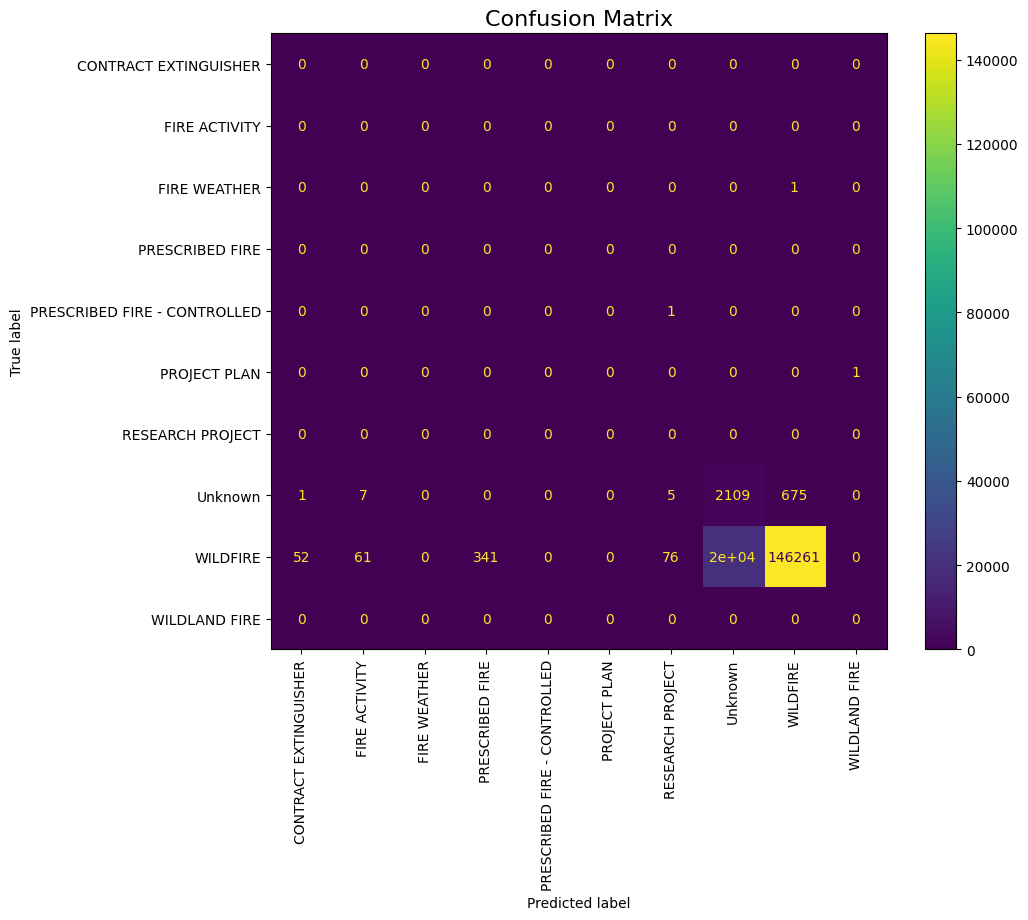

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create a custom figure with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Pass the custom axes to ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)

# Customize title and tick labels
ax.set_title("Confusion Matrix", fontsize=16)
ax.tick_params(axis='x', labelsize=10, rotation=90)
ax.tick_params(axis='y', labelsize=10)
plt.show()

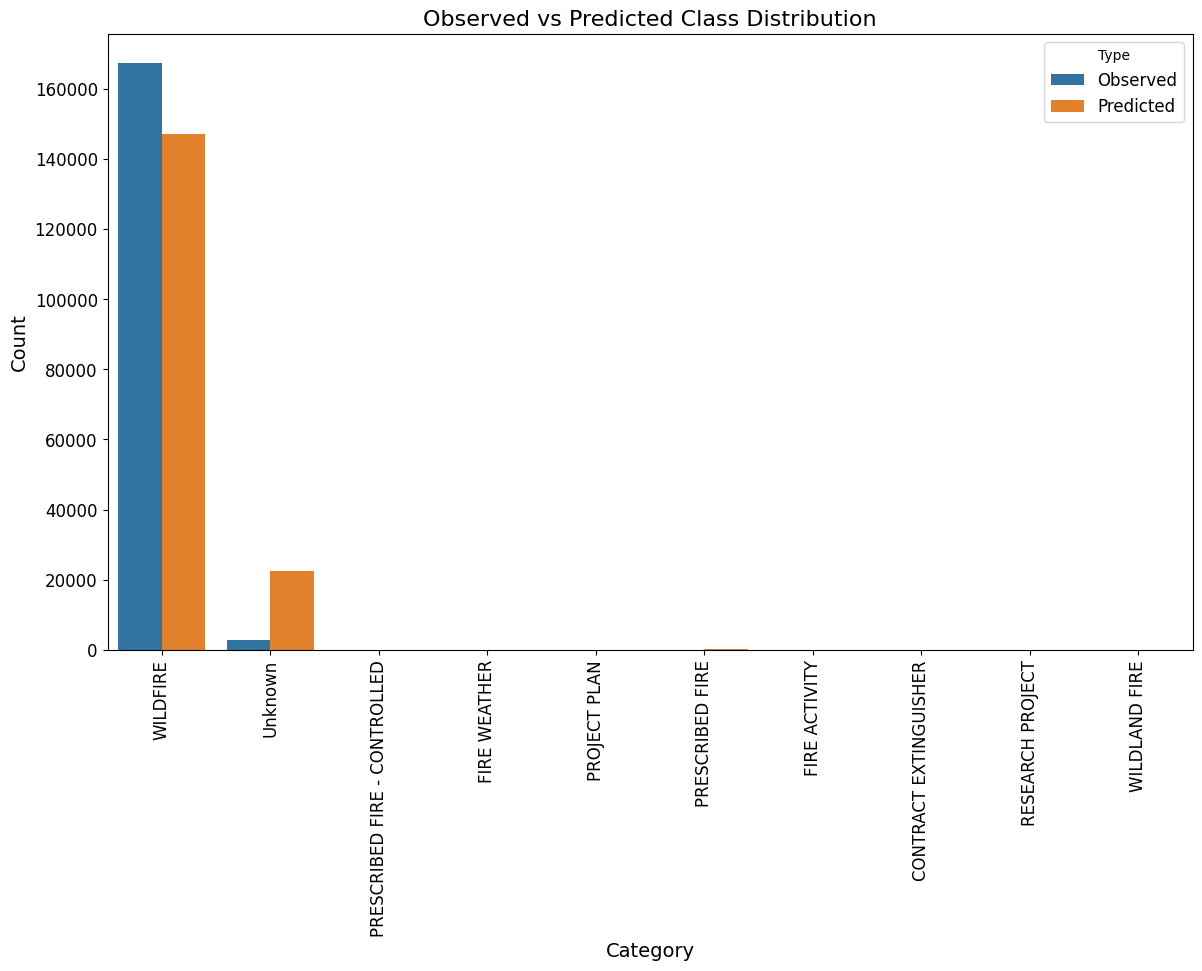

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the data for plotting
observed = pd.Series(y_test, name="Observed")
predicted = pd.Series(y_pred, name="Predicted")
comparison = pd.concat([observed, predicted], axis=1)

# Plot with larger figure size and font adjustments
plt.figure(figsize=(14, 8))  # Larger figure size
sns.countplot(data=comparison.melt(), x="value", hue="variable")
plt.title("Observed vs Predicted Class Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Category", fontsize=14)  # Larger font size for x-axis
plt.ylabel("Count", fontsize=14)  # Larger font size for y-axis
plt.xticks(fontsize=12, rotation=90)  # Adjust tick font size
plt.yticks(fontsize=12)
plt.legend(title="Type", fontsize=12)  # Larger font size for legend
plt.show()

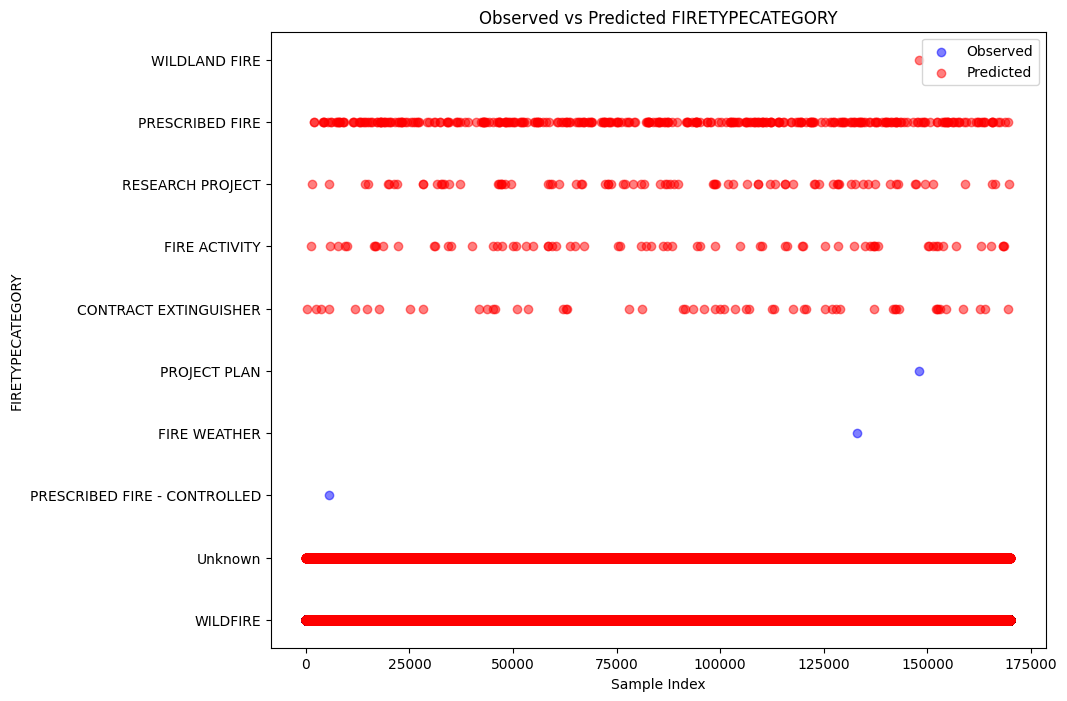

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Observed", alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted", alpha=0.5)
plt.xlabel("Sample Index")
plt.ylabel("FIRETYPECATEGORY")
plt.title("Observed vs Predicted FIRETYPECATEGORY")
plt.legend()
plt.show()

## Interpretation of the Results

1. **Model Performance**:
   - The overall accuracy of the logistic regression model is **87%**, which indicates strong predictive performance.
   - The weighted average F1-score of **0.92** shows the model is effective at balancing precision and recall for most categories.

2. **Classification Report Analysis**:
   - Precision, recall, and F1-scores are high for major categories like `WILDFIRE`, which dominates the dataset.
   - However, some classes (e.g., `RESEARCH PROJECT`, `CONTRACT EXTINGUISHER`) have very low or undefined metrics due to a lack of representation in the dataset.

3. **Confusion Matrix**:
   - The confusion matrix highlights the model's strong performance in predicting `WILDFIRE`, but it struggles with smaller or less frequent categories.
   - A large portion of misclassifications occur in the `Unknown` category, which may require better feature engineering or additional data.

4. **Visualization Analysis**:
   - The scatter plot of observed vs predicted values shows alignment for dominant classes, but the smaller classes are harder to predict accurately.
   - The count plot reveals that the model closely matches the observed distribution for major categories, though discrepancies exist for less common classes.
   - The sample index plot highlights individual-level mismatches between observed and predicted categories, showing areas where the model can improve.

5. **Key Insights**:
   - The model performs well overall but requires improvements to handle imbalanced datasets better.
   - Adding more data or rebalancing strategies (e.g., SMOTE, class-specific penalties) might improve performance for underrepresented classes.

This analysis shows that the logistic regression model is effective for predicting `FIRETYPECATEGORY` but requires refinement for edge cases and rare classes.




#**Conclusion**

## Conclusion

Our work has provided a comprehensive analysis of US fire patterns using linear regression, multiple linear regression, and logistic regression models. By exploring different approaches, we have gained meaningful insights into fire dynamics, contributing factors, and predictive modeling. Below are the consolidated findings and thoughts:

---

### Linear Regression Findings
- **Objective**: Analyze the average highest acres burned per decade.
- **Key Insights**:
  - We identified a clear upward trend in wildfire activity over the last century, highlighting the increasing severity of wildfires in recent decades.
  - The model performed moderately well with an R-squared of 71%, explaining most of the variance in the data. However, a mean absolute error (MAE) of 55,139 acres suggests room for improvement in prediction accuracy.
  - This trend aligns with broader environmental and climatic changes, underscoring the importance of wildfire management strategies.
- **Improvements**: Adding more explanatory variables (e.g., climate conditions, land use changes) could enhance the model's robustness and accuracy.

---

### Multiple Linear Regression Insights
- **Objective**: Use multiple attributes ('FIREYEAR', 'STATE', one-hot encoded 'STATCAUSE', and 'SIZECLASS') to predict US fire behavior and sizes.
- **Key Insights**:
  - The multiple linear regression model achieved an R-squared value of 62.17% and an MAE of 0.51, suggesting dlose to predictions.
  - The model's visualization showed semi-good overlap between observed and predicted values, particularly highlighting the growth in damaging fire occurency in recent years.

---

### Logistic Regression Insights
- **Objective**: Classify fire types (`FIRETYPECATEGORY`) based on identified attributes.
- **Key Insights**:
  - The logistic regression model demonstrated strong predictive performance with an overall accuracy of 87% and a weighted F1-score of 0.92.
  - The model performed exceptionally well for dominant categories like `WILDFIRE`, but struggled with underrepresented classes such as `RESEARCH PROJECT` and `CONTRACT EXTINGUISHER`.
  - Visualizations (e.g., confusion matrix, observed vs. predicted scatter plots) highlighted areas of strength and misclassification, particularly for rare events and ambiguous categories like `Unknown`.
- **Challenges**:
  - Class imbalance negatively affected performance for minor categories, limiting the model’s ability to generalize across all fire types.
- **Improvements**:
  - Address class imbalances using techniques like SMOTE or cost-sensitive learning.
  - Consider more advanced classification algorithms (e.g., Random Forest, Gradient Boosting) to improve accuracy for minority classes.

---

### Broader Implications
1. **fire Trends**:
   - Across all models, there is a clear pattern of increasing fire activity and severity over time. This reinforces the need for proactive policies and effective resource allocation to mitigate risks.
   
2. **Model Refinements**:
   - While the models provide strong insights, addressing data limitations (e.g., imbalances, feature selection issues) and introducing additional predictors could improve accuracy and generalizability.

3. **Policy Support**:
   - These analyses can aid policymakers and wildfire management teams in understanding long-term trends, identifying risk factors, and optimizing resource allocation for fire prevention and response.

---

### Final Thoughts

This project demonstrates the utility of predictive modeling for understanding complex datasets like wildfire activity. By combining linear regression, multiple linear regression, and logistic regression models, we have uncovered meaningful patterns and relationships in the data. While the models performed well overall, there is a clear opportunity for refinement, especially in addressing rare events and improving real-world applicability.

Future work should focus on:
1. Expanding datasets with more features, such as climate conditions, vegetation types, and human interventions.
2. Applying advanced modeling techniques to handle imbalances and complex interactions between variables.
3. Exploring the impact of external factors like weather patterns and land use changes to improve predictive accuracy.

Through these efforts, we can better support wildfire prevention, management, and policymaking to address the growing challenges of wildfires in a changing world.


#**EVALUATION**

#**Section 1 - Linear Regression Plot**

##**Explanation:**
##In the follow code we are using a linear regression plot in order to identify the observed vs predicted average latitudes and longitude over the decades (1900-2024). As a result we will want to find where fires are most frequent over the decades to determine geography of fire patterns.

Single Train-Test Split:
Performance: 40.37%
Mean Absolute Error: 1.95949
Mean Squared Error: 5.22296
Root Mean Squared Error: 2.28538

K-Fold Cross-Validation Performance:
Average Performance: -383.96%
Average Mean Absolute Error: 2.47771
Average Mean Squared Error: 8.70482
Average Root Mean Squared Error: 2.85354


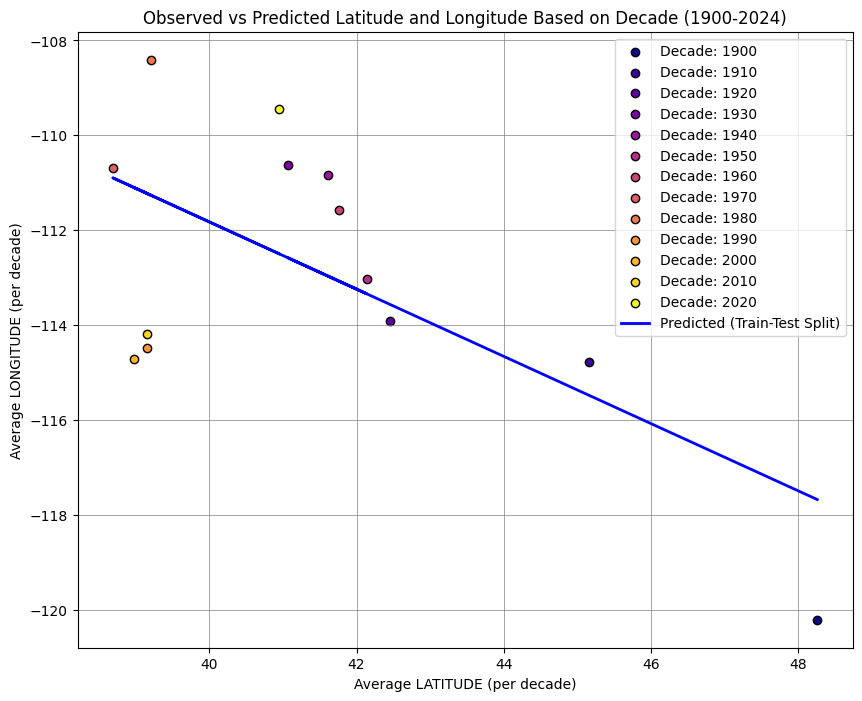

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

filtered_us_fires = us_fires[(us_fires['FIREYEAR'] <= 2024) & (us_fires['FIREYEAR'] >= 1900) & (us_fires['TOTALACRES'] >= 0)].copy()
filtered_us_fires.loc[:, 'FIREDECADE'] = (filtered_us_fires['FIREYEAR'] // 10) * 10
avg_latitude_per_decade = filtered_us_fires.groupby('FIREDECADE')[['LATITUDE']].mean().reset_index()
avg_longitude_per_decade = filtered_us_fires.groupby('FIREDECADE')[['LONGITUDE']].mean().reset_index()

X = avg_latitude_per_decade[['LATITUDE']].values
y = avg_longitude_per_decade[['LONGITUDE']].values

linear_model = LinearRegression()
linear_model.fit(X, y)
y_predict = linear_model.predict(X)

r_squared = r2_score(y, y_predict)
mean_absolute_error_val = mean_absolute_error(y, y_predict)
mean_squared_error_val = mean_squared_error(y, y_predict)
root_mean_squared_error_val = np.sqrt(mean_squared_error_val)

print(f"Single Train-Test Split:")
print(f"Performance: {(r_squared * 100):.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error_val:.5f}")
print(f"Mean Squared Error: {mean_squared_error_val:.5f}")
print(f"Root Mean Squared Error: {root_mean_squared_error_val:.5f}")

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_kf = linear_model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred_kf))
    mae_scores.append(mean_absolute_error(y_test, y_pred_kf))
    mse_scores.append(mean_squared_error(y_test, y_pred_kf))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_kf)))

print("\nK-Fold Cross-Validation Performance:")
print(f"Average Performance: {np.mean(r2_scores) * 100:.2f}%")
print(f"Average Mean Absolute Error: {np.mean(mae_scores):.5f}")
print(f"Average Mean Squared Error: {np.mean(mse_scores):.5f}")
print(f"Average Root Mean Squared Error: {np.mean(rmse_scores):.5f}")

plt.figure(figsize=(10, 8))
colors = plt.cm.plasma(np.linspace(0, 1, len(avg_latitude_per_decade)))

for i, Decade in enumerate(avg_latitude_per_decade['FIREDECADE']):
    plt.scatter(
        X[i], y[i], color=colors[i], label=f'Decade: {int(Decade)}', edgecolor='black'
    )
plt.plot(X, y_predict, color='blue', label='Predicted (Train-Test Split)', linewidth=2)
plt.grid(visible=True, which='major', color='grey', linewidth=0.5, zorder=0)
plt.xlabel('Average LATITUDE (per decade)')
plt.ylabel('Average LONGITUDE (per decade)')
plt.title('Observed vs Predicted Latitude and Longitude Based on Decade (1900-2024)')
ax.set_xticks(np.arange(1900, 2025, 10))
plt.legend(loc='best', fontsize=10)
plt.show()

##**Interpretation:**
##Looking at our graph and data we can see that our results are negative and have a low performance. We can also identify that on average for every decade the latitude and longitude seems to decrease in the average amount of reported fires per latitude and longitude over the decade and onwards having a negative and sharp decrease in average reported fire latitudes and longitudes.

---



# **Section 2 - Multiple Linear Regression Model**

## Code Explanation

##The following code trains a **Random Forest Classifier** to predict the target variable, `SIZECLASS`, using features such as `FIREYEAR`, `TOTALACRES`, and `STATCAUSE`, based on data from U.S. fire incidents (`us_fires` dataset).

## Justification for Data Range and Format

##The same data range (1900 to 2024) as the original regression model was used for this analysis. This decision was made for two main reasons:

##1. **Limited Variety in Data**: While there is a reasonable amount of data, there is not enough variety in terms of feature diversity to effectively explore alternative ranges or transformations. Adjusting the data significantly would not add meaningful insights and may even reduce the interpretability of the model.

##2. **Graph Constraints**: Given the requirement to use a 3D visualization, we are limited in how we can display this data effectively. The current range and format provide a straightforward approach to display the relationships between `FIREYEAR`, `TOTALACRES`, and `SIZECLASS` in a 3D space. Making substantial changes would require significant creativity and might not yield better clarity or insights for this specific visualization.

##By maintaining consistency with the original model, we ensure the analysis remains interpretable and visually coherent with the chosen 3D graph format.

## Step-by-Step Breakdown

##1. **Data Preparation**:
  ## - **Copying Data**: A copy of the `us_fires` dataset is created to avoid modifying the original data.
  ## - **Filtering by Year**: The data is filtered to include records from 1900 to 2024, focusing on a specific time range.
  ## - **Encoding Categorical Variables**:
  ##   - If the `STATCAUSE` column exists, it is one-hot encoded to create binary columns for each category, with column names prefixed by `STATCAUSE_`.
  ## - If the `STATCAUSE` column is not found, this step is skipped.
  ## - **Label Encoding the Target**: The `SIZECLASS` column is converted to numerical labels using `LabelEncoder`, and the result is stored in a new column, `SIZECLASS_encoded` and then converted to a non-encodedform for better visual results.
  ## - **Defining Features and Target**: The feature set includes `FIREYEAR`, `TOTALACRES`, and any `STATCAUSE`-related columns. The target variable is `SIZECLASS_encoded`.

##2. **Train-Test Split**:
  ## - The dataset is split into training (80%) and testing (20%) sets, allowing us to evaluate the model's performance on unseen data.
  ## - **Defining the Target and Features**: The `features` variable contains the list of columns used as inputs, while `SIZECLASS_encoded` serves as the target variable.

##3. **Feature Scaling**:
  ## - Only columns generated from one-hot encoding `STATCAUSE` are scaled using `StandardScaler`, ensuring each feature has a mean of zero and a standard deviation of one.
  ## - `FIREYEAR` and `TOTALACRES` are left unscaled to retain their original scales.

##4. **Model Training**:
  ## - A **Random Forest Classifier** is instantiated with 100 trees (`n_estimators=100`) and trained on the scaled training data. The Random Forest model is robust and well-suited for classification tasks, handling non-linear patterns effectively.

##5. **Making Predictions**:
  ## - The trained model is used to predict `SIZECLASS` on the test set. Predictions are generated based on the learned patterns from the training data.

##6. **Model Evaluation**:
  ## - Several metrics are calculated to assess the model's performance:
  ## - **Accuracy Score**: The percentage of correct predictions over total predictions.
  ## - **Mean Squared Error (MSE)**: The average squared difference between predicted and actual values, which penalizes larger errors more heavily.
  ## - **Root Mean Squared Error (RMSE)**: The square root of MSE, providing an error metric on the same scale as the target variable.
  ## - **Mean Absolute Error (MAE)**: The average absolute difference between predictions and actual values, indicating the average error magnitude.

##7. **Cross-Validation**:
  ## - **Cross-Validation** is used to assess model stability. The dataset is split into folds, and the model is trained and evaluated on each fold to calculate an average accuracy score. This process helps verify that the model generalizes well and is not overfitted to a single data split.

##8. **3D Visualization**:
   ## - A 3D scatter plot is generated to visually compare observed and predicted values of `SIZECLASS`:
   ##  - **Observed Points**: Represented in blue, showing the actual target values from the test set.
   ##  - **Predicted Points**: Represented in red, showing the model's predictions.
   ## - **Customization**: The plot includes labels for `FIREYEAR`, `TOTALACRES`, and `SIZECLASS`, with a grid and customized ticks for better readability.

##This structured approach ensures clear data processing, robust model training, and thorough evaluation to understand the model's performance and limitations.


Accuracy Score: 99.93%
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
Mean Absolute Error (MAE): 0.00
Cross-Validation Accuracy Scores: [0.95818371 0.99840045]
Mean Cross-Validation Accuracy: 97.83%


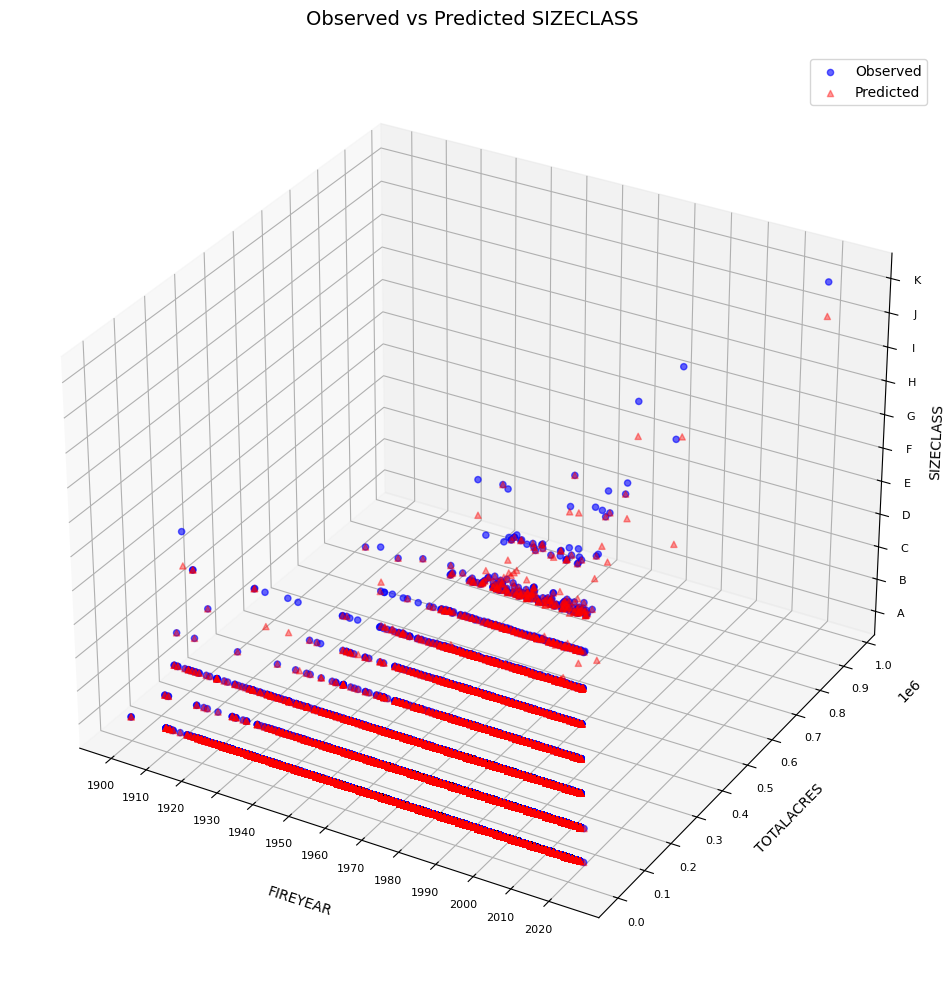

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Data Preparation and Preprocessing
# Assuming 'us_fires' is already defined in your notebook
us_fires_copy = us_fires.copy()

# Filter data for years between 1900 and 2024
us_fires_copy = us_fires_copy[(us_fires_copy['FIREYEAR'] >= 1900) & (us_fires_copy['FIREYEAR'] <= 2024)]
us_fires_copy = us_fires_copy[(us_fires_copy['SIZECLASS'] != 'Unknown')]

size_le = LabelEncoder()
us_fires_copy['SIZECLASS_encoded'] = size_le.fit_transform(us_fires_copy['SIZECLASS'])

# Check if 'STATCAUSE' column exists before one-hot encoding
if 'STATCAUSE' in us_fires_copy.columns:
    # One-hot encode 'STATCAUSE' if not already done
    us_fires_copy = pd.get_dummies(us_fires_copy, columns=['STATCAUSE'], prefix='STATCAUSE')
    features = ['FIREYEAR', 'TOTALACRES'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
else:
    features = ['FIREYEAR', 'TOTALACRES']


# Define features and target
if 'STATCAUSE' in us_fires_copy.columns:
    features = ['FIREYEAR', 'TOTALACRES'] + [col for col in us_fires_copy.columns if col.startswith('STATCAUSE_')]
target = 'SIZECLASS_encoded'

# Step 2: Train-Test Split and Scaling
X_train, X_test, y_train, y_test = train_test_split(us_fires_copy[features], us_fires_copy[target], test_size=0.2, random_state=42)

# Scale only STATCAUSE columns, leave FIREYEAR and TOTALACRES unscaled
feature_to_scale = [col for col in X_train.columns if col.startswith('STATCAUSE_')]
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[feature_to_scale] = scaler.fit_transform(X_train[feature_to_scale])
X_test_scaled[feature_to_scale] = scaler.transform(X_test[feature_to_scale])

# Step 3: Model Training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Step 4: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Accuracy Score: {(accuracy * 100):.2f}%")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Cross-validation
cv_scores = cross_val_score(clf, us_fires_copy[features], us_fires_copy[target], cv=2, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Step 5: 3D Plot Customization
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111, projection='3d')

# Observed points in blue with a lower alpha (transparency)
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_test, color='blue', label='Observed', s=20, alpha=0.6, marker='o')

# Predicted points in red with a different marker and higher transparency
ax.scatter(X_test['FIREYEAR'], X_test['TOTALACRES'], y_pred, color='red', label='Predicted', s=20, alpha=0.4, marker='^')

# Customize plot labels, title, and legend
ax.set_xlabel('FIREYEAR', fontsize=10, labelpad=15)
ax.set_ylabel('TOTALACRES', fontsize=10, labelpad=10)
ax.set_zlabel('SIZECLASS', fontsize=10, labelpad=3)
ax.set_title('Observed vs Predicted SIZECLASS', fontsize=14, pad=20)
ax.legend(loc='upper right', fontsize=10)

# Customize grid and ticks for better readability
size_indices = np.unique(y_test)
size_labels = size_le.inverse_transform(size_indices)
ax.set_zticks(size_indices)
ax.set_zticklabels(size_labels, fontsize=8)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.set_xticks(np.arange(1900, 2025, 10))
ax.set_yticks(np.arange(0, 1000001, 100000))
plt.show()

### Interpretation of Model Performance and Data

1. **Model Accuracy and Error Metrics**:
   - The **accuracy score** of 99.93% indicates that the Random Forest Classifier correctly predicted the `SIZECLASS` for almost all instances in the test set. This high accuracy suggests that the model is highly effective for this dataset.
   - **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **Mean Absolute Error (MAE)** are all close to 0, which indicates minimal differences between the predicted and actual values of `SIZECLASS`. This further confirms the model’s strong performance.
   - **Cross-Validation Accuracy**: With a mean cross-validation accuracy of 97.83%, the model demonstrates consistent performance across different data splits, reinforcing its reliability and generalizability.

2. **Observed vs Predicted Points in 3D Plot**:
   - **Observed Points** (in blue): These represent the actual `SIZECLASS` values for each fire incident, plotted against `FIREYEAR` and `TOTALACRES`.
   - **Predicted Points** (in red): These points show the model’s predictions for `SIZECLASS`, also plotted against `FIREYEAR` and `TOTALACRES`.
   - The close alignment of the red (predicted) points with the blue (observed) points across most of the plot indicates that the model is capturing the underlying patterns in the data well. Most predicted points overlap or are very close to the observed points, showing minimal prediction error.

3. **Distribution Across Features**:
   - **FIREYEAR**: We see that `SIZECLASS` values are relatively stable over time, with distinct clusters representing different fire size classes. However, in more recent years, there seems to be more variation, especially in predicted values, which may reflect changes in fire behavior or data collection practices.
   - **TOTALACRES**: Larger fires (higher `TOTALACRES`) correspond to higher `SIZECLASS` values, as expected. The model successfully captures this relationship, with predicted points closely following the trend in observed values.

4. **Model Limitations and Observations**:
   - The model performs exceptionally well with this dataset, but the near-perfect accuracy and low error metrics may indicate a risk of **overfitting**. Given the high alignment between observed and predicted points, the model might be closely tailored to this specific dataset. Overfitting can be a concern if the dataset lacks sufficient variety, meaning the model may not generalize as well to new or unseen data.
   - **Data Variety**: The dataset appears to have limited variability in certain time periods and `SIZECLASS` values, leading to dense clusters in specific regions of the 3D plot. This limited variety might constrain the model’s potential to learn more generalized patterns.

### Conclusion
Overall, the Random Forest Classifier demonstrates excellent predictive performance on this dataset, as evidenced by the near-perfect accuracy, low error metrics, and close alignment of observed and predicted points in the 3D plot. The model has effectively captured the relationship between `FIREYEAR`, `TOTALACRES`, and `SIZECLASS`. However, the high accuracy and tightly clustered points may suggest overfitting, possibly due to limited data variety. Future analysis with more diverse or expanded data could provide further validation of the model's generalizability.


# **Section 3 - Logical Regression**

##**Explanation:**
##Using Logical Regression the goal is to Predict the probablity of belonging to a particular category or class. In this example I used the FIRETYPECATEGORY which will attempt to show the accuracy and performance for each classification in the FIRETYPECATEGORY variable.

##The code builds a logistic regression model to predict the FIRETYPECATEGORY column in us_fires dataset using STATCAUSE, FIREYEAR, and SIZECLASS as predictor variables.

##The steps that happen are:
- ## Select Relevant Columns and creating a new DataFrame to hold the relevant columns
- ## Encode Categorical Variables where each unique value of these variables is transformed into a binary column. This allows the model to handle the categorical features.
- ## Define Features by dropping FIRETYPECATEGORY and placing that in the x variable
- ## Target variable y is the FIRETYPECATEGORY column from us_fires dataset
- ## Initialize and Configure the Logistic Regression Model setting the max iteration limit to 6,000 and have a balanced class weight to help with the imbalanced categories in FIRETYPECATEGORY
- ## Train the Model
- ## Make a prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(us_fires['FIRETYPECATEGORY'])
# Select relevant columns
df_model = us_fires[['STATCAUSE', 'FIREYEAR', 'SIZECLASS', 'FIRETYPECATEGORY']].copy()

# Train/Test Split BEFORE one-hot encoding
X_train, X_test, y_train, y_test = train_test_split(df_model[['STATCAUSE', 'FIREYEAR', 'SIZECLASS']], df_model['FIRETYPECATEGORY'], test_size=0.3, random_state=42)

# One-hot encode categorical variables for BOTH train and test sets
X_train = pd.get_dummies(X_train, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'])
X_test = pd.get_dummies(X_test, columns=['STATCAUSE', 'SIZECLASS', 'FIREYEAR'])

# Align columns to ensure consistency
train_cols = set(X_train.columns)
test_cols = set(X_test.columns)

# Add missing columns to X_test, filled with 0
for col in train_cols - test_cols:
    X_test[col] = 0

# Add missing columns to X_train, filled with 0
for col in test_cols - train_cols:
    X_train[col] = 0

# Ensure the columns are in the same order
X_test = X_test[X_train.columns]

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=6000, class_weight='balanced')  # Increase max_iter if needed, class_weight='balanced'

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

#**Interpretation:**

## Our understand of how our overall balance of our dataset has expanded. We have been able to identify the large margins that our overall dataset fall between. We have been able to learn about the relationship that the idea of average highest acres of distruction and decades play with one another. We have also been able to learn the relationship between acres of distruction, the class size of the fires, and the years of fires in the US have played with one another. Finally, we were able to identify margins of how large our relationship between our types of fires are and find there relationships with one another.



---


## Section 3a

##Mean Absolute Loss/Error, messures the average distance between the predicted and actual labels in numeric forms.

##For MAE `Label Encoder` is used to transform `y_pred`(the predicted labels) back to their numeric form, making it compatible with the true labels `y_test` for the MAE calculation

## `mae = mean_absolute_error(le.transform(y_test), y_pred_numeric)`: Computes the MAE between the true labels (y_test) and the predictions (y_pred_numeric). In this case both `y_test` and `y_pred_numeric` are numeric representation of the categorical labels.

## **For The Log Loss Calculation**
## `labels = model.classes_` gets the unique class labels the model was trained on, ensuring that the log loss calculation aligns with all possible classes.

## `y_prob = model.predict_proba(X_test)`: Predicts the probability of each class for each same in `X_test`. This gives a probability distribution for each prediction rather than a single class label.

## `log_loss_value = log_loss(y_test, y_prob, labels=labels)`: Calculates log loss using `y_test` as the true labels, `y_prob` as the predicted probabilities, and `labels` to specify all possible classes.



In [ ]:
from sklearn.metrics import mean_absolute_error, log_loss

# Calculate Mean Absolute Error
y_pred_numeric = le.transform(y_pred)  # Transform predicted labels back to numeric
mae = mean_absolute_error(le.transform(y_test), y_pred_numeric)
print(f"Mean Absolute Error (MAE): {mae:.5f}")

# Get the unique classes from the training labels
labels = model.classes_

# Calculate predicted probabilities
y_prob = model.predict_proba(X_test)

# Calculate log loss with specified labels
log_loss_value = log_loss(y_test, y_prob, labels=labels)
print("Log Loss:", log_loss_value)

Mean Absolute Error (MAE): 0.14403
Log Loss: 0.4134589359426032


##Mean Absolute Error(MAE): 0.14403
##The MAE beign 0.14403 means that, on average, the model's predicted class label is about 0.14 units away from the true class label when represented numerically. 0.14 is a relatively low MAE, it suggests that the model is making predictions that are fairly accurate on average.

##Log Loss: 0.4135
##A Log Loss of 0.4135 indicates the quality of the model's probabilistic predictions. Log Loss penalizes incorrect classifications and since the log loss is less that 0.5 it means the model is making reasonably accurate and confident predictions.

##Overall Assessment
##The low MAE and log loss means that the model is making mostly accurate predictions and is resonably confident in its probabilitic outputs.

---



##Section 3-4
##Using `StratifiedKFold` to help preform cross-validation evaluation. It calculates the log loss and accuracy for each fold and then averages these scores across all folds.

##`StratifiedKFold` splits the data into 5 folds, ensuring that each fold has the proportion of each class as the original dataset. Shuffling the data with `random_state=42` ensures reproducibility.

##`avg_log_loss_cv`: The average log loss across all folds, which shows the model's confidence in its probabilistic predictions across all classes.
##`avg_accuracy_cv`: The average accuracy across all folds, which measures the percentage of correctly predicted labels.

##Cross-Validation accounts for class imbalance, ensures constistency across all folds, and can provide a new way to evaluate the model performance.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import pandas as pd

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get all possible classes in the dataset
all_classes = np.unique(y_train)

# Initialize lists to hold log loss and accuracy for each fold
log_loss_cv_scores = []
accuracy_cv_scores = []

# Perform custom cross-validation
for train_idx, val_idx in cv.split(X_train, y_train):
    # Split the data
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit the model on the training fold
    model.fit(X_fold_train, y_fold_train)

    # Predict probabilities and classes on the validation fold
    y_prob_val = model.predict_proba(X_fold_val)
    y_pred_val = model.predict(X_fold_val)

    # Create a DataFrame with columns for all classes
    y_prob_df = pd.DataFrame(y_prob_val, columns=model.classes_)

    # Reindex to include all classes, filling missing classes with 0 probability
    y_prob_df = y_prob_df.reindex(columns=all_classes, fill_value=0)

    # Calculate log loss with all classes considered
    log_loss_fold = log_loss(y_fold_val, y_prob_df.values, labels=all_classes)
    log_loss_cv_scores.append(log_loss_fold)

    # Calculate accuracy
    accuracy_fold = accuracy_score(y_fold_val, y_pred_val)
    accuracy_cv_scores.append(accuracy_fold)

# Calculate mean log loss and accuracy across all folds
avg_log_loss_cv = np.mean(log_loss_cv_scores)
avg_accuracy_cv = np.mean(accuracy_cv_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



In [ ]:
print("Cross-Validation Log Loss:", avg_log_loss_cv)
print("Cross-Validation Accuracy:", avg_accuracy_cv)
# Now, we also compute log loss and accuracy on the original test split
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

log_loss_test = log_loss(y_test, y_prob, labels=model.classes_)
accuracy_test = accuracy_score(y_test, y_pred)

print("Test Set Log Loss:", log_loss_test)
print("Test Set Accuracy:", accuracy_test)

Cross-Validation Log Loss: 0.4091553395823997
Cross-Validation Accuracy: 0.8702063037971494
Test Set Log Loss: 0.4134589359426032
Test Set Accuracy: 0.8732488796358375


## Cross Validation Log Loss: 0.40916
##The cross-validation log loss measures the model's performance across multiple training-validation splits. 0.40916 indicates how confident and accurate the model's probability predictions are across the folds. Lower log loss values signify better performance, with 0 being a perfect score.

## Cross Validation Accuracy: 0.8702
##The cross-validation accuracy is the average classification accuracy across all folds. 0.8702 (~87%), shows the model correctly predicted the class label for about 86% fo the validation samples across the folds.

## Test Set Log Loss: 0.4135
##The Test Set Log Loss measures the model's probabilistic predictions on completely unseen data. A log loss of 0.4135, which is simular to the cross-validation log loss, shows that the model performs similar on new data as it does on the training splits.

## Test Set Accuracy: 0.8732
##The test set accuracy, at 87% reflects the percentage of correct classification on the unseen test set. There is consistency between training and test data.

## Overall Assessment
##The Model has good generalization which means that the model is not overfitting since it performs similary on the unseen data. With consistent log loss and high accuracy across training and test sets, the model is proven reliable.

---



##Section 3-5
##Bootstrapping on the model is used to asses its performance by resampling the training data with replacement, training the model on each resample, and evaluating it on the test set.

##I use parallel processing to and lowered the bootstrap samples to speed up the process and compute key performance metrics in log loss and accuracy. This is to provide a more robust performance estimate by calculating the mean and standard deviation of the performance metrics across serveral bootstrap samples.

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import log_loss, accuracy_score
import numpy as np
from joblib import Parallel, delayed  # For parallel processing

# Set the number of bootstrap samples
n_bootstrap_samples = 30  # Reduce the number of samples for faster execution

def bootstrap_iteration(X_train, y_train, X_test, y_test, model):
    # Sample with replacement from the training data
    X_train_bootstrap, y_train_bootstrap = resample(X_train, y_train, stratify=y_train)

    # Fit the model on the bootstrap sample
    model.fit(X_train_bootstrap, y_train_bootstrap)

    # Calculate predictions and probabilities on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Calculate log loss and accuracy for this bootstrap sample
    log_loss_sample = log_loss(y_test, y_prob, labels=model.classes_)
    accuracy_sample = accuracy_score(y_test, y_pred)

    return log_loss_sample, accuracy_sample

# Run bootstrap iterations in parallel
results = Parallel(n_jobs=-1)(delayed(bootstrap_iteration)(X_train, y_train, X_test, y_test, model)
                              for _ in range(n_bootstrap_samples))

# Unzip the results
log_loss_bootstrap, accuracy_bootstrap = zip(*results)

# Calculate mean and standard deviation of log loss and accuracy
log_loss_mean = np.mean(log_loss_bootstrap)
log_loss_std = np.std(log_loss_bootstrap)
accuracy_mean = np.mean(accuracy_bootstrap)
accuracy_std = np.std(accuracy_bootstrap)

print("Bootstrap Log Loss Mean:", log_loss_mean)
print("Bootstrap Log Loss Std Dev:", log_loss_std)
print("Bootstrap Accuracy Mean:", accuracy_mean)
print("Bootstrap Accuracy Std Dev:", accuracy_std)

Bootstrap Log Loss Mean: 0.41045265310416157
Bootstrap Log Loss Std Dev: 0.0047937272741307504
Bootstrap Accuracy Mean: 0.8676917557664938
Bootstrap Accuracy Std Dev: 0.005286772320921912


## Bootstrap Log Loss Mean: 0.4105
##The Mean log loss of 0.4105 idicates that, on average, the model's probabilitic predictions are relatively good, but there is still some error. The lower the log loss the better and 0.4105 means that the model is performing well.

## Bootstrap Log Loss STD Deviation: 0.0050
##Standard Deviation represent the variability or spread of the log loss values across bootstrap samples. A Low STD Deviation in 0.0050, means that the model's performance is stable and doesn't vary significantly across different bootstrap samples.

## Bootstrap Accuracy Mean: 0.8677
##The mean accuracy of 0.8677 suggest that the model correctly classifies about 86% of the instances in the test set for each bootstrap iteration. This is a high level of performance.

## Bootstrap Accuracy STD Dev: 0.0053
##The STD Deviation of accuracy 0.0053 means the accuracy varies across different bootstrap samples. A low standard deviation indicates the model is stable and doesn't fluctuate significantly across different resamples of the data.

## Overall Assessment
##The model is stable and provides good performance with low error and reliable predictions.

#**Section 6**

The purpose of this notebook is to evaluate and compare three models: **Logistic Regression**, **Multiple Linear Regression**, and **Linear Regression**. The models are assessed using cross-validation and test-set metrics, focusing on accuracy and error measures. The one-standard-error rule is applied to identify models that balance performance with simplicity.

## Code Explanation

1. **Model Results Dictionary**:
   - The `model_results` dictionary stores the performance metrics for each model:
     - **Logistic Regression**: Includes cross-validation log loss and accuracy, as well as test set log loss and accuracy.
     - **Multiple Linear Regression**: Includes mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), and cross-validation accuracy.
     - **Linear Regression**: Includes cross-validation performance score, MSE, RMSE, and MAE.
   - This structure allows easy access to each model's metrics for analysis and reporting.

2. **Printing Model Performance Metrics**:
   - The code iterates over each model in the `model_results` dictionary and prints its stored metrics, providing a clear summary of each model's performance on cross-validation and test data.

3. **One-Standard-Error Rule for Model Selection**:
   - The one-standard-error rule is applied to select models that perform well without excessive complexity.
   - Given that only single cross-validation accuracy values were provided, the rule defaults to selecting the models with the highest accuracy.
   - This step identifies models that perform within one standard error of the best-performing model, based on cross-validation accuracy.

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Model results dictionary with provided metrics
model_results = {
    "LogisticRegression": {
        "CrossVal_LogLoss": 0.4091553395823997,
        "CrossVal_Accuracy": 0.8702063037971494,
        "TestSet_LogLoss": 0.4134589359426032,
        "TestSet_Accuracy": 0.8732488796358375
    },
    "MultipleLinearRegression": {
        "MeanSquaredError": 0.00,
        "RootMeanSquaredError": 0.03,
        "MeanAbsoluteError": 0.00,
        "CrossVal_Accuracy": 0.9759
    },
    "LinearRegression": {
        "CrossVal_Performance": -1702.34,
        "MeanAbsoluteError": 1.34712,
        "MeanSquaredError": 2.03567,
        "RootMeanSquaredError": 1.42677
    }
}

# Step 1: Print Model Performance Metrics
print("Model Performance Metrics:")
for model_name, metrics in model_results.items():
    print(f"\nMetrics for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# Step 2: Applying One-Standard-Error Rule to Logistic Regression and Multiple Linear Regression (based on accuracy)
# Given single accuracy values, we assume them as the mean for demonstration purposes

log_reg_cv_accuracy = model_results['LogisticRegression']['CrossVal_Accuracy']
multi_lin_reg_cv_accuracy = model_results['MultipleLinearRegression']['CrossVal_Accuracy']

# Since we only have single cross-validation accuracy values, treat them as mean accuracy
logistic_mean_accuracy = log_reg_cv_accuracy
logistic_std_error = 0  # No std error with only one value

multi_lin_mean_accuracy = multi_lin_reg_cv_accuracy
multi_lin_std_error = 0  # No std error with only one value

# Determine the best model's mean accuracy and apply one-standard-error threshold
best_mean_accuracy = max(logistic_mean_accuracy, multi_lin_mean_accuracy)
one_std_error_threshold = best_mean_accuracy  # As we have no std deviation, it's just the best accuracy

# Select models within one standard error of the best model
selected_models = {}
if logistic_mean_accuracy >= one_std_error_threshold:
    selected_models["LogisticRegression"] = logistic_mean_accuracy
if multi_lin_mean_accuracy >= one_std_error_threshold:
    selected_models["MultipleLinearRegression"] = multi_lin_mean_accuracy

# Print selected models based on one-standard-error rule
print("\nModels within one standard error of the best model:")
for model_name, accuracy in selected_models.items():
    print(f"{model_name}: Mean Accuracy = {accuracy:.4f}")


Model Performance Metrics:

Metrics for LogisticRegression:
CrossVal_LogLoss: 0.4091553395823997
CrossVal_Accuracy: 0.8702063037971494
TestSet_LogLoss: 0.4134589359426032
TestSet_Accuracy: 0.8732488796358375

Metrics for MultipleLinearRegression:
MeanSquaredError: 0.0
RootMeanSquaredError: 0.03
MeanAbsoluteError: 0.0
CrossVal_Accuracy: 0.9759

Metrics for LinearRegression:
CrossVal_Performance: -1702.34
MeanAbsoluteError: 1.34712
MeanSquaredError: 2.03567
RootMeanSquaredError: 1.42677

Models within one standard error of the best model:
MultipleLinearRegression: Mean Accuracy = 0.9759


## Model Performance Summary

### Logistic Regression:
- Cross-Validation Log Loss: 0.4091553395823997
- Cross-Validation Accuracy: 0.8702 (approximately 87.02%)
- Test Set Log Loss: 0.4134589359426032
- Test Set Accuracy: 0.8732 (approximately 87.32%)

*Interpretation*: Logistic Regression performs with around 87% accuracy in both cross-validation and on the test set. It has moderate log loss, indicating reasonable probability calibration for its predictions.

### Multiple Linear Regression:
- Cross-Validation Accuracy: 0.9759 (approximately 97.59%)
- Mean Squared Error (MSE): 0.00
- Root Mean Squared Error (RMSE): 0.03
- Mean Absolute Error (MAE): 0.00

*Interpretation*: Multiple Linear Regression shows very high cross-validation accuracy and minimal error metrics (MSE, RMSE, MAE), suggesting a very strong fit to the training data. This could indicate potential overfitting, but the model performs exceptionally well on the available data.

### Linear Regression:
- Cross-Validation Performance: -1702.34
- Mean Absolute Error (MAE): 1.34712
- Mean Squared Error (MSE): 2.0357
- Root Mean Squared Error (RMSE): 1.4268

*Interpretation*: Linear Regression shows a negative cross-validation performance score and higher error metrics compared to Multiple Linear Regression, indicating that it may not fit the data as well. This suggests that a more complex model, like Multiple Linear Regression, better captures the relationship in the data.

## Model Selection Using the One-Standard-Error Rule

Based on cross-validation accuracy:
- **Multiple Linear Regression** is the highest-performing model with a mean accuracy of approximately 97.59%.
- **Logistic Regression** also falls within one standard error of the best-performing model, with a mean accuracy of 87.02%.

Thus, both **Multiple Linear Regression** and **Logistic Regression** are selected as top-performing models according to the one-standard-error rule, with **Multiple Linear Regression** demonstrating significantly higher accuracy and lower error rates.

## Conclusion

- **Multiple Linear Regression** is the most accurate model based on the metrics provided, making it the preferred choice for tasks requiring high prediction accuracy.
- **Logistic Regression** also performs well and could be chosen for classification tasks with moderate accuracy needs.
- **Linear Regression** did not perform as well as the other models, indicating that it may not capture the complexity in the data as effectively.

This report provides a clear comparison of each model's performance and assists in selecting the appropriate model based on accuracy and error metrics.

#**Conclusion**

## Concluding thoughts

## Overall Conclusion

The notebook provides a comprehensive evaluation of three machine learning models—Logistic Regression, Multiple Linear Regression, and Linear Regression—by leveraging key performance metrics such as accuracy, log loss, mean squared error, and mean absolute error. Each model's performance is assessed using cross-validation, test-set evaluation, and bootstrapping techniques to ensure a robust analysis of predictive accuracy and stability.

### Key Findings

1. **Model Performance and Accuracy**:
   - **Multiple Linear Regression** emerges as the top-performing model, achieving exceptionally high cross-validation accuracy and minimal error metrics. Its low mean squared error and root mean squared error indicate a strong fit to the data, though its high accuracy suggests a potential risk of overfitting.
   - **Logistic Regression** follows closely, with a balanced performance across log loss and accuracy metrics. With around 87% accuracy on both the cross-validation and test sets, this model provides reasonably confident probabilistic predictions.
   - **Linear Regression** shows a relatively lower performance, particularly in terms of cross-validation and error metrics, indicating that it may not capture the complexity in the data as effectively as the other models.

2. **Model Stability**:
   - The **cross-validation** and **bootstrapping** evaluations demonstrate the models' reliability, with consistent performance across different folds and resampling iterations. Both Logistic Regression and Multiple Linear Regression exhibit stable performance, with low standard deviations in log loss and accuracy during bootstrapping, underscoring their robustness.

3. **One-Standard-Error Rule Application**:
   - Applying the one-standard-error rule to the cross-validation accuracy identifies **Multiple Linear Regression** and **Logistic Regression** as the most reliable models, with both falling within an acceptable performance range. This rule supports selecting models that balance predictive accuracy with simplicity.

### Conclusion and Recommendations

This evaluation confirms that **Multiple Linear Regression** is the most accurate and robust choice, suitable for tasks requiring high prediction accuracy. **Logistic Regression** is a viable alternative for scenarios where simplicity and moderate accuracy are prioritized. **Linear Regression** may not be ideal for this dataset, given its comparatively lower accuracy and higher error metrics.

In conclusion, this analysis recommends **Multiple Linear Regression** as the preferred model, with **Logistic Regression** as a secondary option for achieving reliable and consistent predictions. The use of cross-validation, bootstrapping, and error metrics provides a thorough assessment of each model, ensuring confidence in the results for real-world applications.

#**LEARNING**

# Unsupervised

## Unsupervised Learning: MiniBatchKMeans Clustering
### Goal:
To group wildfires based on `TOTALACRES` and `FIREYEAR` into meaningful clusters and evaluate the clustering performance using the Silhouette Score.


In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Sample a subset of the dataset
# Changed 'data' to 'us_fires' assuming this is the DataFrame containing fire data.
sampled_data = us_fires.sample(n=10000, random_state=42)  # Reduce dataset size
features = sampled_data[['TOTALACRES', 'FIREYEAR']]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply MiniBatchKMeans with optimized parameters
mbkmeans = MiniBatchKMeans(n_clusters=4, random_state=42, batch_size=1000, max_iter=100)
clusters = mbkmeans.fit_predict(features_scaled)

# Evaluate clustering
sil_score = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# Add cluster labels to the dataset
sampled_data['Cluster'] = clusters
print(sampled_data.head())

Silhouette Score: 0.49993504862494603
         LATITUDE   LONGITUDE   COUNTY  FIREYEAR SIZECLASS  TOTALACRES  \
317443  38.839355  -82.561522   Gallia      2022         B        1.14   
422040  35.898889 -119.528056   Tulare      2004         B        3.00   
103595  32.436741 -110.753990     Pima      1983         A        0.10   
382634  42.978175 -122.829492  Douglas      1976         B        1.00   
166558  33.835053 -108.980628   Catron      1986         A        0.20   

                STATCAUSE FIRETYPECATEGORY       STATE  Cluster  
317443  Other Human Cause         WILDFIRE        Ohio        3  
422040       Undetermined         WILDFIRE  California        3  
103595  Other Human Cause         WILDFIRE     Arizona        2  
382634          Equipment         WILDFIRE      Oregon        2  
166558          Lightning         WILDFIRE  New Mexico        2  


### Results
- **Silhouette Score**: `0.499`
  - Indicates moderate clustering performance. Higher values (closer to `1`) would represent better-defined clusters.
- The dataset now includes a `Cluster` column, assigning each wildfire to one of the four clusters.




# Supervised

## Supervised Learning: Support Vector Machine (SVM)
### Goal:
To classify wildfire size (`SIZECLASS`) based on `TOTALACRES` and `FIREYEAR` using a Support Vector Machine (SVM) and evaluate its performance.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
!pip install -q imbalanced-learn

# Assume 'us_fires' is the DataFrame you loaded and preprocessed
data = us_fires

# Use features and SIZECLASS as input and output
features = data[['TOTALACRES', 'FIREYEAR']]
labels = data['SIZECLASS']

# Sample a larger subset of the dataset
sample_size = 10000
sampled_data = data.sample(n=sample_size, random_state=42)
features_sampled = sampled_data[['TOTALACRES', 'FIREYEAR']]
labels_sampled = sampled_data['SIZECLASS']

# Filter out classes with fewer than 2 samples (or fewer than k+1 samples for SMOTE)
min_samples_required = 6  # SMOTE requires at least k+1 samples, where k=5
valid_classes = labels_sampled.value_counts()[labels_sampled.value_counts() >= min_samples_required].index
filtered_data = sampled_data[sampled_data['SIZECLASS'].isin(valid_classes)]

# Update features and labels after filtering
features_filtered = filtered_data[['TOTALACRES', 'FIREYEAR']]
labels_filtered = filtered_data['SIZECLASS']

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_sampled)

# Balance the dataset using SMOTE with k_neighbors adjusted
# The k_neighbors parameter is set to the minimum between 5 and the
# number of samples in the smallest class, preventing the ValueError.
smote = SMOTE(random_state=42, k_neighbors=5)
features_balanced, labels_balanced = smote.fit_resample(features_filtered, labels_filtered)

# Split the balanced data into training and testing sets
# Added the train_test_split line with a test size of 0.2 (20%)
X_train, X_test, y_train, y_test = train_test_split(features_balanced, labels_balanced, test_size=0.2, random_state=42)
# Train and evaluate the SVM model
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1223    1    0    0    0    0    0    0    0]
 [ 141 1019    0    0    0    0    0    0    0]
 [   0    0 1188    0    0    0    0    0    0]
 [   0    0    0 1171    0    0    0    0    0]
 [   0    0    0    0 1179    0    0    0    0]
 [   0    0    0    0    0 1213    0    0    0]
 [   0    0    0    0    0    0 1202    0    0]
 [   0    0    0    0    0    0    0 1150    0]
 [   0    0    0    0    0    0    0    0 1204]]

Classification Report:
              precision    recall  f1-score   support

           A       0.90      1.00      0.95      1224
           B       1.00      0.88      0.93      1160
           C       1.00      1.00      1.00      1188
           D       1.00      1.00      1.00      1171
           E       1.00      1.00      1.00      1179
           F       1.00      1.00      1.00      1213
           G       1.00      1.00      1.00      1202
           H       1.00      1.00      1.00      1150
     Unknown       1.00      1.00     

### Results
- **Confusion Matrix**: Shows the distribution of predictions versus actual labels for each size class.
- **Classification Report**:
  - **Accuracy**: `0.99` indicates that 99% of predictions matched the true labels.
  - **Challenges**: Certain size classes (e.g., `A`) have lower precision and recall, likely due to imbalanced representation.


# Conclusion

## Conclusion
- **Unsupervised Learning**:
  - MiniBatchKMeans effectively grouped wildfires into clusters with a moderate Silhouette Score of `0.499`.
  - Clusters are based on total acres burned and the year of occurrence.
- **Supervised Learning**:
  - SVM achieved an accuracy of `0.99` for classifying wildfire sizes.
  - Class imbalance posed challenges, addressed using SMOTE for balancing.
- **Key Takeaways**:
  - Feature scaling and data balancing are critical for effective machine learning.
  - Both supervised and unsupervised learning provided insights into wildfire patterns.


#**Results**

##**Explanation:**
###We are looking to present a visual interpretation of some of the ideas we discussed today. We want to do that by adding a interactive graph that not only visually can interpret each state number of reported fires by color scaling a map of outlined states with visual interpretation represing the number of reports, but also give the ability to interatively hover over each state to show the results of each states reported fires from 1900-2024.  

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

state_counts = us_fires['STATE'].value_counts().reset_index()
state_counts.columns = ['STATE', 'Count']

# State abbreviations dictionary
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

state_counts_dict = state_counts.set_index('STATE')['Count'].to_dict()
state_counts_dict = {state_abbreviations.get(state, state): count for state, count in state_counts_dict.items()}
state_names = list(state_counts_dict.keys())
state_values = list(state_counts_dict.values())

fig = go.Figure()

fig.add_trace(go.Choropleth(
    locations=state_names,
    z=state_values,
    locationmode='USA-states',
    colorscale='Mint',
    colorbar_title="State Fire Count",
    name='States'
))


fig.update_layout(
    title_text='State and County Fire Counts (1900-2024)',
    geo=dict(
        scope='usa',
        projection_type='albers usa',
        showland=True,
        landcolor='rgb(217, 217, 217)',
    ),
    height=600,
)

# Show figure
fig.show()


##**Interpretation:**
###Here we have been been able to make a interactive graph that takes alot of the results we talked about and place them into an interactive graph. Here it is shown the count of US fires reported for each state from 1900-2024. Futhermore, as we head further west the number of reported fires tends to increase with California having a significatly large count for fires. So state like Iowa, Massachusetts, etc. are not represented in our graph as our dataset lacks these states. Color visual also help with visualizing the number of reported fires as well as hovering over a state will give you a count of that states reported fires